In [319]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
%config InlineBackend.figure_format = 'retina'

In [320]:
general_path = '/Users/user/Documents/HW/project/Data'

In [9]:
data = pd.read_csv(f'{general_path}/features_30_sec.csv')
data.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

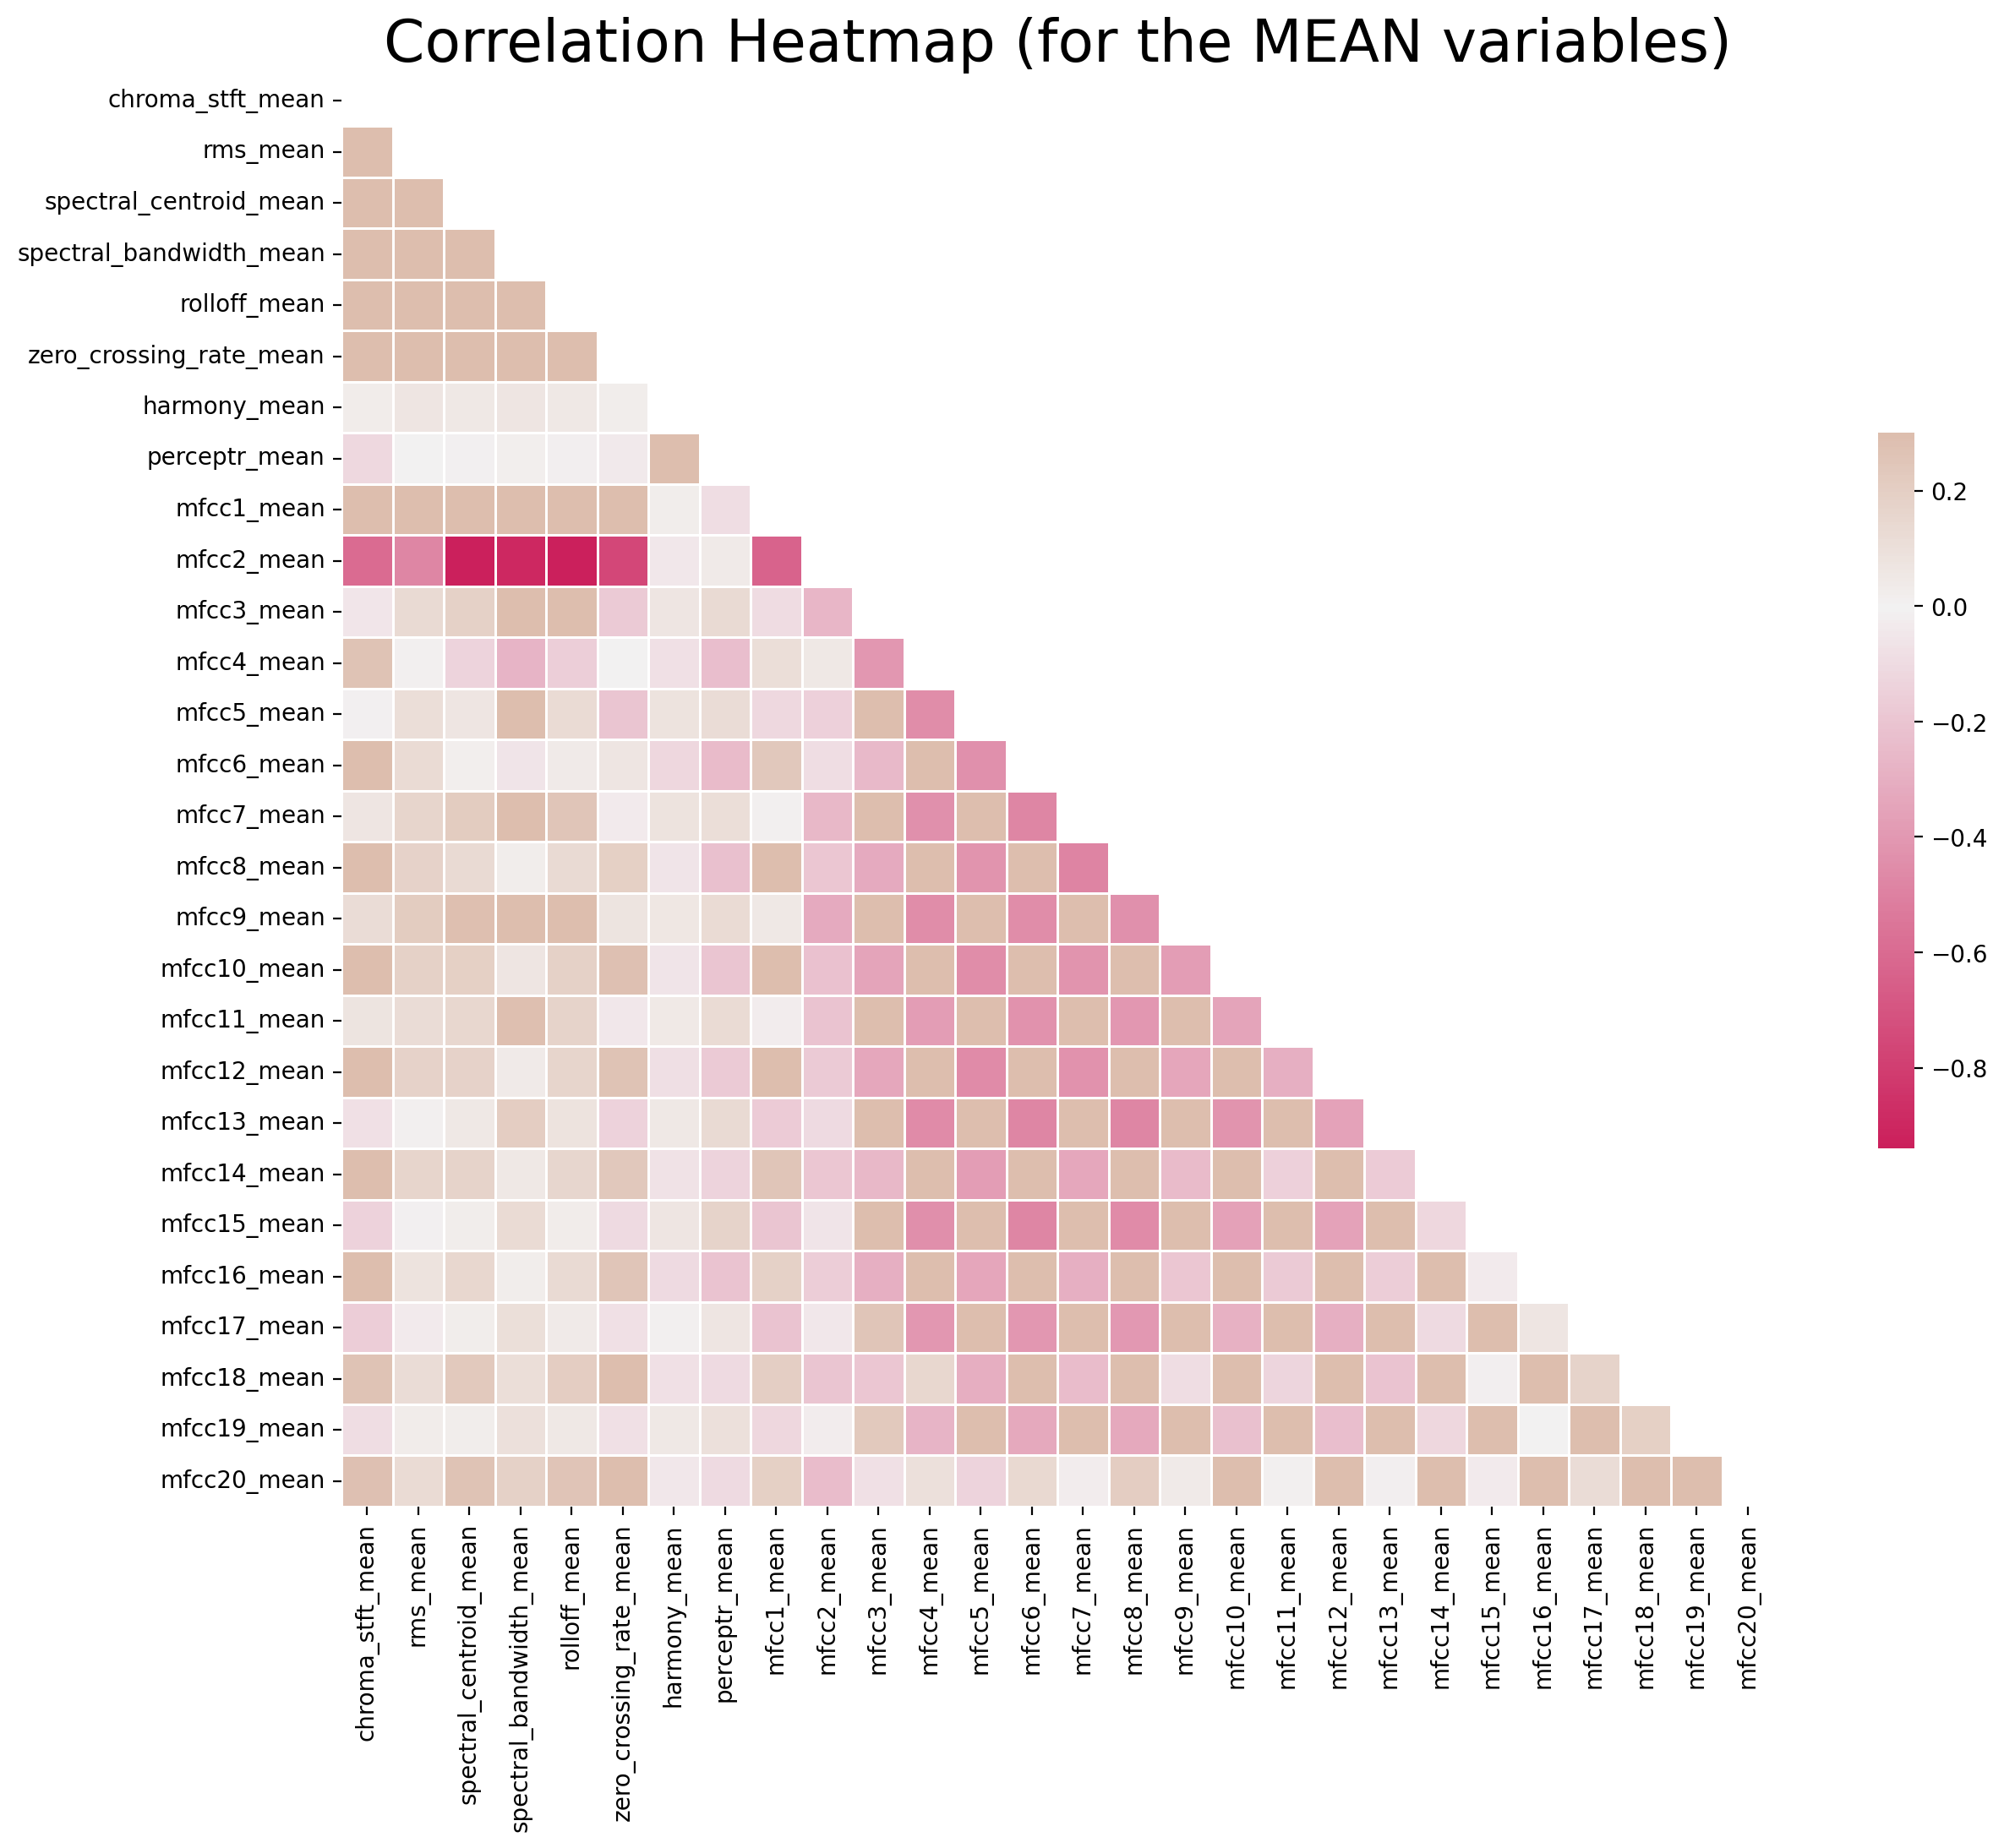

In [10]:
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

In [11]:
data.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

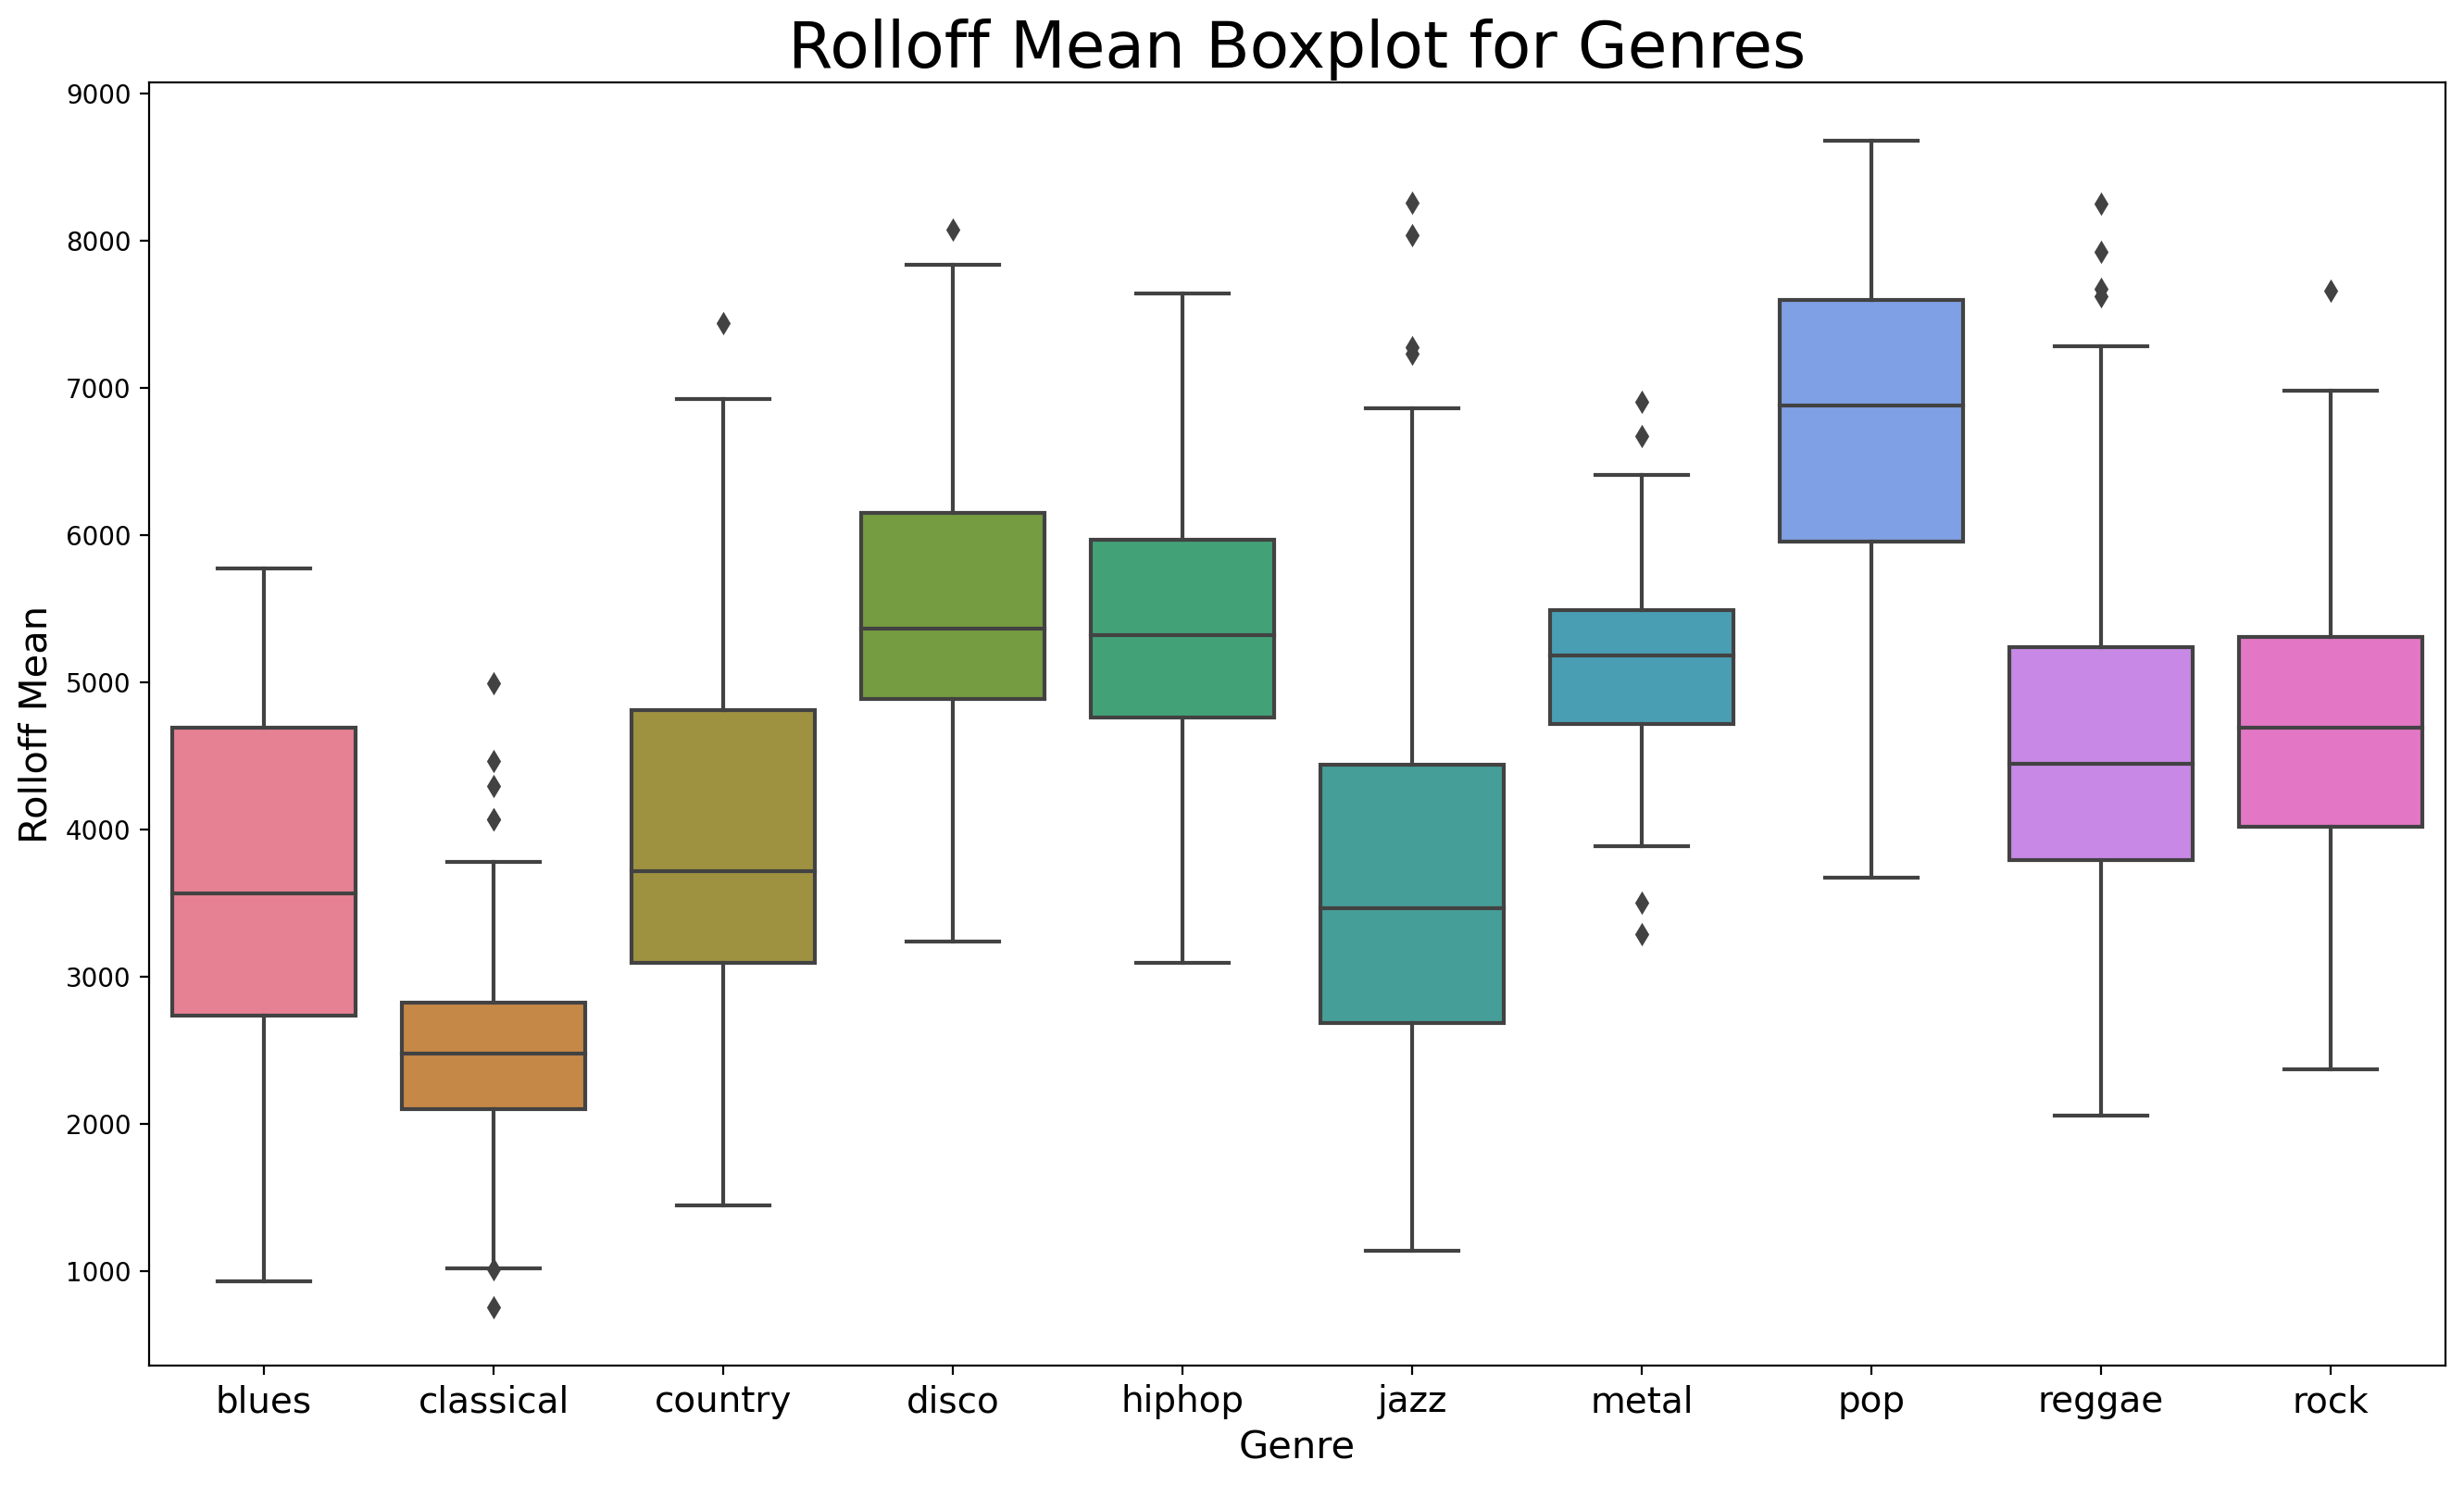

In [12]:
x = data[["label", "rolloff_mean"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "rolloff_mean", data = x, palette = 'husl');

plt.title('Rolloff Mean Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("Rolloff Mean", fontsize = 15)
plt.savefig("Rolloff Mean Boxplot.jpg")

data0 = data

[0.2439355  0.21781804 0.09693654 0.06438081 0.05287586 0.03795505
 0.02703532 0.02200541 0.02112932 0.01643904 0.01339884 0.01307634
 0.01181649 0.01073861 0.0097358  0.00919195 0.00858502 0.00802831
 0.00725453 0.00691318]
20
58


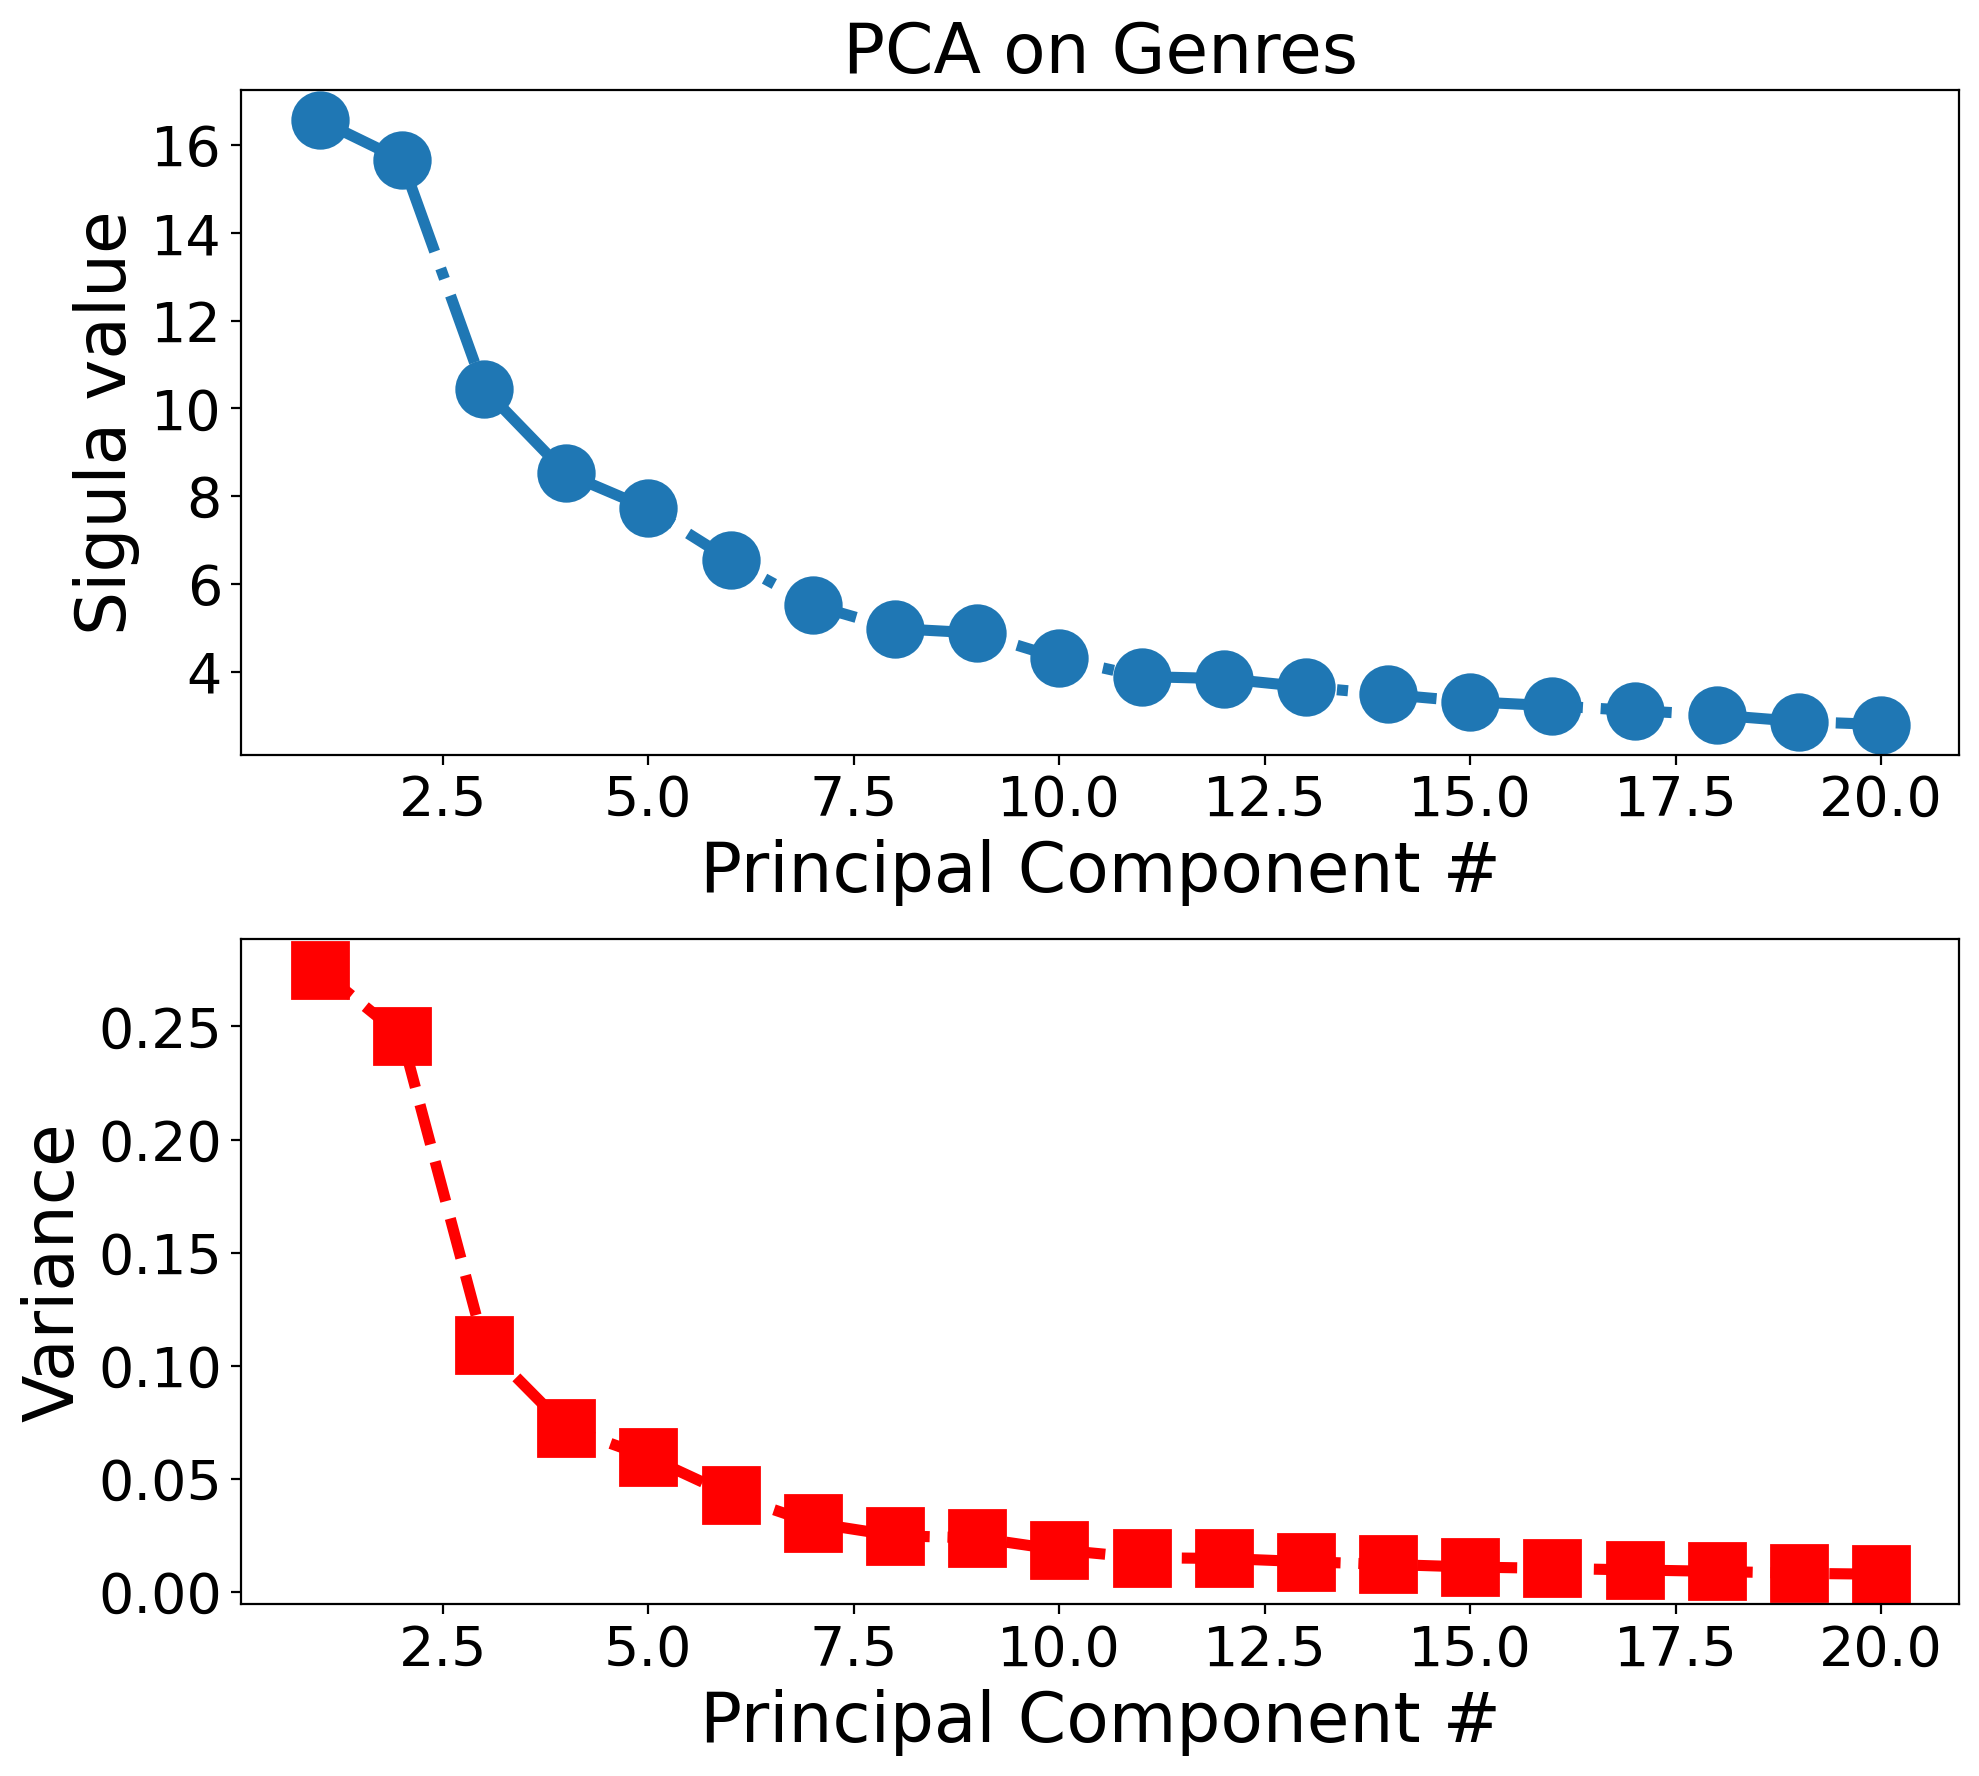

In [316]:
from sklearn import preprocessing

data = data0.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents[:,[0,1,2]], columns = ['principal component 1', 'principal component 2', 'principal component 3'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

print(pca.explained_variance_ratio_)
a = np.arange(1,21)
plt.figure(figsize = (10, 9))
plt.subplot(211)
plt.plot(a,pca.singular_values_,'o-.',markersize=20,linewidth=4)
plt.title('PCA on Genres', fontsize = 25)
#plt.xticks(a)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);
plt.xlabel("Principal Component #", fontsize = 25)
plt.ylabel("Sigula value", fontsize = 25)
plt.subplot(212)
plt.plot(a,pca.explained_variance_,'rs--',markersize=20,linewidth=4)
#plt.xticks(a)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);
plt.xlabel("Principal Component #", fontsize = 25)
plt.ylabel("Variance", fontsize = 25)
plt.tight_layout()
plt.savefig("PCA variance.png")
print(pca.n_components_)
print(pca.n_features_)


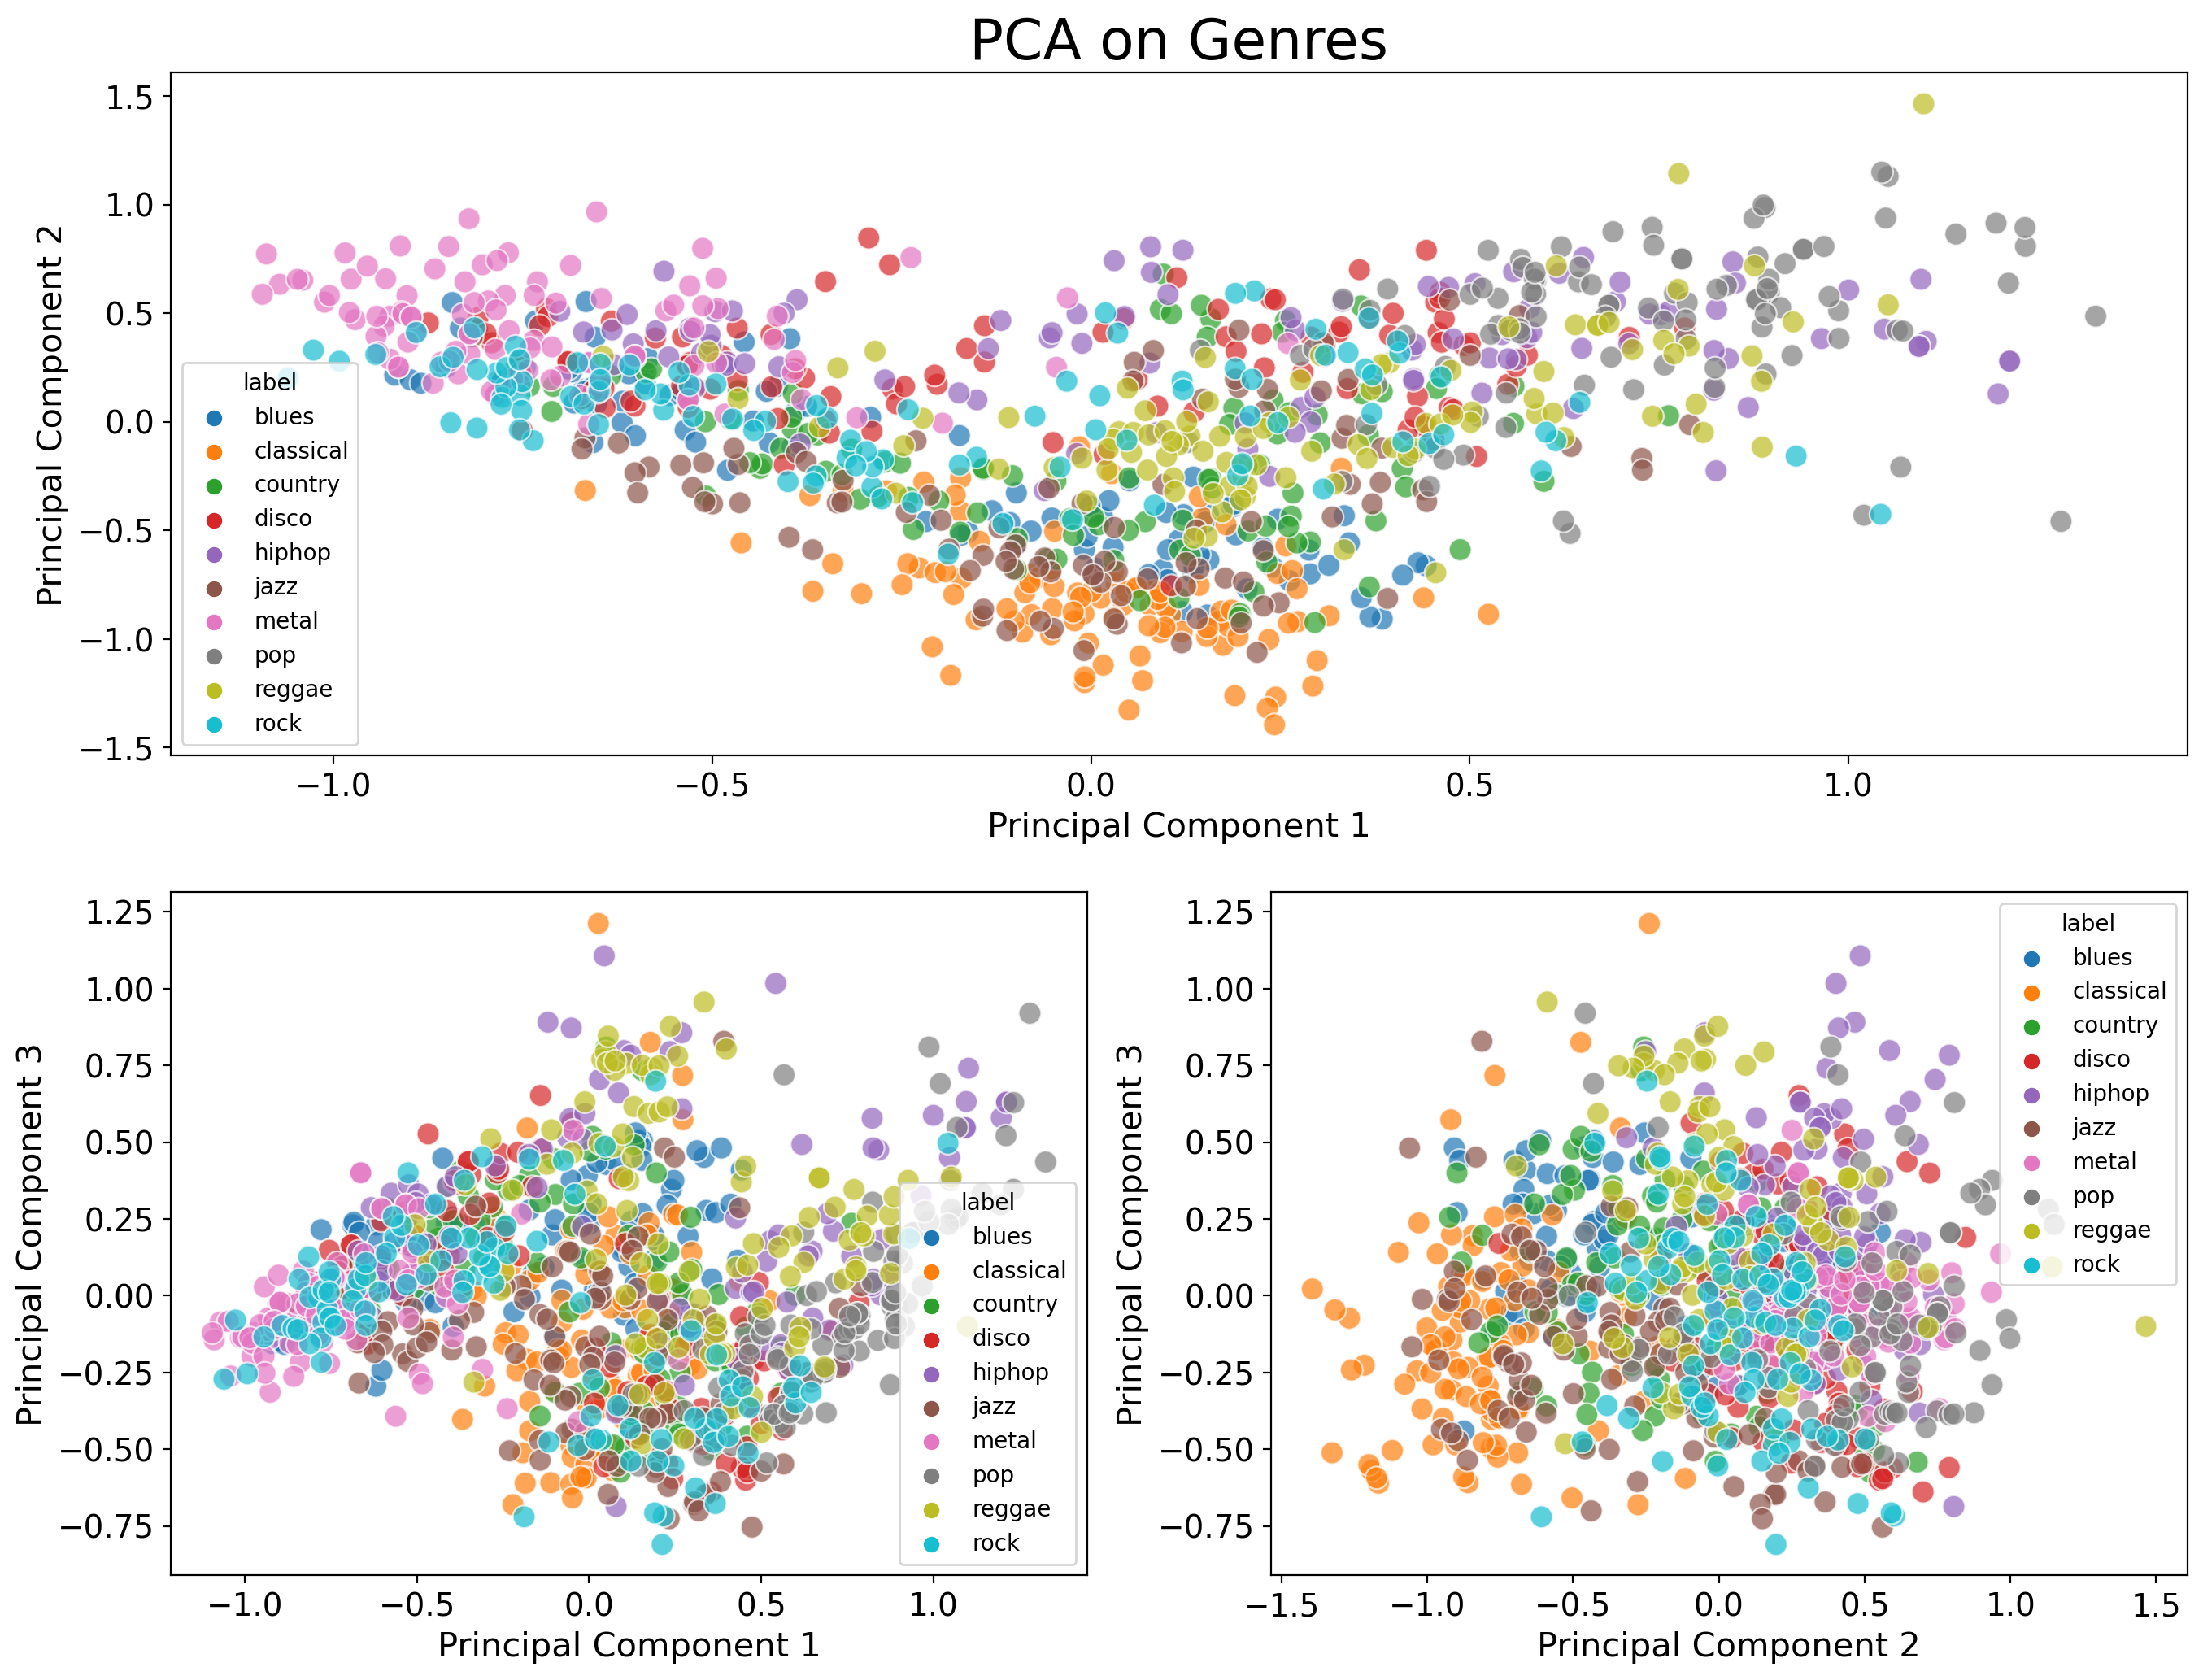

In [14]:
plt.figure(figsize = (16, 12))
ax0 = plt.subplot(211)
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)


for i in range(1):
    ax1 = plt.subplot(223)
    sns.scatterplot(x = "principal component 1", y = "principal component 3", data = finalDf,hue='label',alpha = 0.7,
               s = 100);
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14);
    plt.xlabel("Principal Component 1", fontsize = 15)
    plt.ylabel("Principal Component 3", fontsize = 15)
    ax2 = plt.subplot(224)
    sns.scatterplot(x = "principal component 2", y = "principal component 3", data = finalDf,hue='label',alpha = 0.7,
               s = 100);
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14);
    plt.xlabel("Principal Component 2", fontsize = 15)
    plt.ylabel("Principal Component 3", fontsize = 15)

plt.savefig("PCA Scattert.jpg")

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [272]:
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
data = data.iloc[0:, 1:] 
data.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0           117335.771563   3714.560359  ...   39.687145    -3.241280   
1            65671.875673   3869.682242  ...   64.748276    -6.055294   
2            75124.921716   3997.639160  ...   67.336563    -1.768610   
3            82913.639269   3568.300218  ...   47.739452    -3.841155   
4            60204.020268   3469.992864  ...   30.336359     0.664582   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.488243     0.722209   38.099152    -5.050335   33.618073    -0.243027   
1   40.677654     0.159015   51.264091    -2.837699   97.030830     5.784063   
2   28.348579     2.378768   45.717648    -1.938424   53.050835     2.517375   
3   28.337118     1.218588   34.770935    -3.580352   50.836224     3.630866   
4   45.880913     1.689446   51.363583    -3.392489   26.738789     0.536961   

   mfcc20_var  label  
0   43.771767  blues  
1   59.943081  blues  
2   33.105122  blues  
3   32.023678  blues  
4   29.146694  blues  

[5 rows x 59 columns]

In [54]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X)
#principalDf = pd.DataFrame(data = principalComponents[:,[0,1,2]], columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf = pd.DataFrame(data = principalComponents)

# concatenate with target label
pcaDf = pd.concat([principalDf, y], axis = 1)
pcaX = pcaDf.loc[:, pcaDf.columns != 'label']
pcay = pcaDf['label']
principalDf.shape

(9990, 20)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
pcaX_train, pcaX_test, pcay_train, pcay_test = train_test_split(pcaX, pcay, test_size=0.3, random_state=24)

In [19]:
X_train

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
17       0.0          0.343452         0.798180  0.248360  0.101350   
8522     0.0          0.606897         0.685272  0.140488  0.045798   
9866     0.0          0.549537         0.472391  0.349381  0.028056   
9789     0.0          0.323052         0.717055  0.301211  0.029632   
5509     0.0          0.258135         0.807402  0.162672  0.028584   
...      ...               ...              ...       ...       ...   
9372     0.0          0.478155         0.681353  0.558394  0.144979   
7291     0.0          0.379877         0.731875  0.510149  0.209778   
1344     0.0          0.305975         0.739992  0.115659  0.008793   
7293     0.0          0.405485         0.721220  0.394778  0.144834   
1289     0.0          0.234523         0.673586  0.157381  0.008345   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
17                  0.283257               0.106294                 0.569541   
8522                0.323428               0.512631                 0.605831   
9866                0.380872               0.013518                 0.546434   
9789                0.326946               0.023127                 0.488294   
5509                0.123128               0.016480                 0.303155   
...                      ...                    ...                      ...   
9372                0.435329               0.135042                 0.654703   
7291                0.513126               0.130557                 0.806690   
1344                0.233152               0.008897                 0.365747   
7293                0.473794               0.127070                 0.749378   
1289                0.272451               0.017620                 0.381248   

      spectral_bandwidth_var  rolloff_mean  ...  mfcc16_mean  mfcc16_var  \
17                  0.108514      0.436148  ...     0.444614    0.072613   
8522                0.587830      0.429038  ...     0.444678    0.040720   
9866                0.038539      0.498809  ...     0.446113    0.023588   
9789                0.029458      0.426393  ...     0.404236    0.079659   
5509                0.023511      0.171341  ...     0.396311    0.019749   
...                      ...           ...  ...          ...         ...   
9372                0.072753      0.561516  ...     0.409451    0.027655   
7291                0.111203      0.696753  ...     0.387636    0.059545   
1344                0.007074      0.294552  ...     0.402915    0.133493   
7293                0.118191      0.624074  ...     0.329074    0.080622   
1289                0.022442      0.308688  ...     0.535793    0.135120   

      mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
17       0.372402    0.074030     0.378618    0.067457     0.448437   
8522     0.454682    0.038705     0.408381    0.019065     0.462231   
9866     0.229479    0.022837     0.321419    0.019546     0.406095   
9789     0.216278    0.078424     0.393253    0.032034     0.446382   
5509     0.493467    0.064019     0.343212    0.044499     0.436009   
...           ...         ...          ...         ...          ...   
9372     0.408401    0.038832     0.391999    0.064223     0.426811   
7291     0.474546    0.102263     0.425220    0.101946     0.487450   
1344     0.462966    0.140010     0.294710    0.254282     0.349390   
7293     0.414264    0.056494     0.347330    0.031352     0.457596   
1289     0.450962    0.118980     0.386901    0.066459     0.502183   

      mfcc19_var  mfcc20_mean  mfcc20_var  
17      0.052807     0.503380    0.051517  
8522    0.009842     0.528776    0.029729  
9866    0.007342     0.526229    0.014258  
9789    0.024013     0.580692    0.049804  
5509    0.017442     0.414032    0.044237  
...          ...          ...         ...  
9372    0.037562     0.543963    0.050050  
7291    0.067795     0.482264    0.066389  
1344    0.171550     0.405895 

# K-NN

In [57]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    #plot_cm(model,y_test,preds)
    #print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')
    return accuracy_score(y_test, preds)

def model_assess_PCA(model, title = "Default"):
    model.fit(pcaX_train, pcay_train)
    preds = model.predict(pcaX_test)
    #y_preds = pca.inverse_transform(preds)
    #print(confusion_matrix(pcay_test, preds))
    #print('Accuracy', title, ':', round(accuracy_score(pcay_test, preds), 5), '\n')
    return accuracy_score(pcay_test, preds)

In [108]:
def plot_cm(model,y_true,y_pred):
    conf=confusion_matrix(y_true,y_pred)
    cm=pd.DataFrame(
        conf,index=[i for i in genres],
        columns=[i for i in genres]
    )
    plt.figure(figsize=(12,7))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

    # Draw the heatmap with the mask and correct aspect ratio
    ax = sns.heatmap(cm, cmap=cmap, vmax=300, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,fmt='d')
    #ax=sns.heatmap(cm,annot=True,fmt='d')
    ax.set_title(f'Confusion Matrix for {model} ')
    plt.savefig("k-NN_1.png")
    plt.show()

In [22]:
genres=data['label'].unique()
print(genres)

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [23]:
knn = KNeighborsClassifier(n_neighbors=10)
model_assess(knn, "KNN")

0.8695362028695363

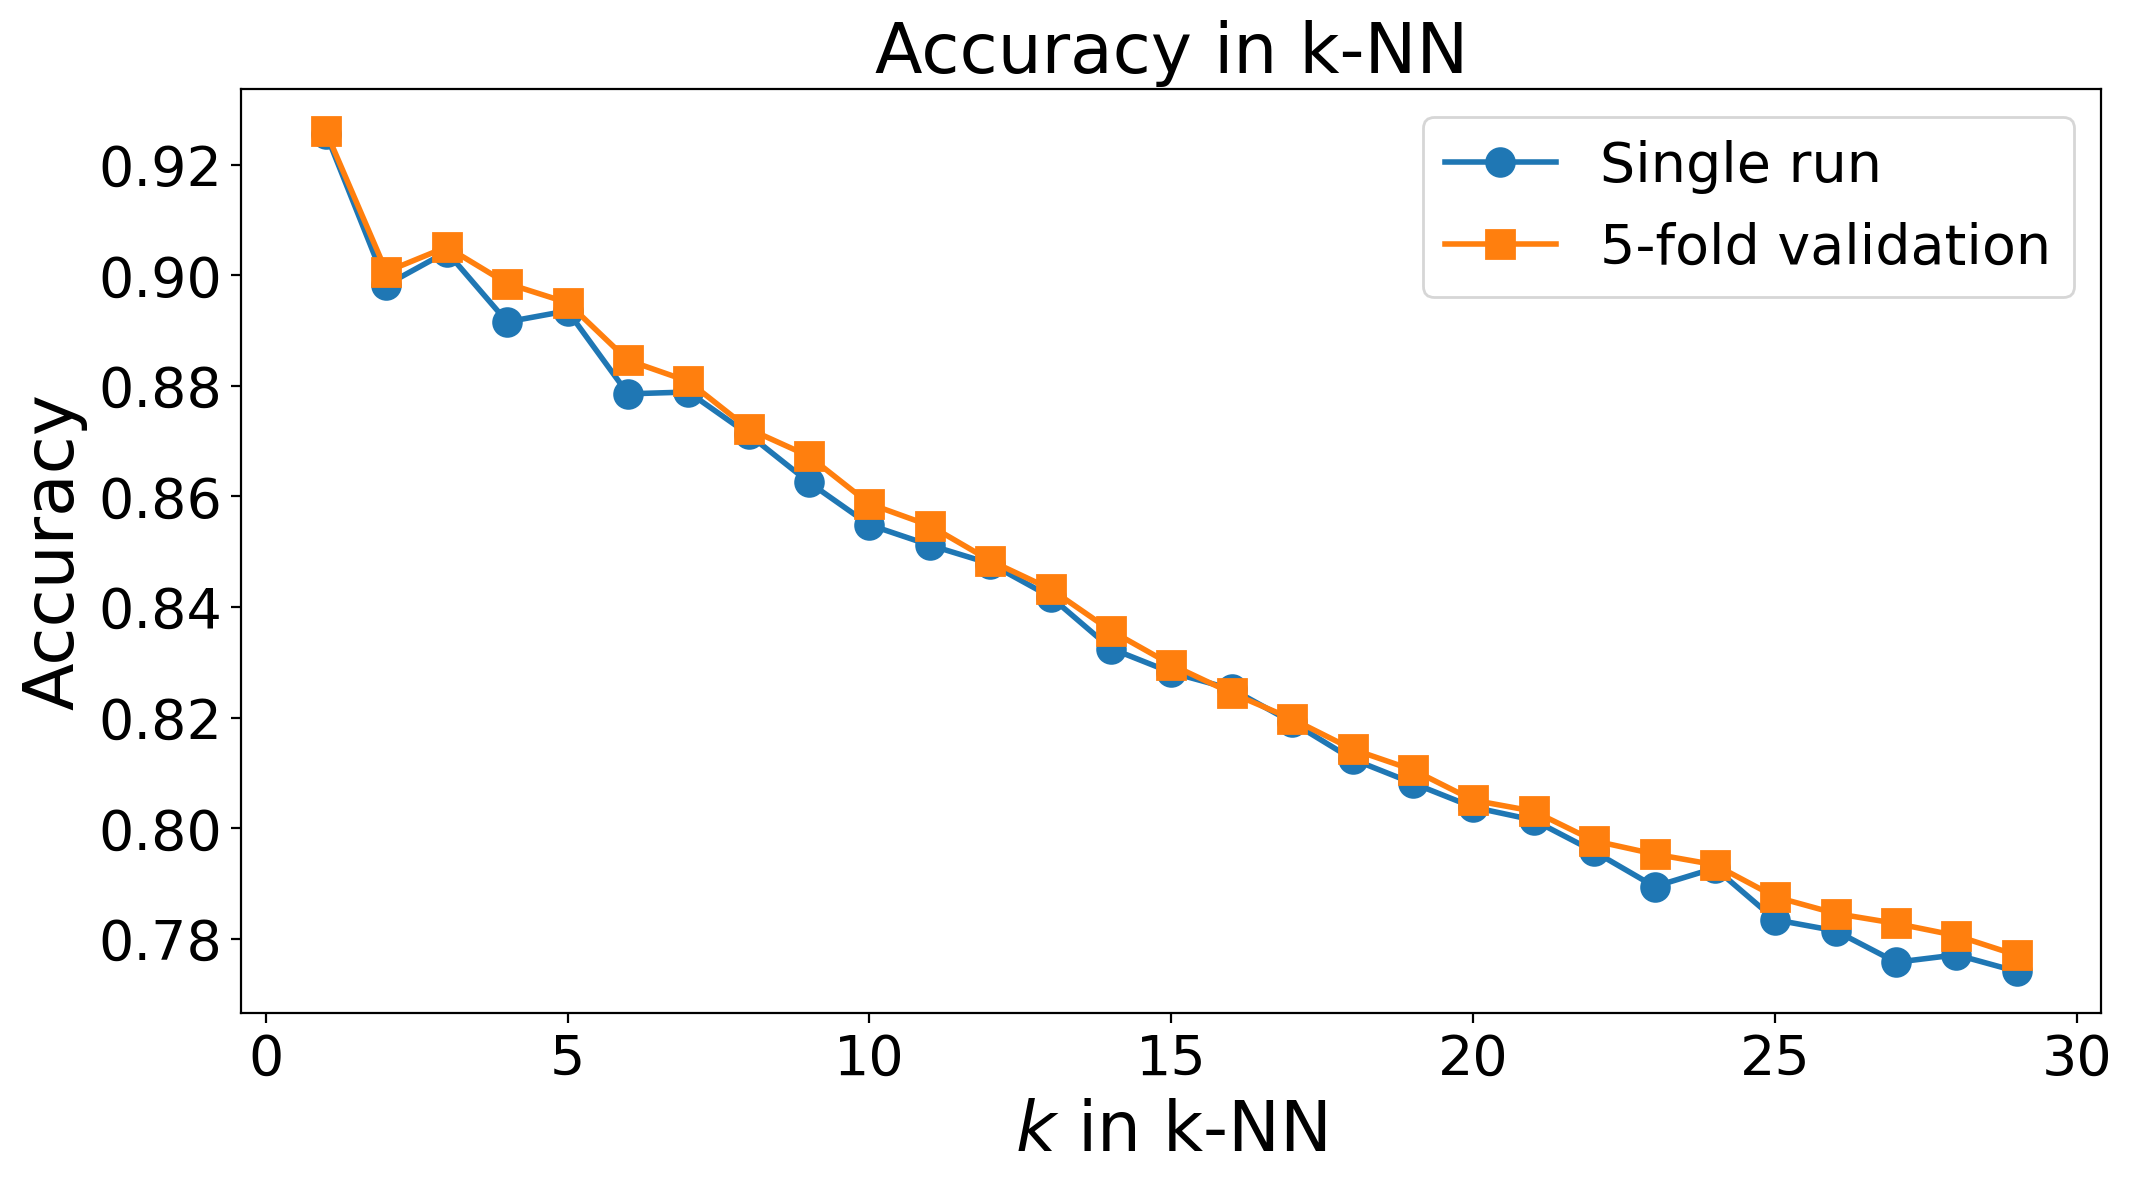

In [33]:
# KNN
ks = range(1,30,1)
acc = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    a = model_assess(knn, "KNN")
    acc.append(a)
    
plt.figure(figsize = (12, 6))
plt.plot(ks,acc,'o-',markersize=10,linewidth=2,label='Single run')
plt.plot(ks,accplot,'s-',markersize=10,linewidth=2,label='5-fold validation')
plt.title('Accuracy in k-NN', fontsize = 25)
#plt.xticks(ks)
plt.xticks(fontsize = 20)
plt.legend(fontsize=20)
plt.yticks(fontsize = 20);
plt.xlabel(r"$k$ in k-NN", fontsize = 25)
plt.ylabel("Accuracy", fontsize = 25)
plt.savefig("Accuracy_kNN.png")

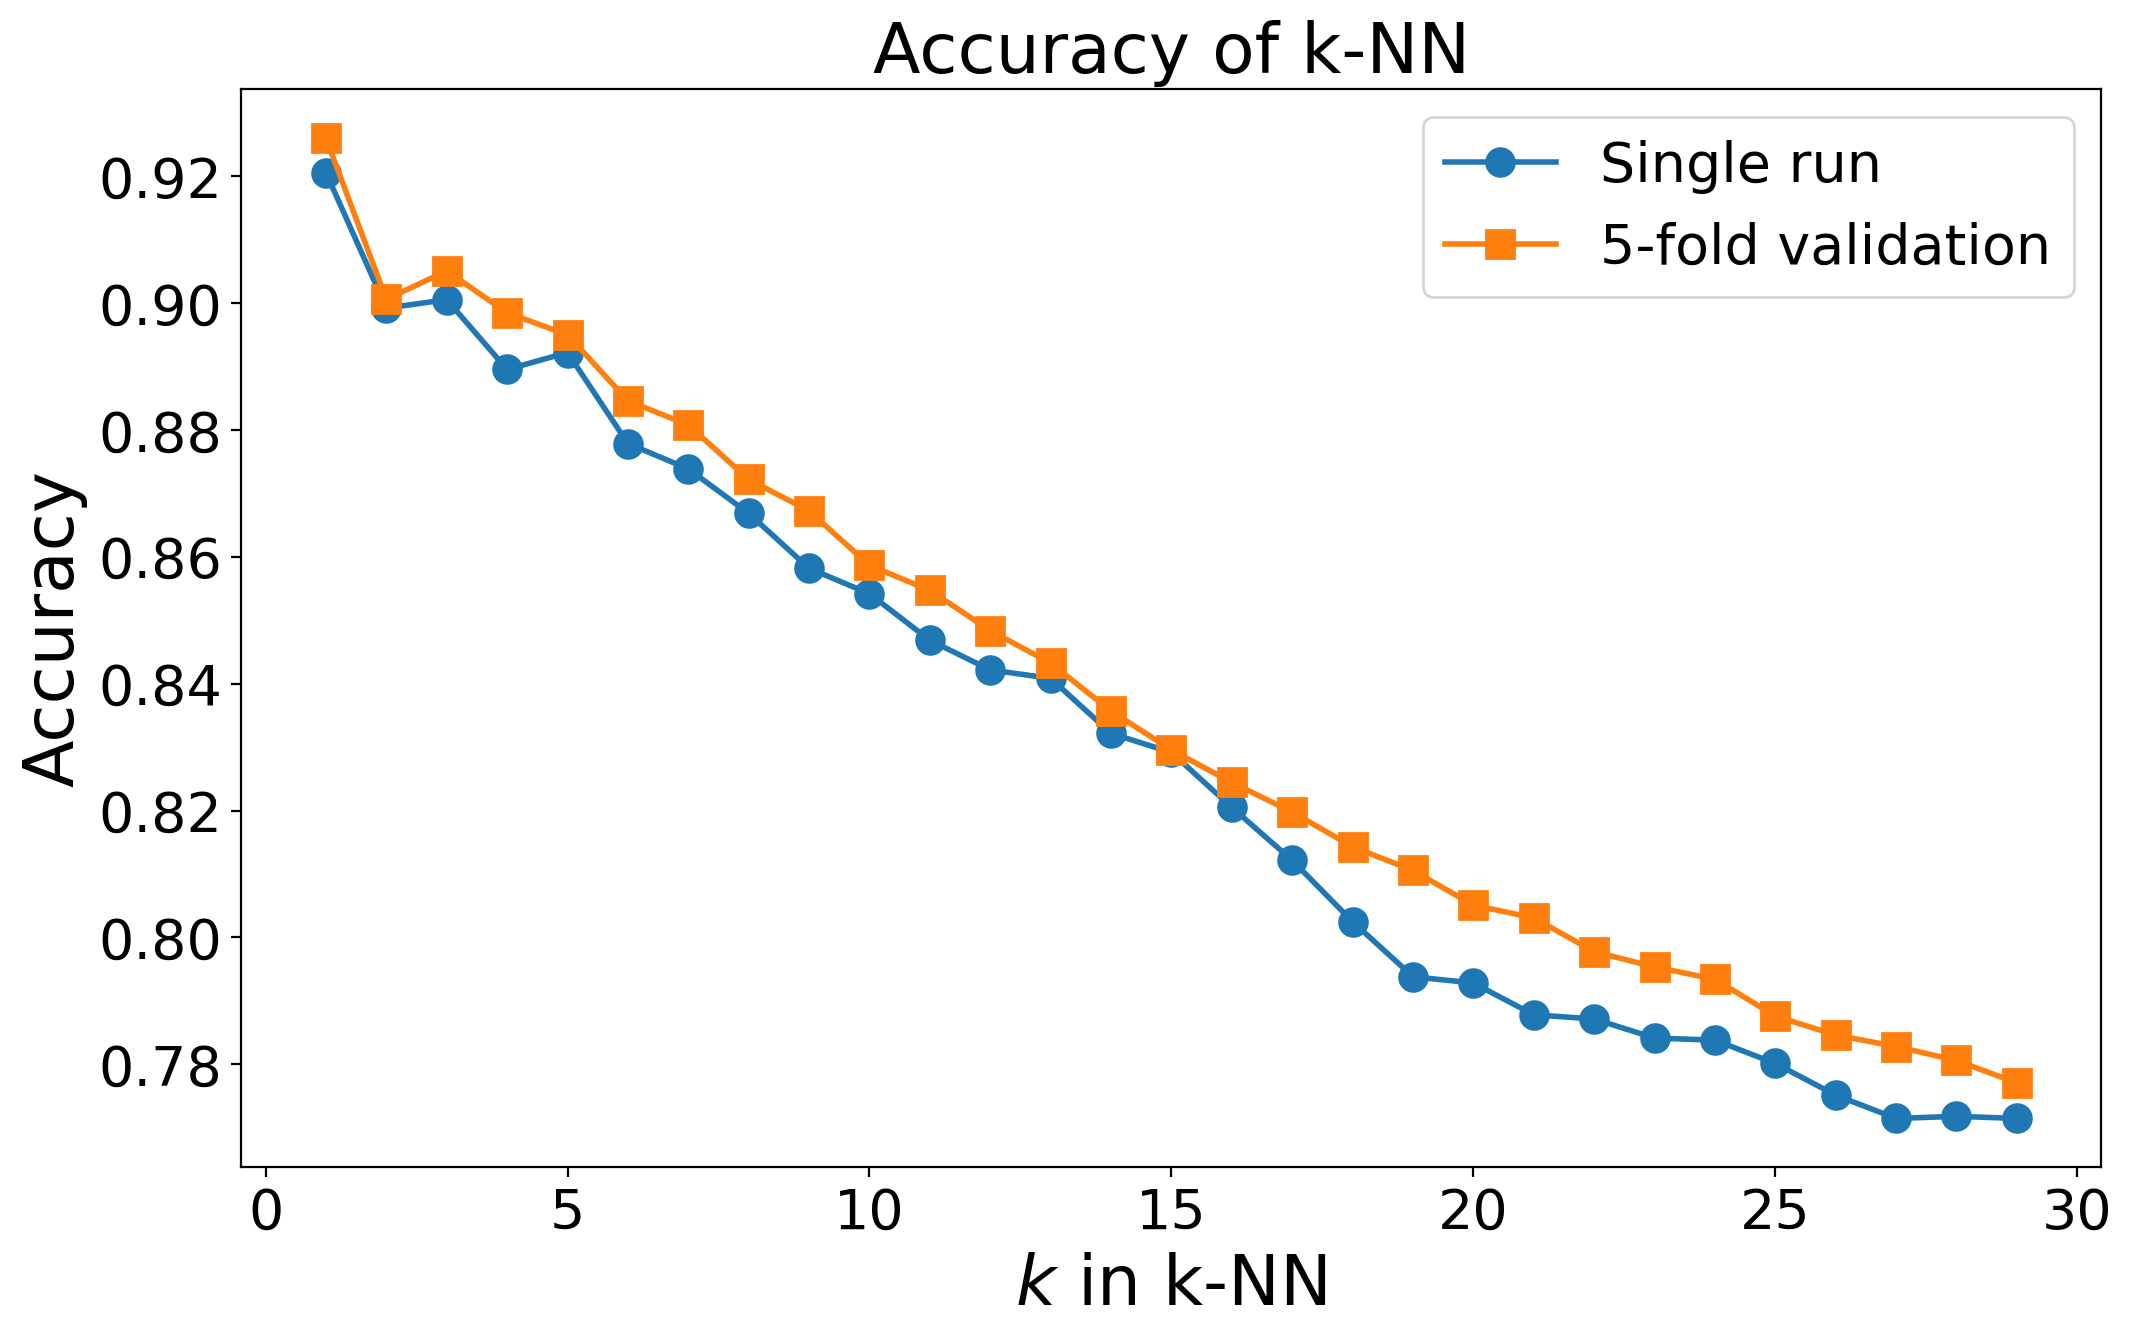

In [275]:
plt.figure(figsize = (12, 7))
plt.plot(ks,acc,'o-',markersize=10,linewidth=2,label='Single run')
plt.plot(ks,accplot,'s-',markersize=10,linewidth=2,label='5-fold validation')
plt.title('Accuracy of k-NN', fontsize = 25)
#plt.xticks(ks)
plt.xticks(fontsize = 20)
plt.legend(fontsize=20)
plt.yticks(fontsize = 20);
plt.xlabel(r"$k$ in k-NN", fontsize = 25)
plt.ylabel("Accuracy", fontsize = 25)
plt.savefig("Accuracy_kNN.png")

Text(0, 0.5, 'Accuracy')

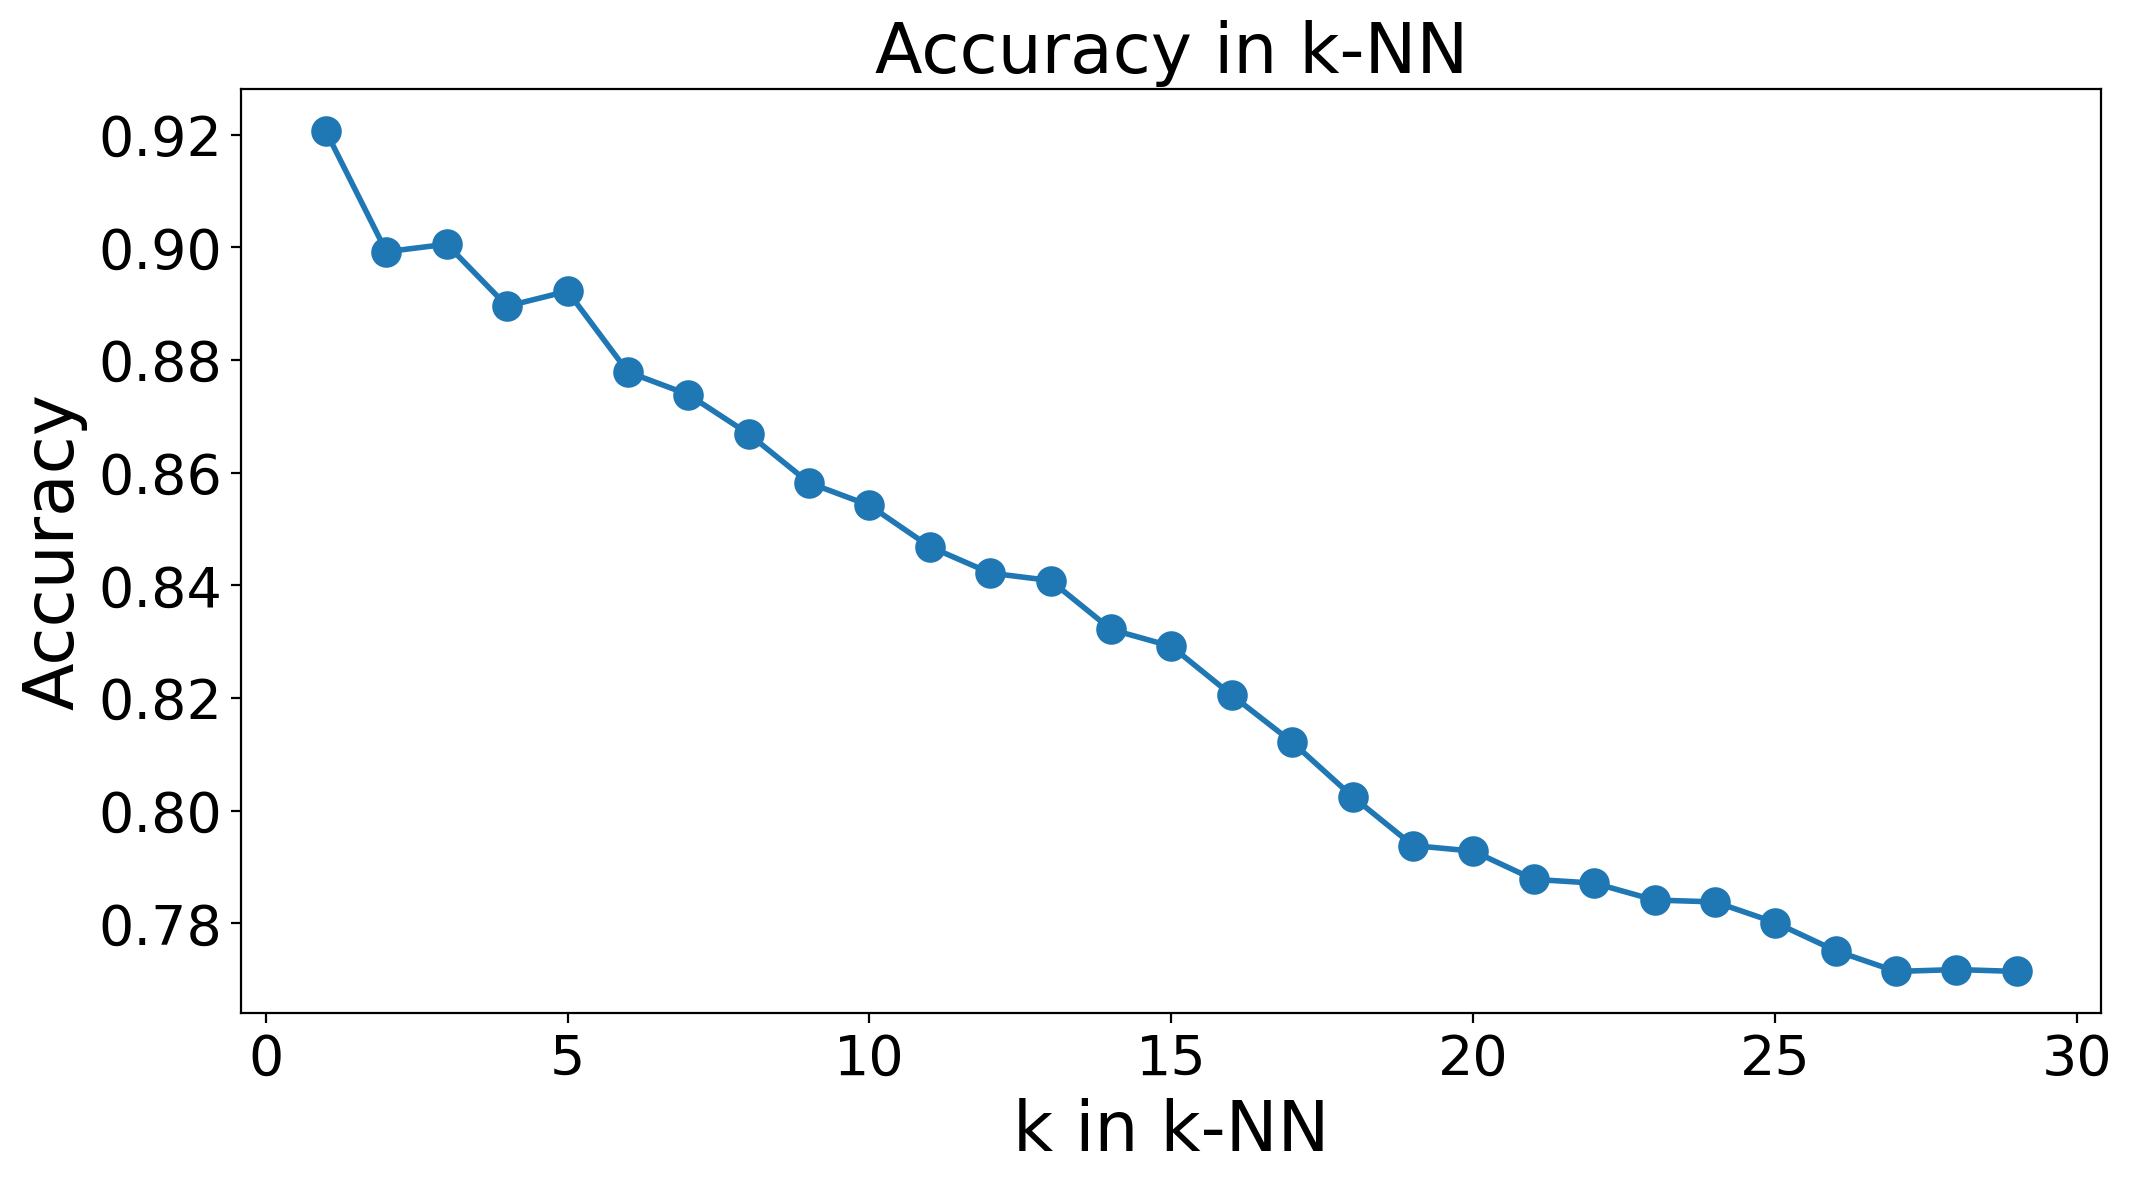

In [58]:
# KNN
ks = range(1,30,1)
acc = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    a = model_assess_PCA(knn, "KNN")
    acc.append(a)
    
plt.figure(figsize = (12, 6))
plt.plot(ks,acc,'o-',markersize=10,linewidth=2)
plt.title('Accuracy in k-NN', fontsize = 25)
#plt.xticks(ks)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);
plt.xlabel("k in k-NN", fontsize = 25)
plt.ylabel("Accuracy", fontsize = 25)

Text(0, 0.5, 'Maximum Accuracy')

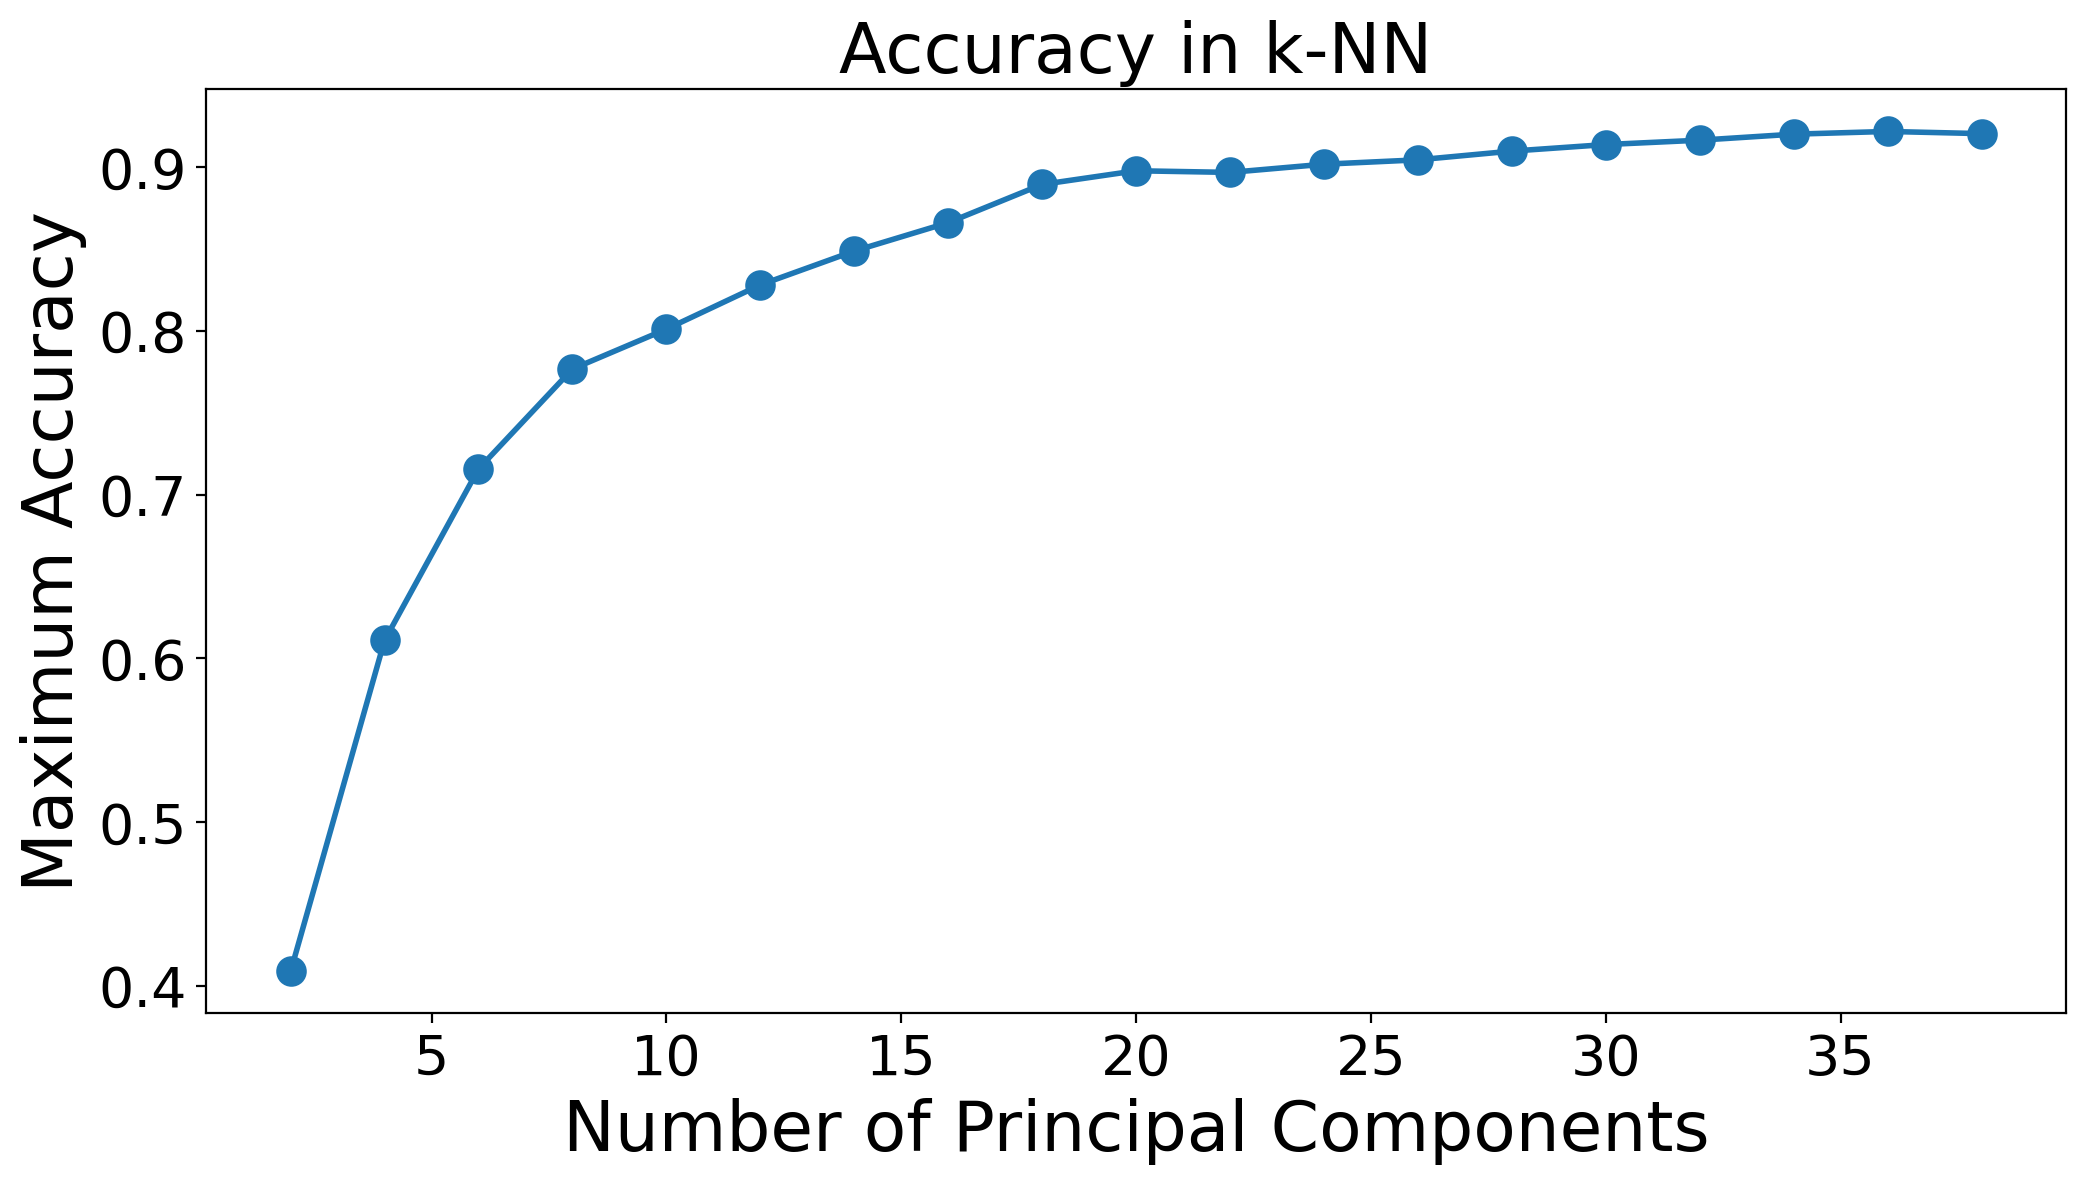

In [26]:
npca = range(2,40,2)
accmax = []
kmax = []
for i in npca:
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents)
    pcaDf = pd.concat([principalDf, y], axis = 1)
    pcaX = pcaDf.loc[:, pcaDf.columns != 'label']
    pcay = pcaDf['label']
    pcaX_train, pcaX_test, pcay_train, pcay_test = train_test_split(pcaX, pcay, test_size=0.3, random_state=24)
    ks = range(1,30,1)
    acc = []
    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k)
        a = model_assess_PCA(knn, "KNN")
        acc.append(a)
    accmax.append(max(acc))
    kmax.append(ks[acc.index(max(acc))])
    
plt.figure(figsize = (12, 6))
plt.plot(npca,accmax,'o-',markersize=10,linewidth=2)
plt.title('Accuracy in k-NN', fontsize = 25)
#plt.xticks(ks)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);
plt.xlabel("Number of Principal Components", fontsize = 25)
plt.ylabel("Maximum Accuracy", fontsize = 25)



In [27]:
nfold = 5
accall = []
for i in range(nfold):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i*24+10)
    ks = range(1,30,1)
    acc = []
    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k)
        a = model_assess(knn, "KNN")
        acc.append(a)
    accall.append(acc)
    




0.016016016016015988

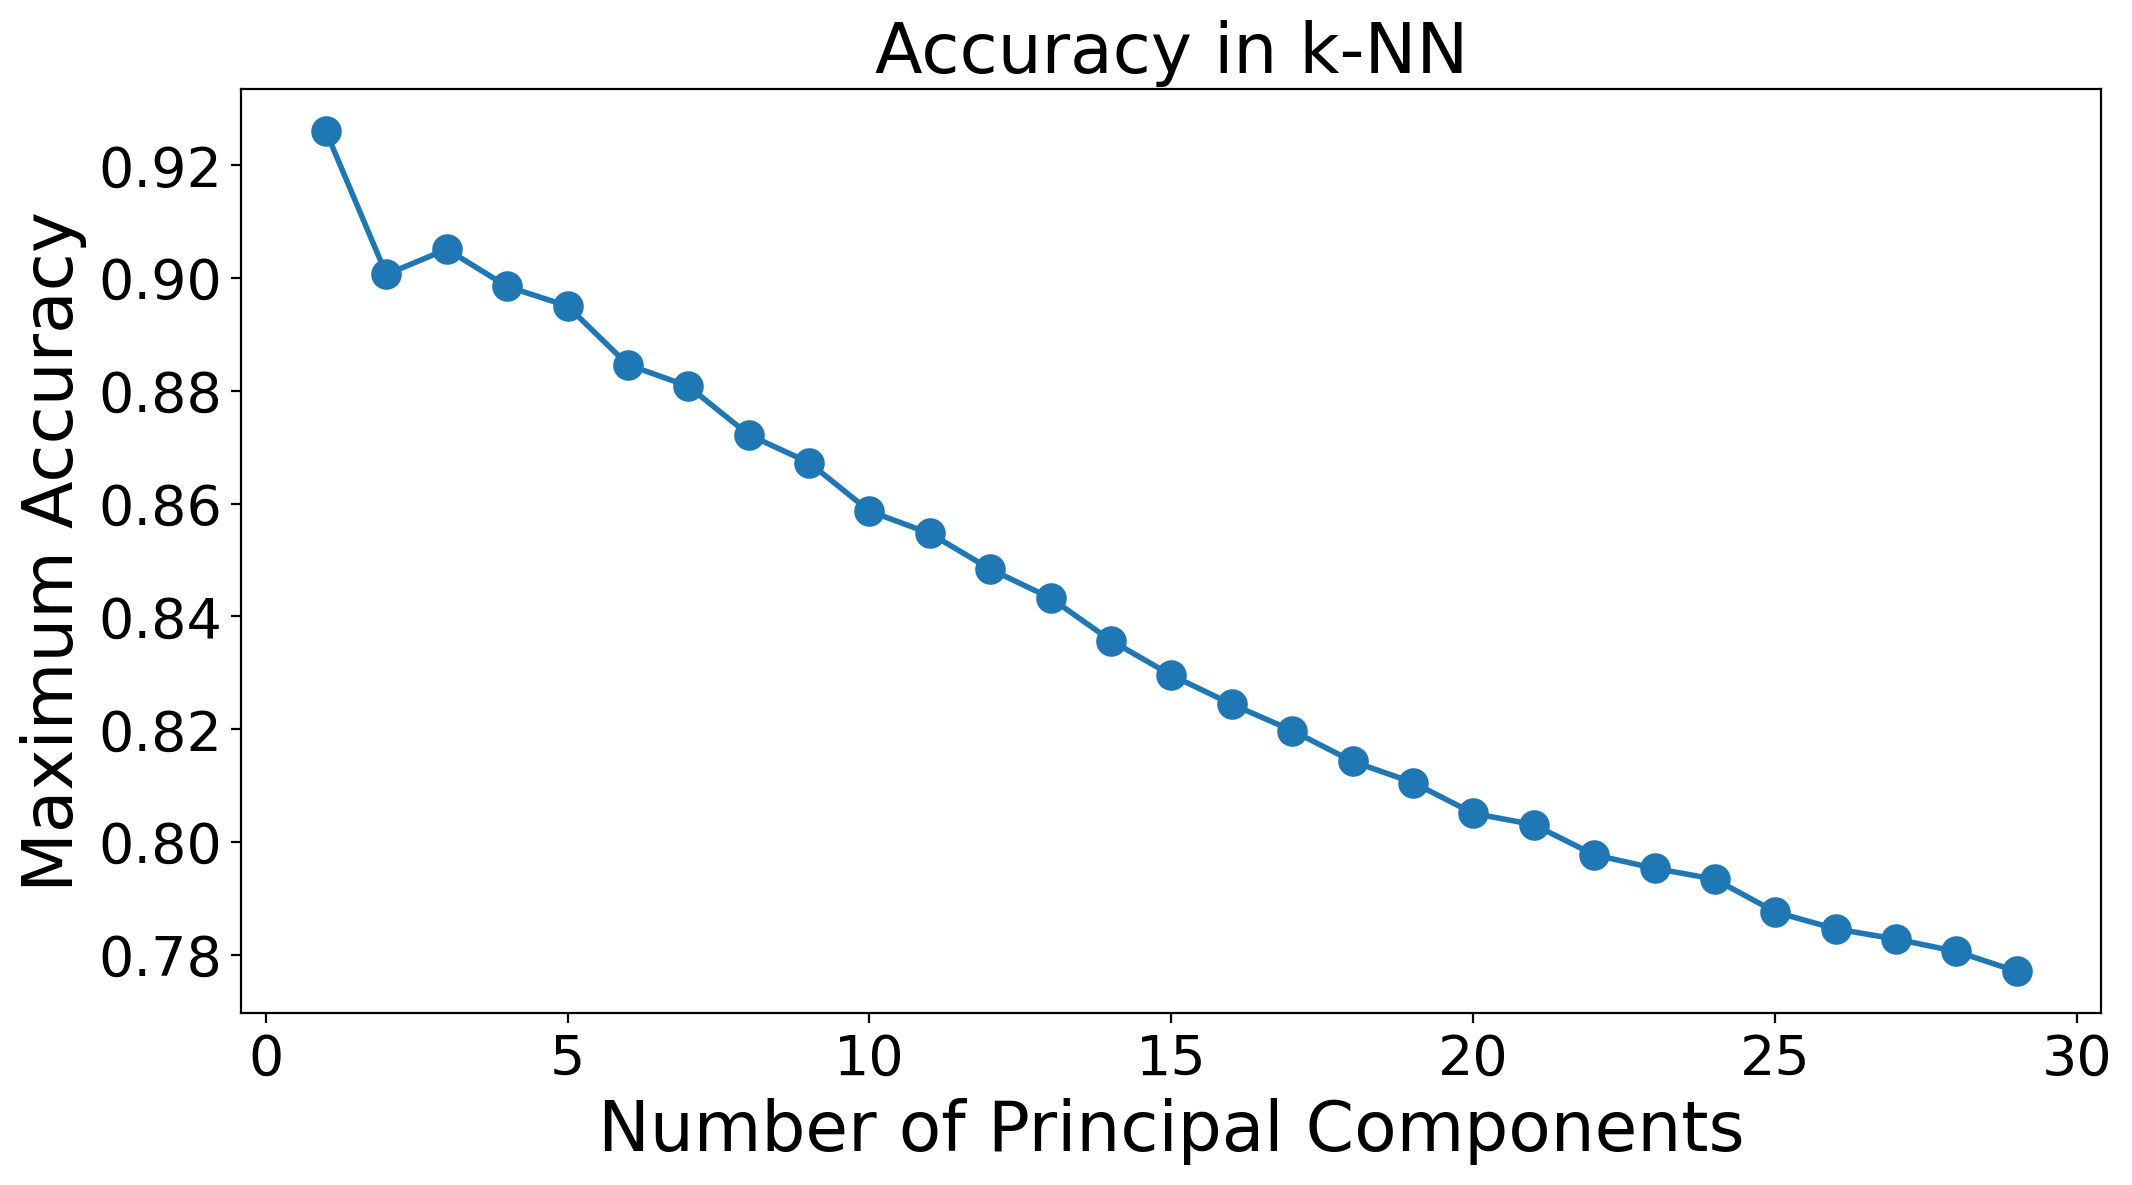

In [28]:
accplot =(np.array(accall[0])+np.array(accall[1])+np.array(accall[2])+np.array(accall[3])+np.array(accall[4]))/5
plt.figure(figsize = (12, 6))
plt.plot(ks,accplot,'o-',markersize=10,linewidth=2)
plt.title('Accuracy in k-NN', fontsize = 25)
#plt.xticks(ks)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);
plt.xlabel("Number of Principal Components", fontsize = 25)
plt.ylabel("Maximum Accuracy", fontsize = 25)
accall[0][0]-accall[1][0]

In [29]:
accplot =(np.array(accall[0])+np.array(accall[1])+np.array(accall[2])+np.array(accall[3])+np.array(accall[4]))/5

In [30]:
accplot

array([0.92599266, 0.90063397, 0.90510511, 0.8984985 , 0.89502836,
       0.88461795, 0.88081415, 0.87220554, 0.86726727, 0.85865866,
       0.85472139, 0.84838172, 0.84324324, 0.83570237, 0.8295629 ,
       0.82442442, 0.81975309, 0.81428095, 0.81054388, 0.80507174,
       0.80306974, 0.79773106, 0.79532866, 0.79339339, 0.78758759,
       0.78458458, 0.78278278, 0.78058058, 0.77704371])

In [31]:
kmax

[28, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

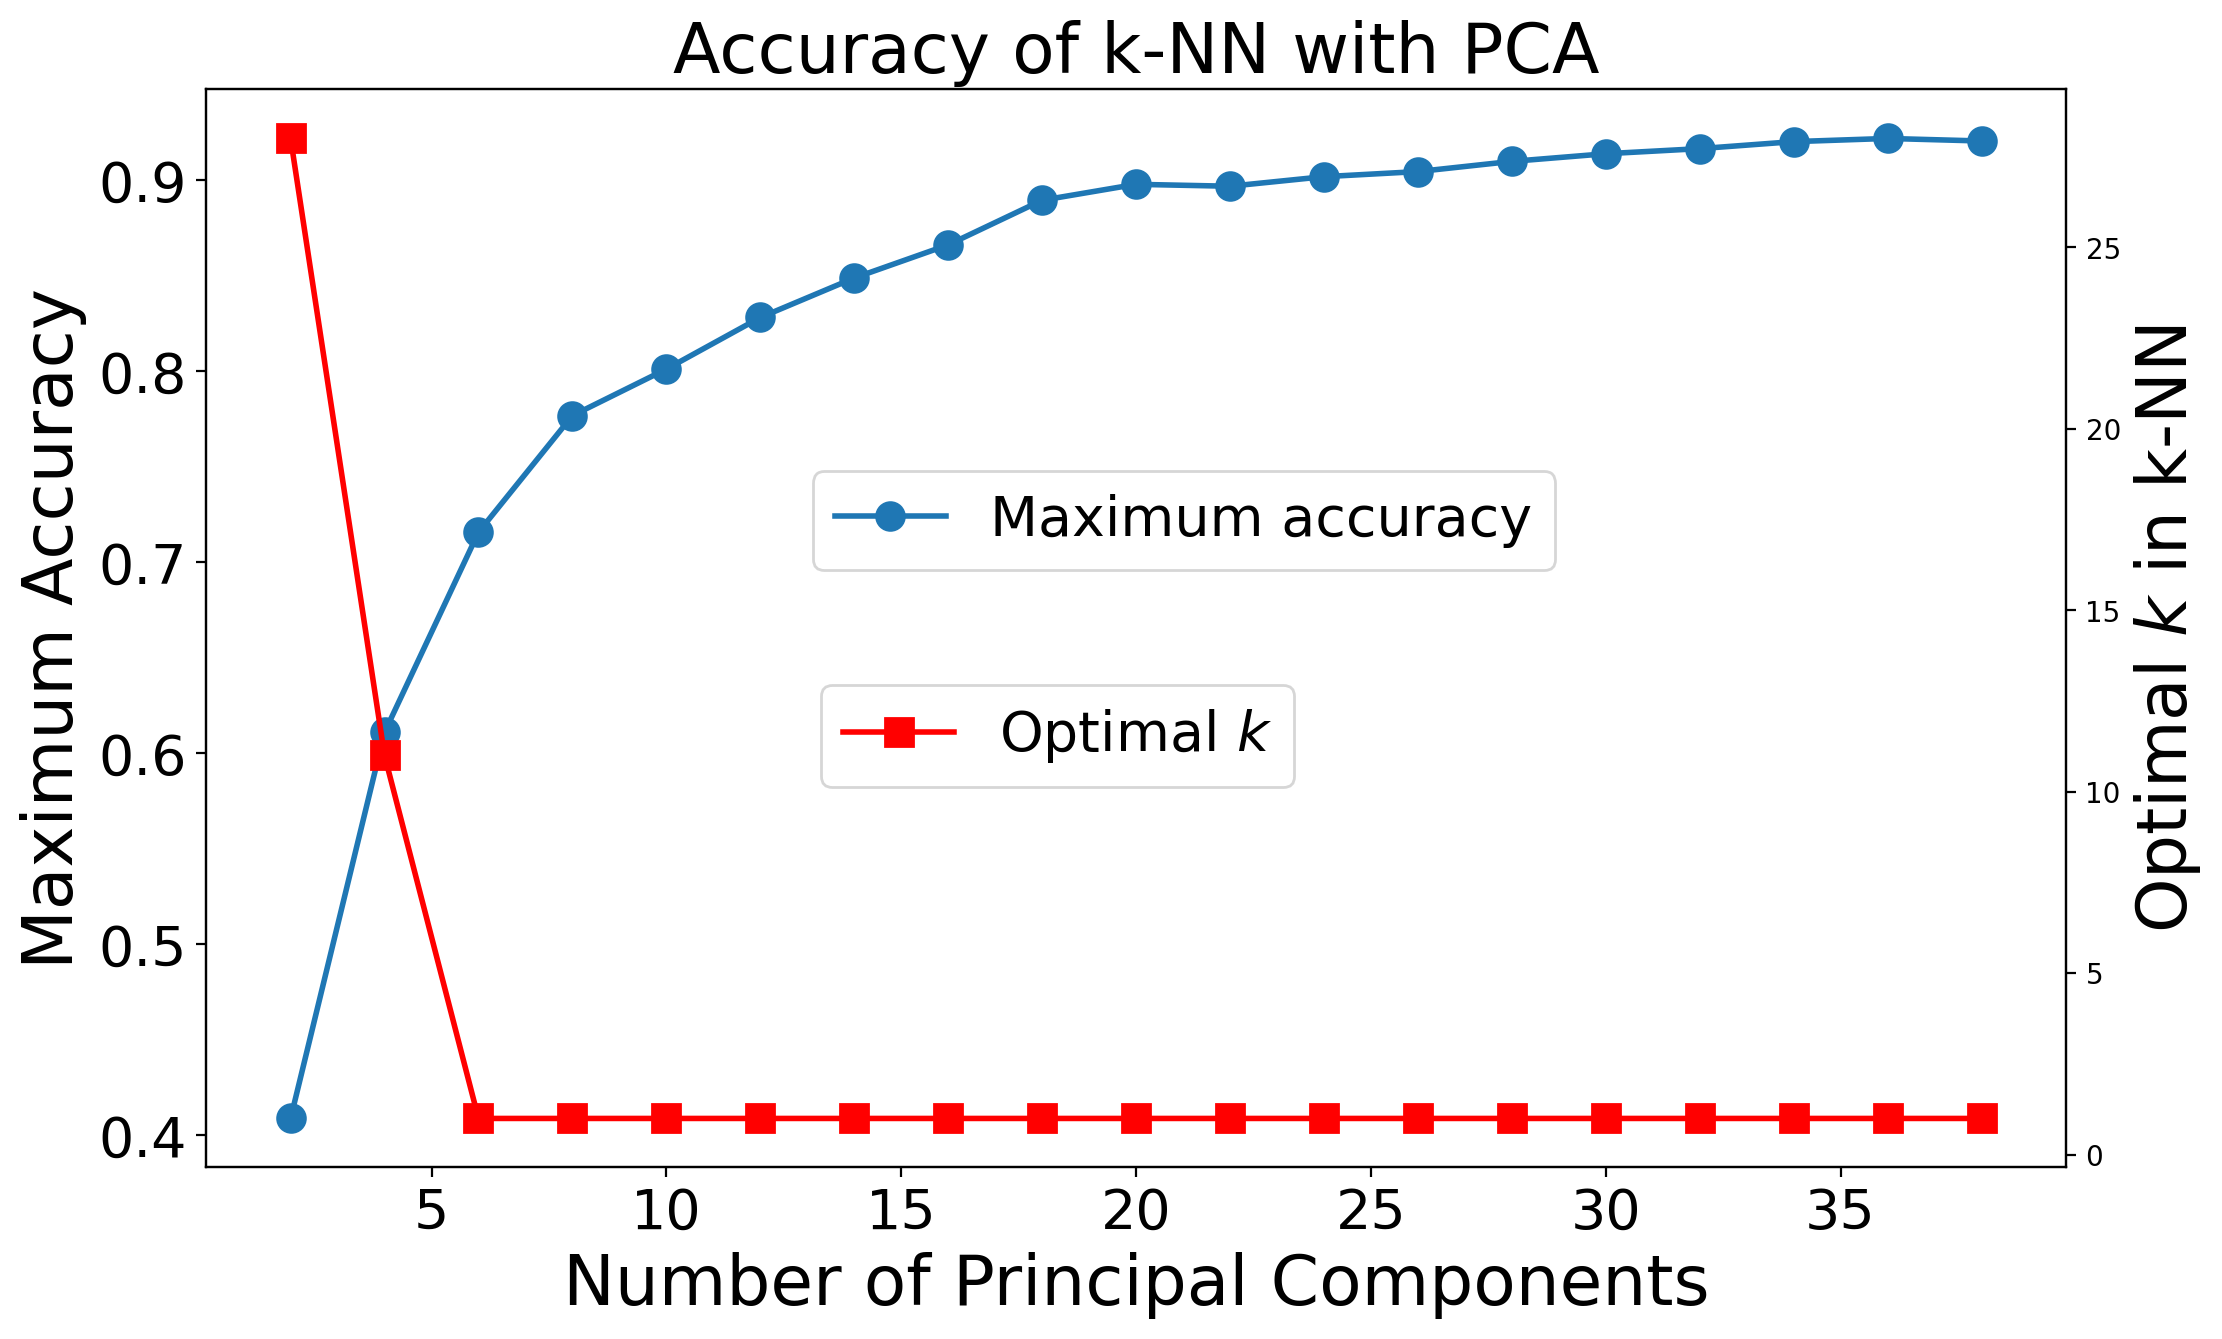

In [290]:
fig,ax = plt.subplots(figsize = (12, 7))
plt.plot(npca,accmax,'o-',markersize=10,linewidth=2,label='Maximum accuracy')
plt.title('Accuracy of k-NN with PCA', fontsize = 25)
#plt.xticks(ks)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);
plt.xlabel("Number of Principal Components", fontsize = 25)
plt.ylabel("Maximum Accuracy", fontsize = 25)
ax.legend(bbox_to_anchor=(0.74, 0.6),loc='center right',fontsize = 20)
ax2=ax.twinx()
plt.plot(npca,kmax,'rs-',markersize=10,linewidth=2,label=r'Optimal $k$')
plt.ylabel(r"Optimal $k$ in k-NN", fontsize = 25)
ax2.legend(bbox_to_anchor=(0.6, 0.4),loc='center right',fontsize = 20)
plt.savefig("Accuracy_nPCA.png")

In [261]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
model_assess(knn, "KNN")

0.9265932599265932

In [309]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    knn, X_test, y_test, n_repeats=50, random_state=42
)

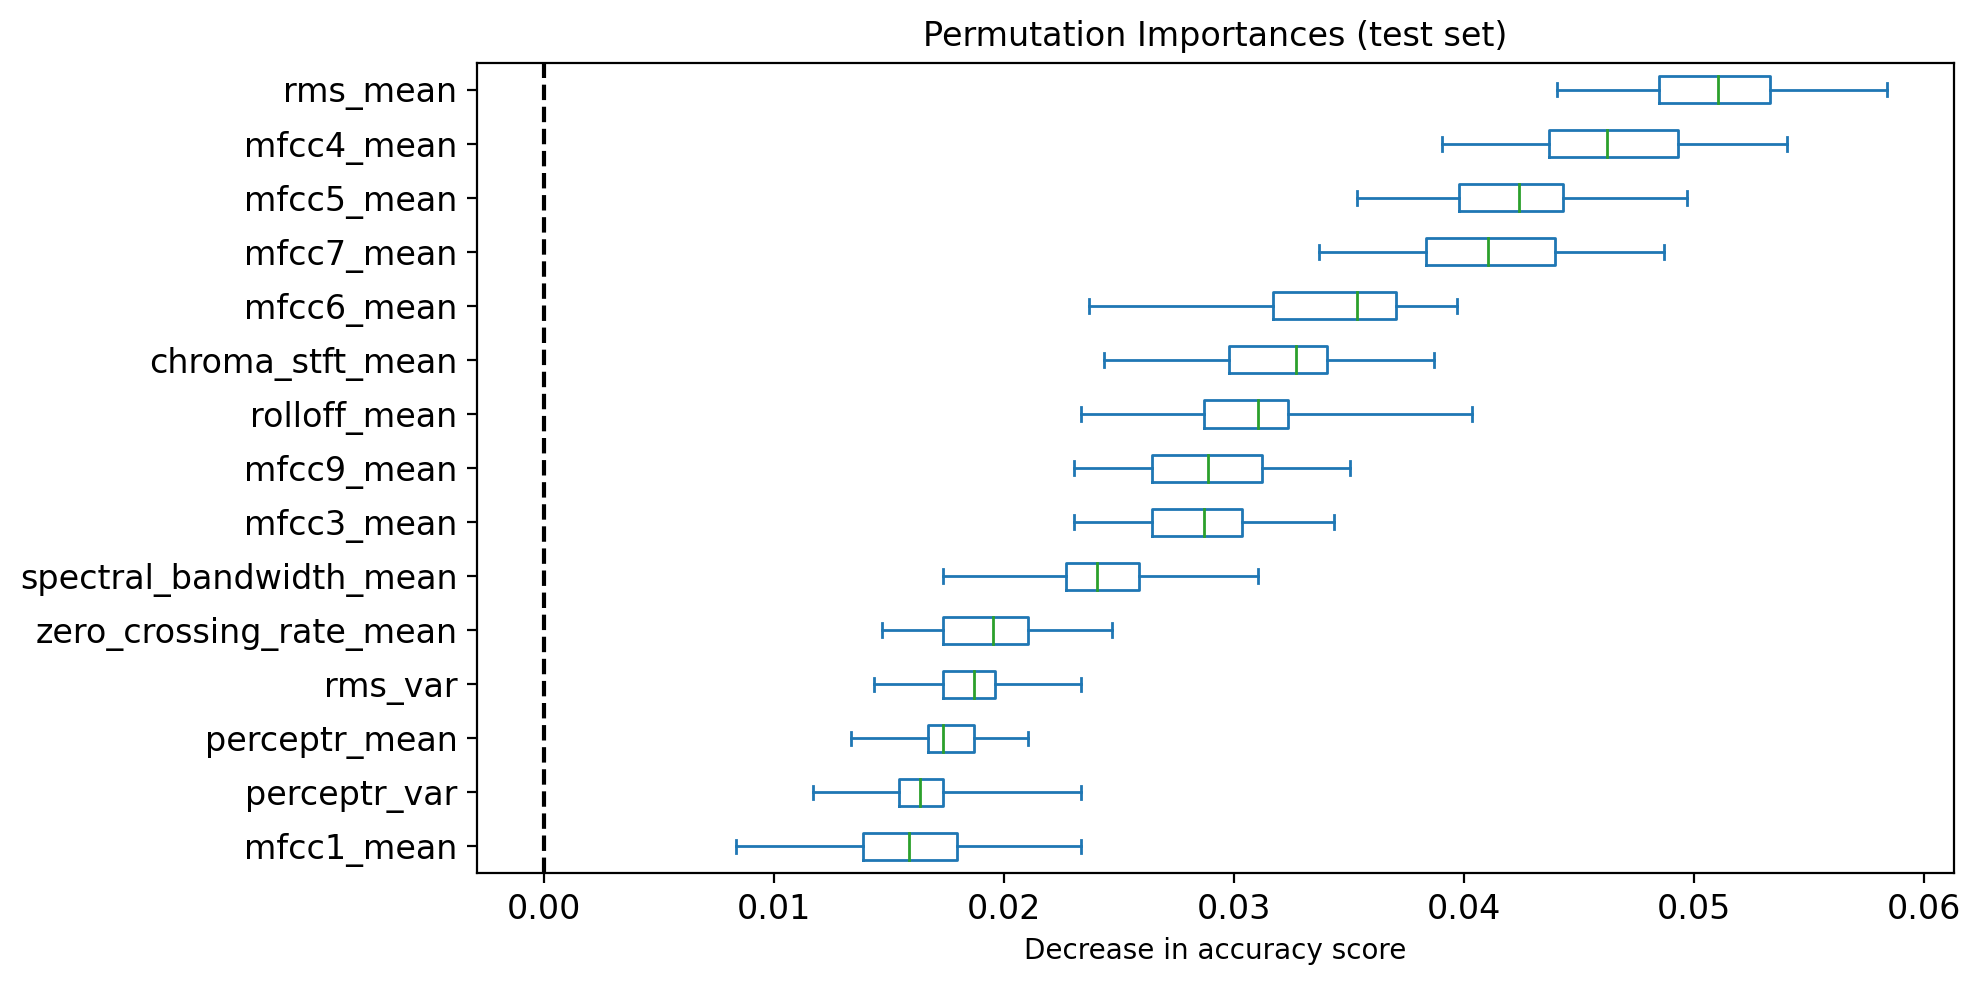

In [312]:
sorted_importances_idx = result.importances_mean.argsort()
sorted_importances_idx = sorted_importances_idx[-15:]
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax= importances.plot.box(vert=False, whis=10,figsize=(10, 5),fontsize=12)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()
plt.savefig("permutation_KNN.png")

## SVM

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)
pcaX_train, pcaX_test, pcay_train, pcay_test = train_test_split(pcaX, pcay, test_size=0.3, random_state=24)

In [92]:
svm = SVC(kernel='poly',degree=5,gamma='scale',shrinking=False,C=20,probability=False,decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

0.8815482148815482

In [94]:
Cs = [0.01,0.1,0.2,0.4,0.8,1,2,4,10,20,40]
a_linear = []
a_poly3 = []
a_poly5 = []
a_rbf = []
for cc in Cs:
    
    print('C='+str(cc))
    
    svm = SVC(kernel='linear',degree=3,gamma='scale',shrinking=True,C=cc,probability=True,decision_function_shape="ovo")
    a = model_assess(svm, "Support Vector Machine")
    a_linear.append(a)
    
    svm = SVC(kernel='poly',degree=3,gamma='scale',shrinking=True,C=cc,probability=True,decision_function_shape="ovo")
    a = model_assess(svm, "Support Vector Machine")
    a_poly3.append(a)
    
    svm = SVC(kernel='poly',degree=5,gamma='scale',shrinking=True,C=cc,probability=True,decision_function_shape="ovo")
    a = model_assess(svm, "Support Vector Machine")
    a_poly5.append(a)
    
    svm = SVC(kernel='rbf',degree=3,gamma='scale',shrinking=True,C=cc,probability=True,decision_function_shape="ovo")
    a = model_assess(svm, "Support Vector Machine")
    a_rbf.append(a)
    

C=0.01
C=0.1
C=0.2
C=0.4
C=0.8
C=1
C=2
C=4
C=10
C=20
C=40


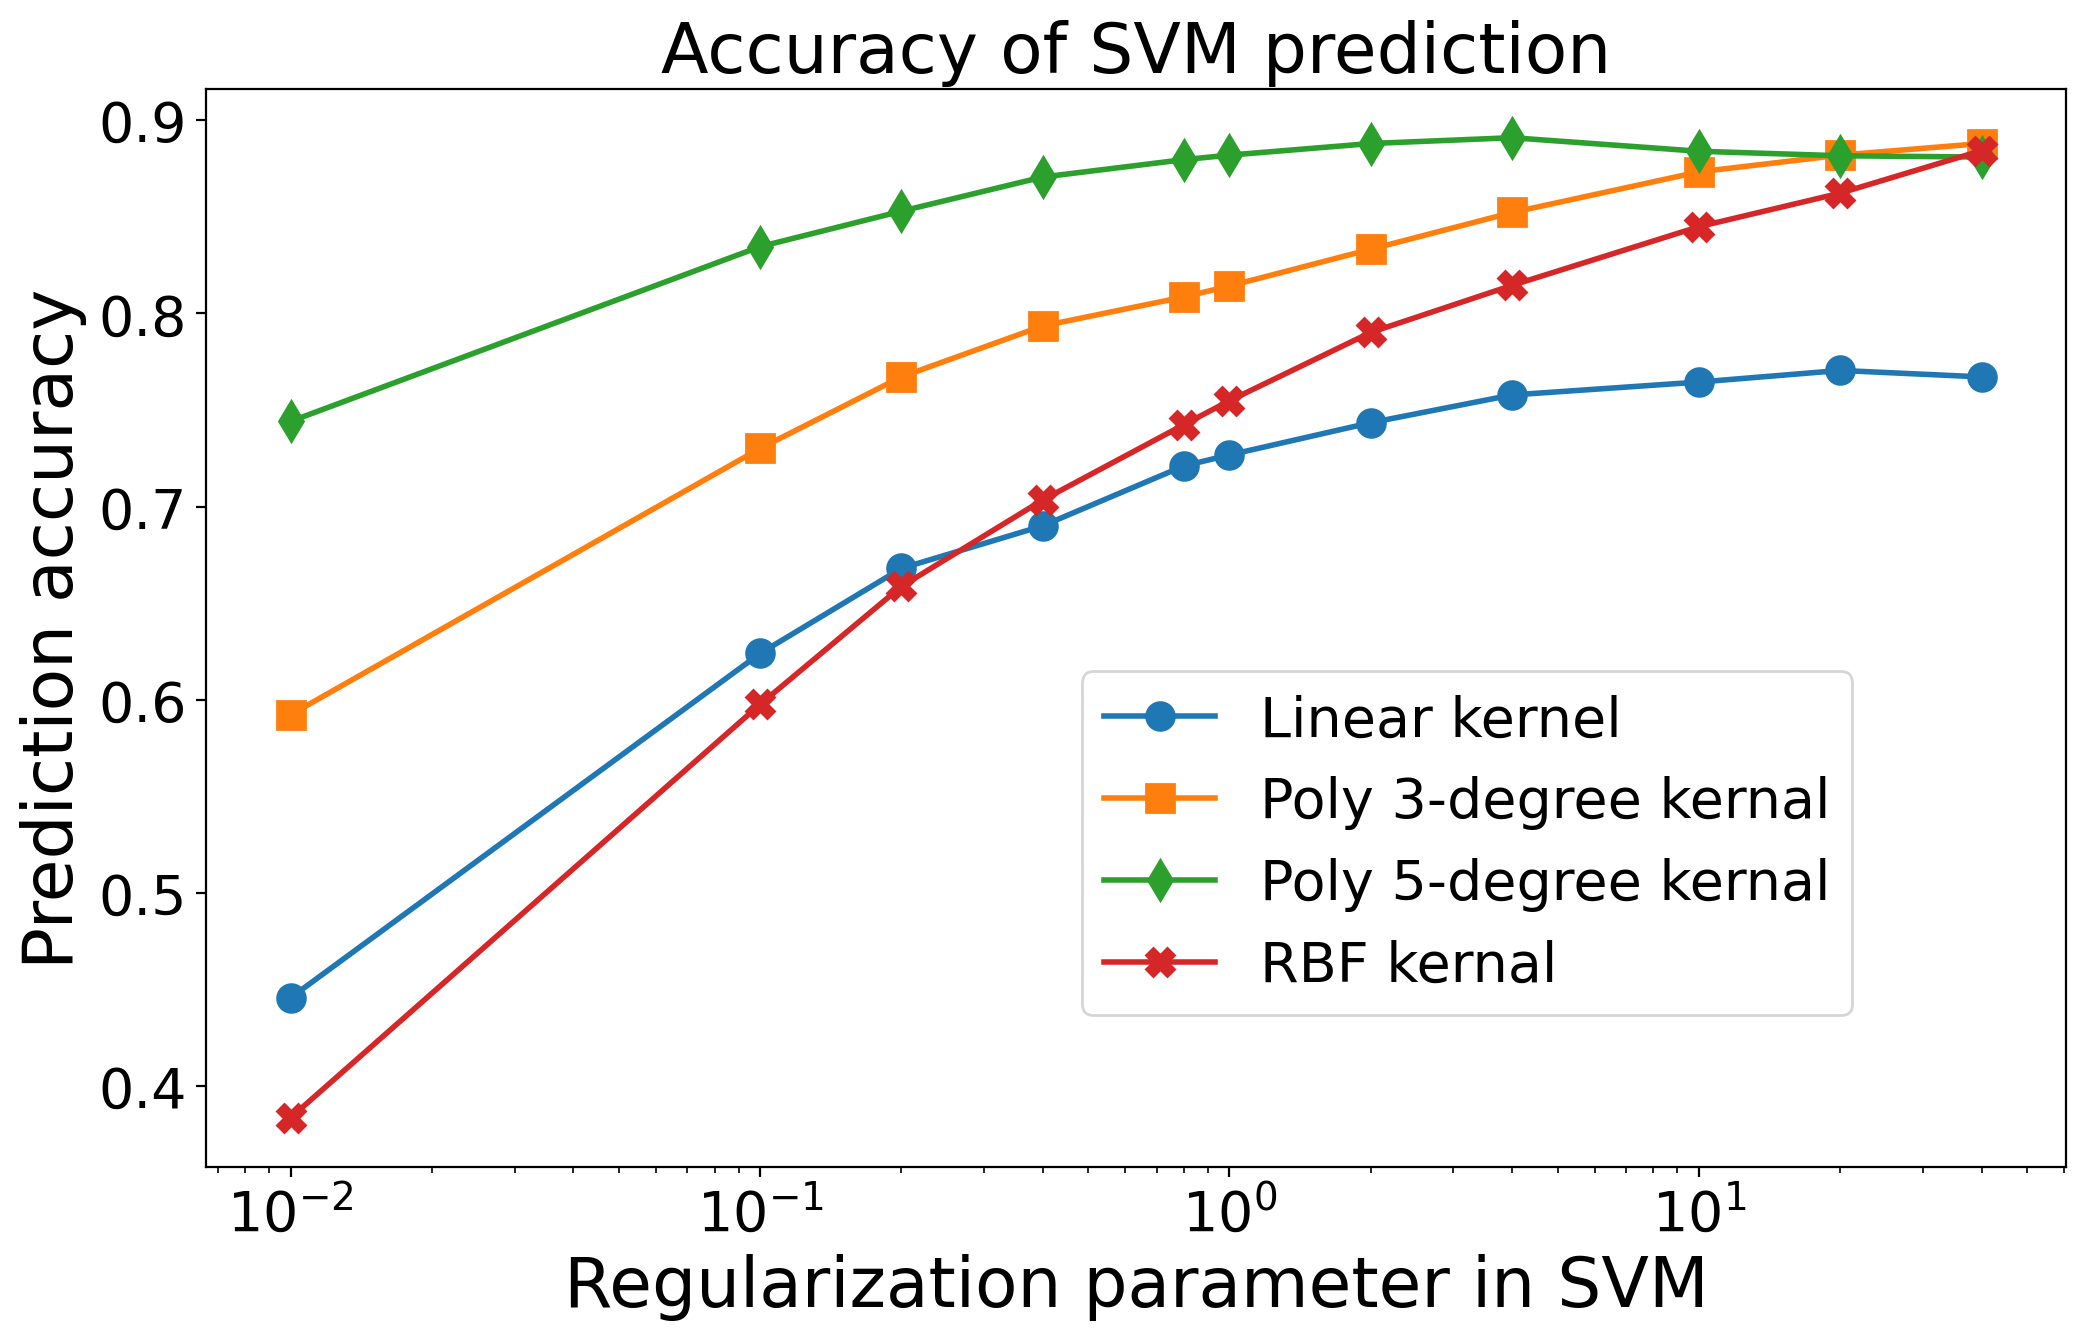

In [159]:
plt.figure(figsize = (12, 7))
plt.semilogx(Cs,a_linear,'o-',markersize=10,linewidth=2,label='Linear kernel')
plt.semilogx(Cs,a_poly3,'s-',markersize=10,linewidth=2,label='Poly 3-degree kernal')
plt.semilogx(Cs,a_poly5,'d-',markersize=10,linewidth=2,label='Poly 5-degree kernal')
plt.semilogx(Cs,a_rbf,'X-',markersize=10,linewidth=2,label='RBF kernal')
plt.title('Accuracy of SVM prediction', fontsize = 25)
#plt.xticks(ks)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);
plt.xlabel("Regularization parameter in SVM", fontsize = 25)
plt.ylabel("Prediction accuracy", fontsize = 25)
plt.legend(bbox_to_anchor=(0.9, 0.3),loc='center right',fontsize = 20)
plt.savefig("Accuracy_SVM.png")

In [120]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    plot_cm(model,y_test,preds)
    #print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')
    return accuracy_score(y_test, preds)

def plot_cm(model,y_true,y_pred):
    conf=confusion_matrix(y_true,y_pred)
    cm=pd.DataFrame(
        conf,index=[i for i in genres],
        columns=[i for i in genres]
    )
    plt.figure(figsize=(12,7))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

    # Draw the heatmap with the mask and correct aspect ratio
    ax = sns.heatmap(cm, cmap=cmap, vmax=300, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,fmt='d')
    #ax=sns.heatmap(cm,annot=True,fmt='d')
    ax.set_title(f'Confusion Matrix for {model} ')
    plt.savefig("SVM_nn.png")
    plt.show()

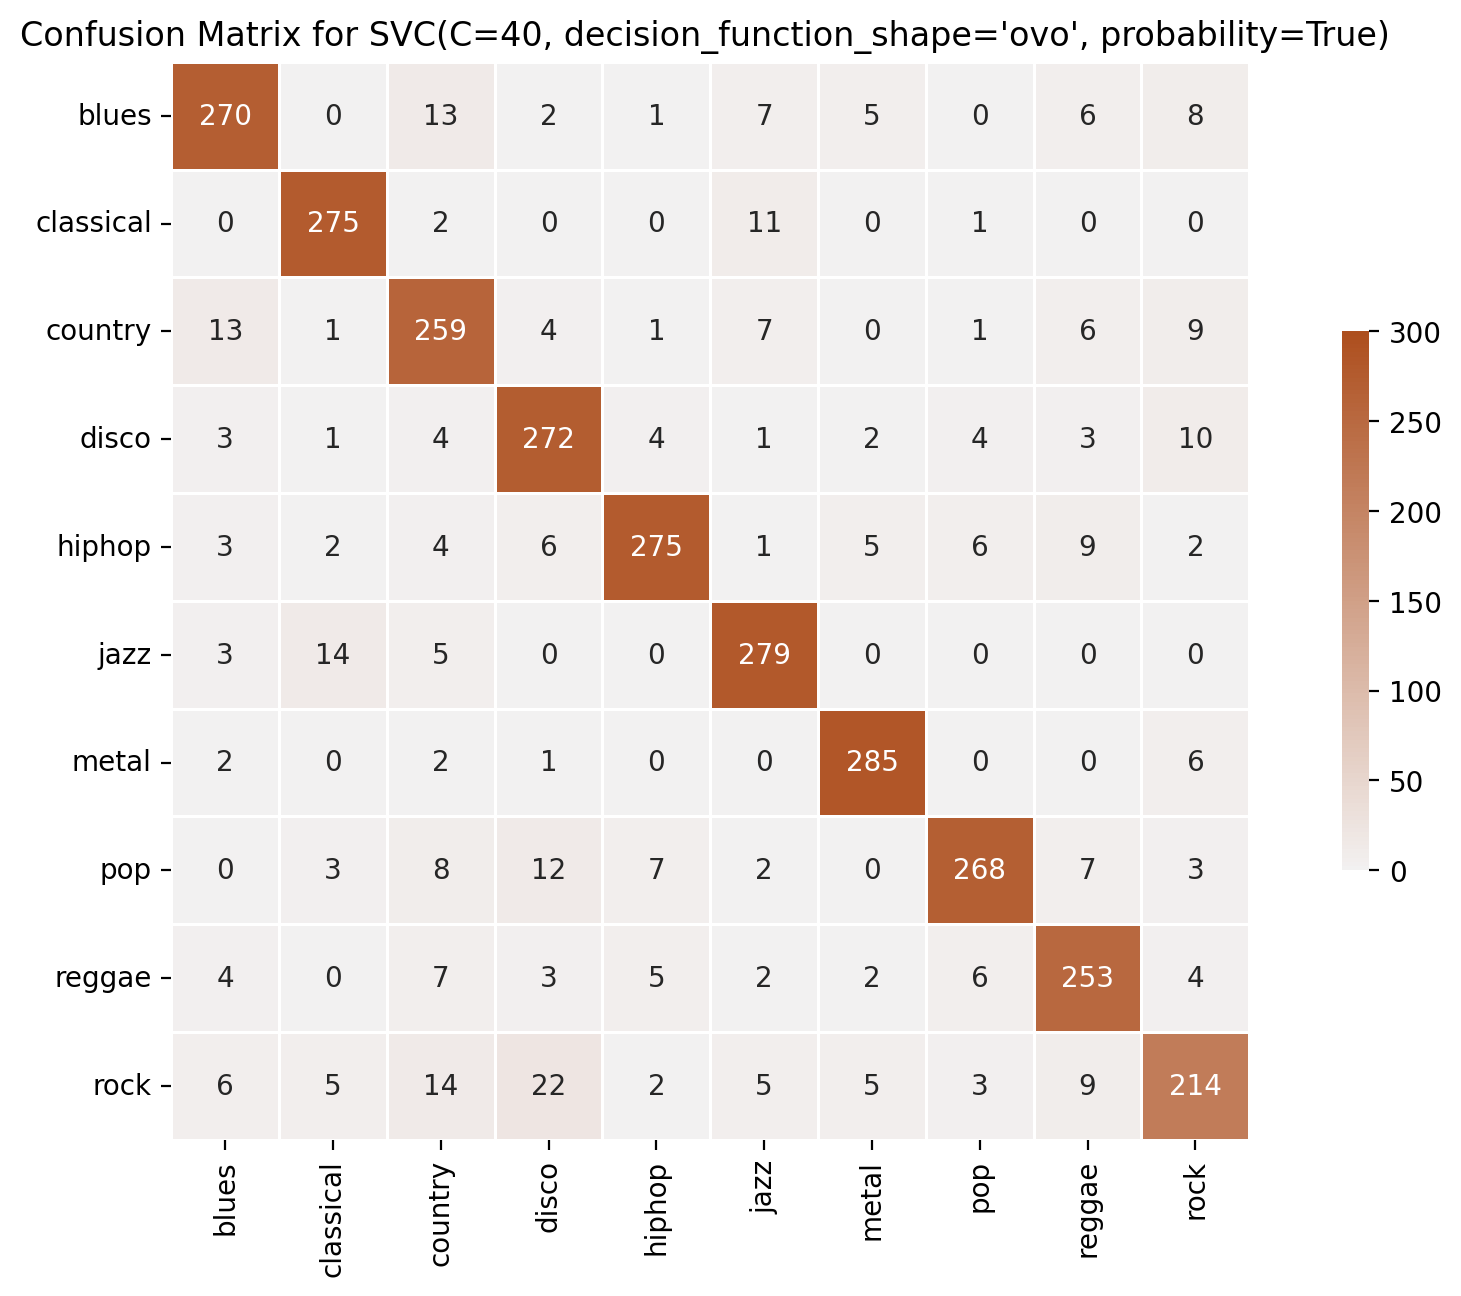

0.8842175508842175

In [119]:
svm = SVC(kernel='rbf',gamma='scale',shrinking=True,C=40,probability=True,decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

In [264]:
svm = SVC(kernel='poly',degree=5,gamma='scale',shrinking=True,C=2,probability=True,decision_function_shape="ovo")
svm.fit(X_train,y_train)
model_assess(svm, "Support Vector Machine")

0.8878878878878879

In [265]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    svm, X_test, y_test, n_repeats=50, random_state=42
)

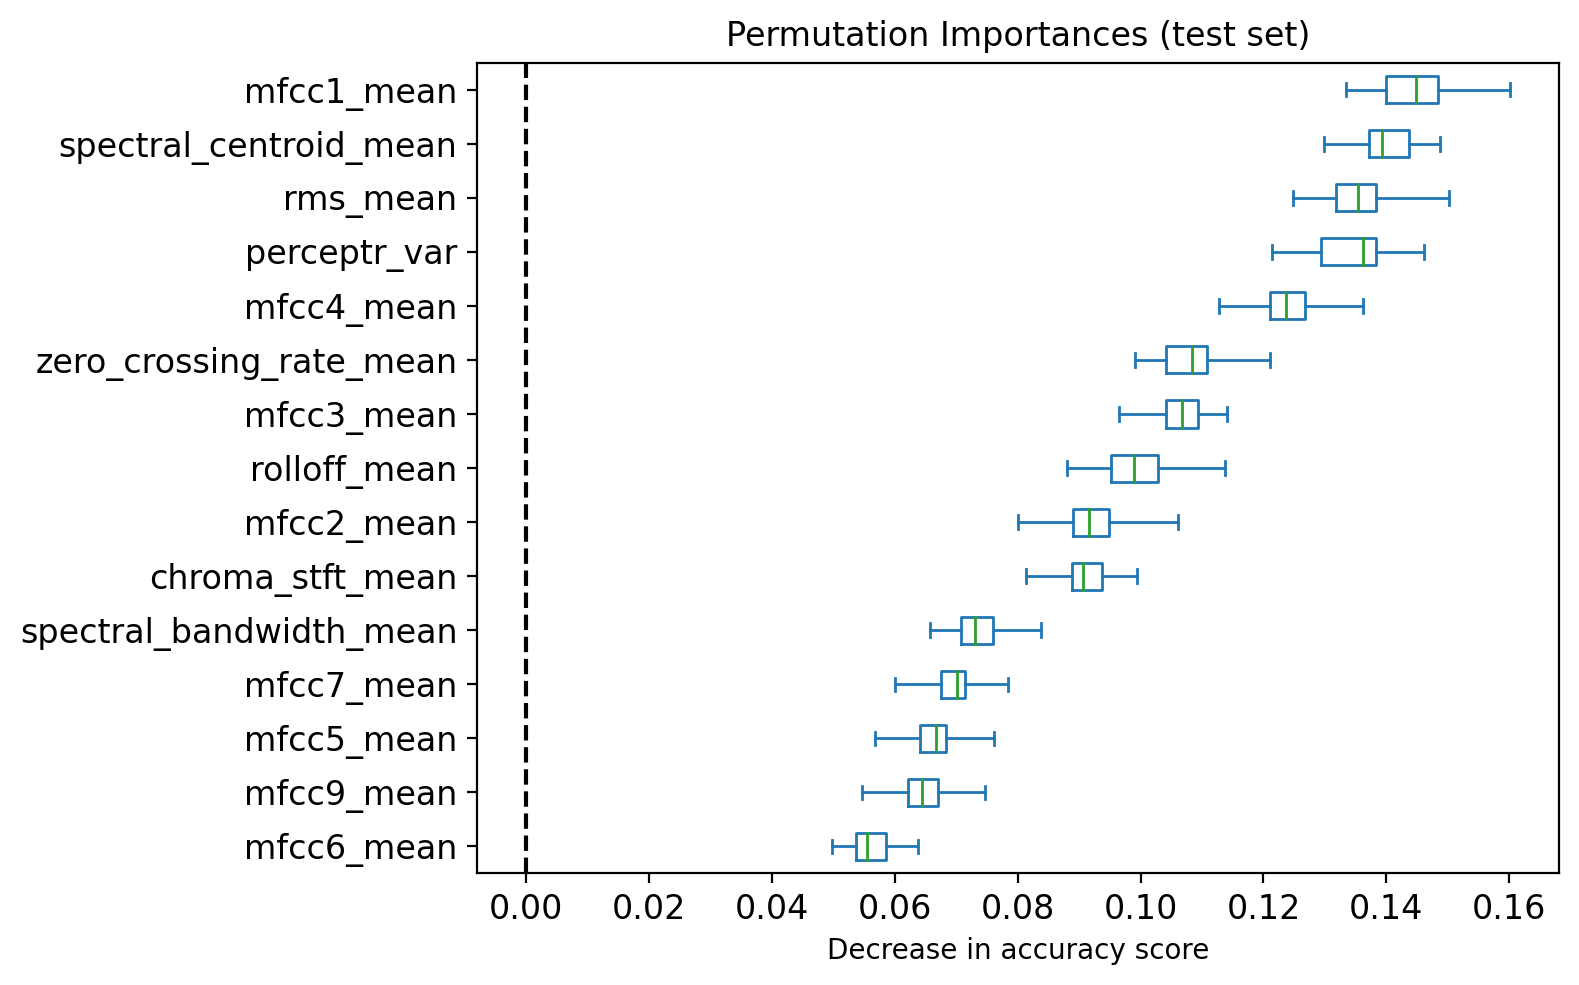

In [270]:
sorted_importances_idx = result.importances_mean.argsort()
sorted_importances_idx = sorted_importances_idx[-15:]
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax= importances.plot.box(vert=False, whis=10,figsize=(8, 5),fontsize=12)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()
plt.savefig("permutation_SVM.png")

## Neural Network

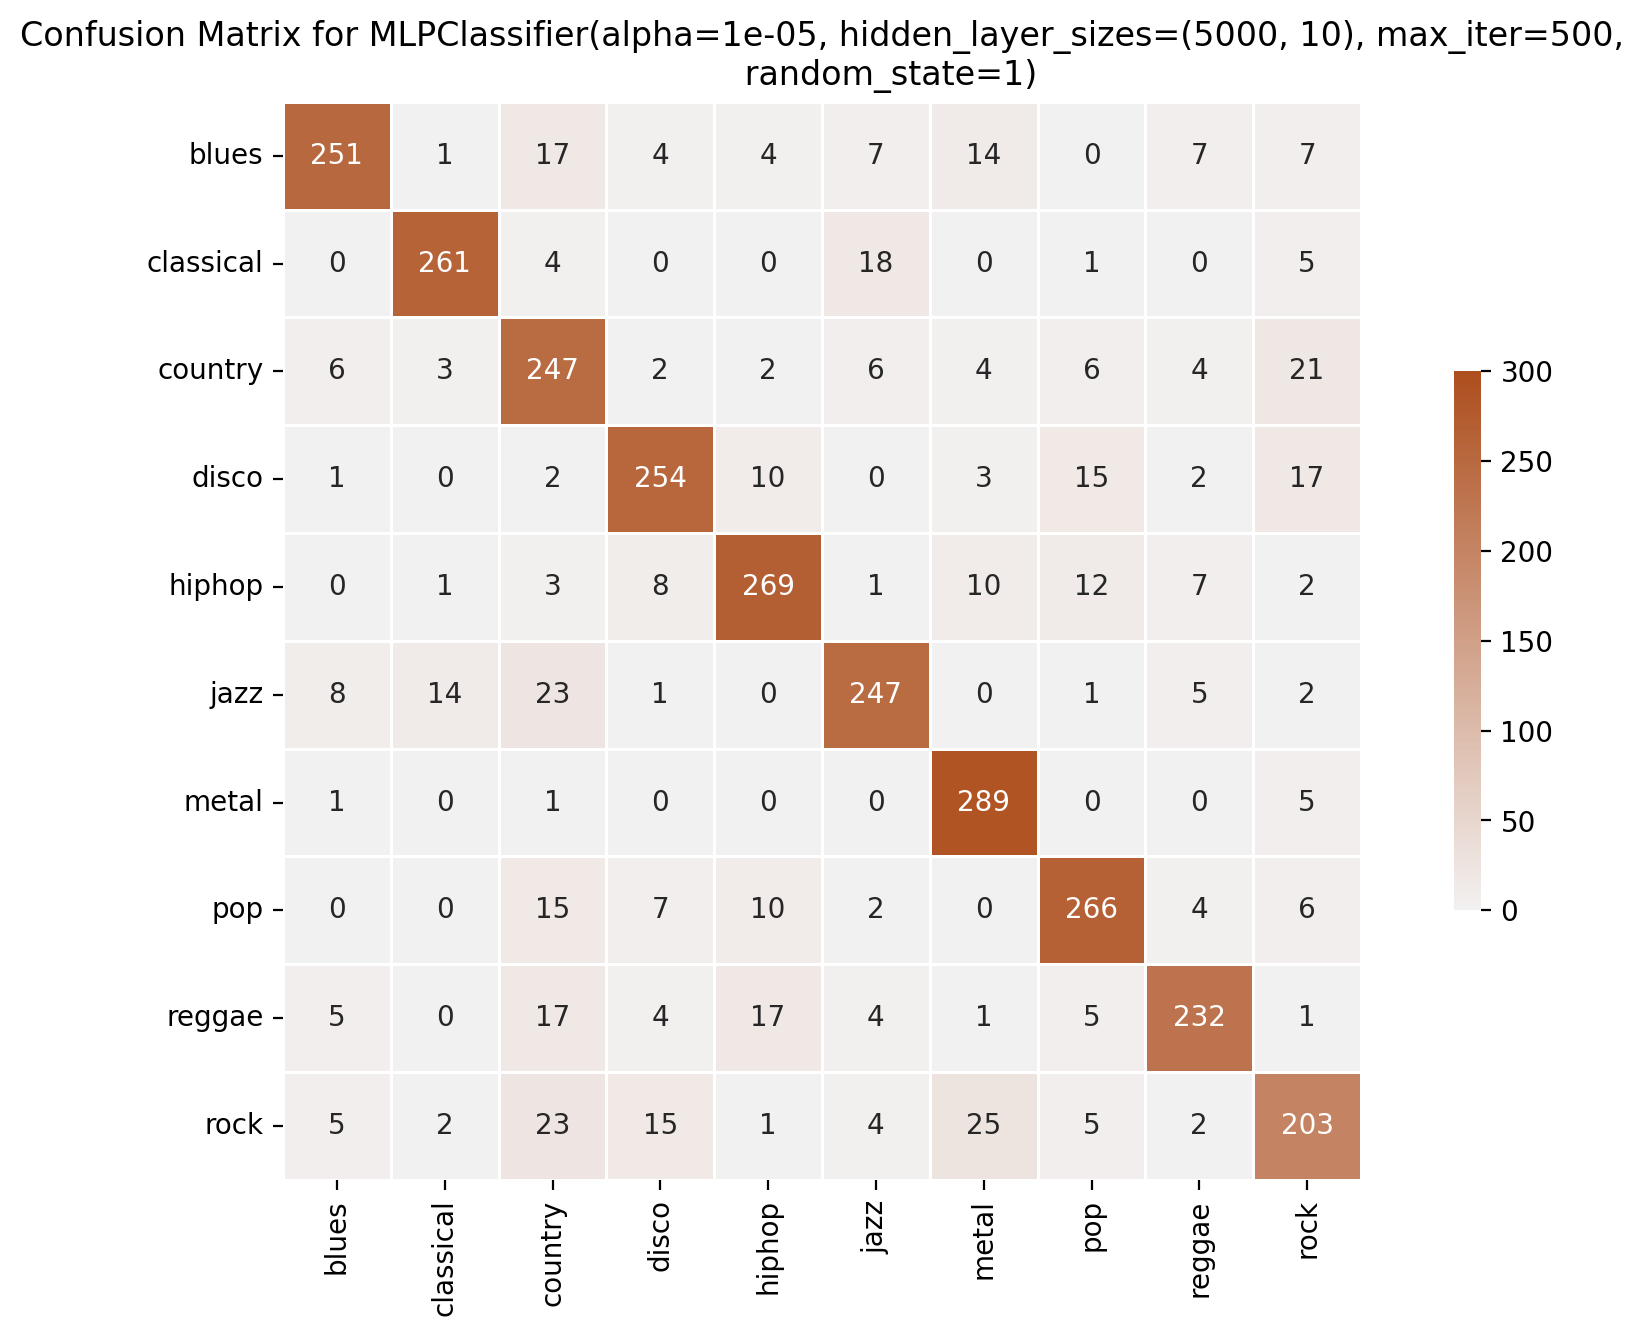

0.8405071738405072

In [122]:
nn = MLPClassifier(solver='adam', alpha=1e-5, max_iter=500, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Network")

In [124]:
X_train.shape

(6993, 58)

In [302]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    #plot_cm(model,y_test,preds)
    #print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')
    return accuracy_score(y_test, preds)

def plot_cm(model,y_true,y_pred):
    conf=confusion_matrix(y_true,y_pred)
    cm=pd.DataFrame(
        conf,index=[i for i in genres],
        columns=[i for i in genres]
    )
    plt.figure(figsize=(12,7))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

    # Draw the heatmap with the mask and correct aspect ratio
    ax = sns.heatmap(cm, cmap=cmap, vmax=300, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,fmt='d')
    #ax=sns.heatmap(cm,annot=True,fmt='d')
    ax.set_title(f'Confusion Matrix for {model} ')
    plt.savefig("SVM_nn.png")
    plt.show()
    
def model_assess_train(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_train)
    #print(confusion_matrix(y_test, preds))
    #plot_cm(model,y_test,preds)
    #print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')
    return accuracy_score(y_train, preds)

def model_assess_all(model, title = "Default"):
    model.fit(X_train, y_train)
    preds_train = model.predict(X_train)
    preds_test = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    #plot_cm(model,y_test,preds)
    #print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')
    return accuracy_score(y_test, preds_test), accuracy_score(y_train, preds_train)

In [126]:
neurons = [100,200,500,1000,2000,5000,10000]
a_lay3 = []
for ne in neurons:
    nn = MLPClassifier(solver='adam', alpha=1e-5, max_iter=1000, hidden_layer_sizes=(ne,), random_state=1)
    a = model_assess(nn, "Neural Network")
    a_lay3.append(a)

In [127]:
a_lay3

[0.8091424758091424,
 0.8351685018351686,
 0.8635301968635302,
 0.8755422088755422,
 0.8795462128795463,
 0.8828828828828829,
 0.8868868868868869]

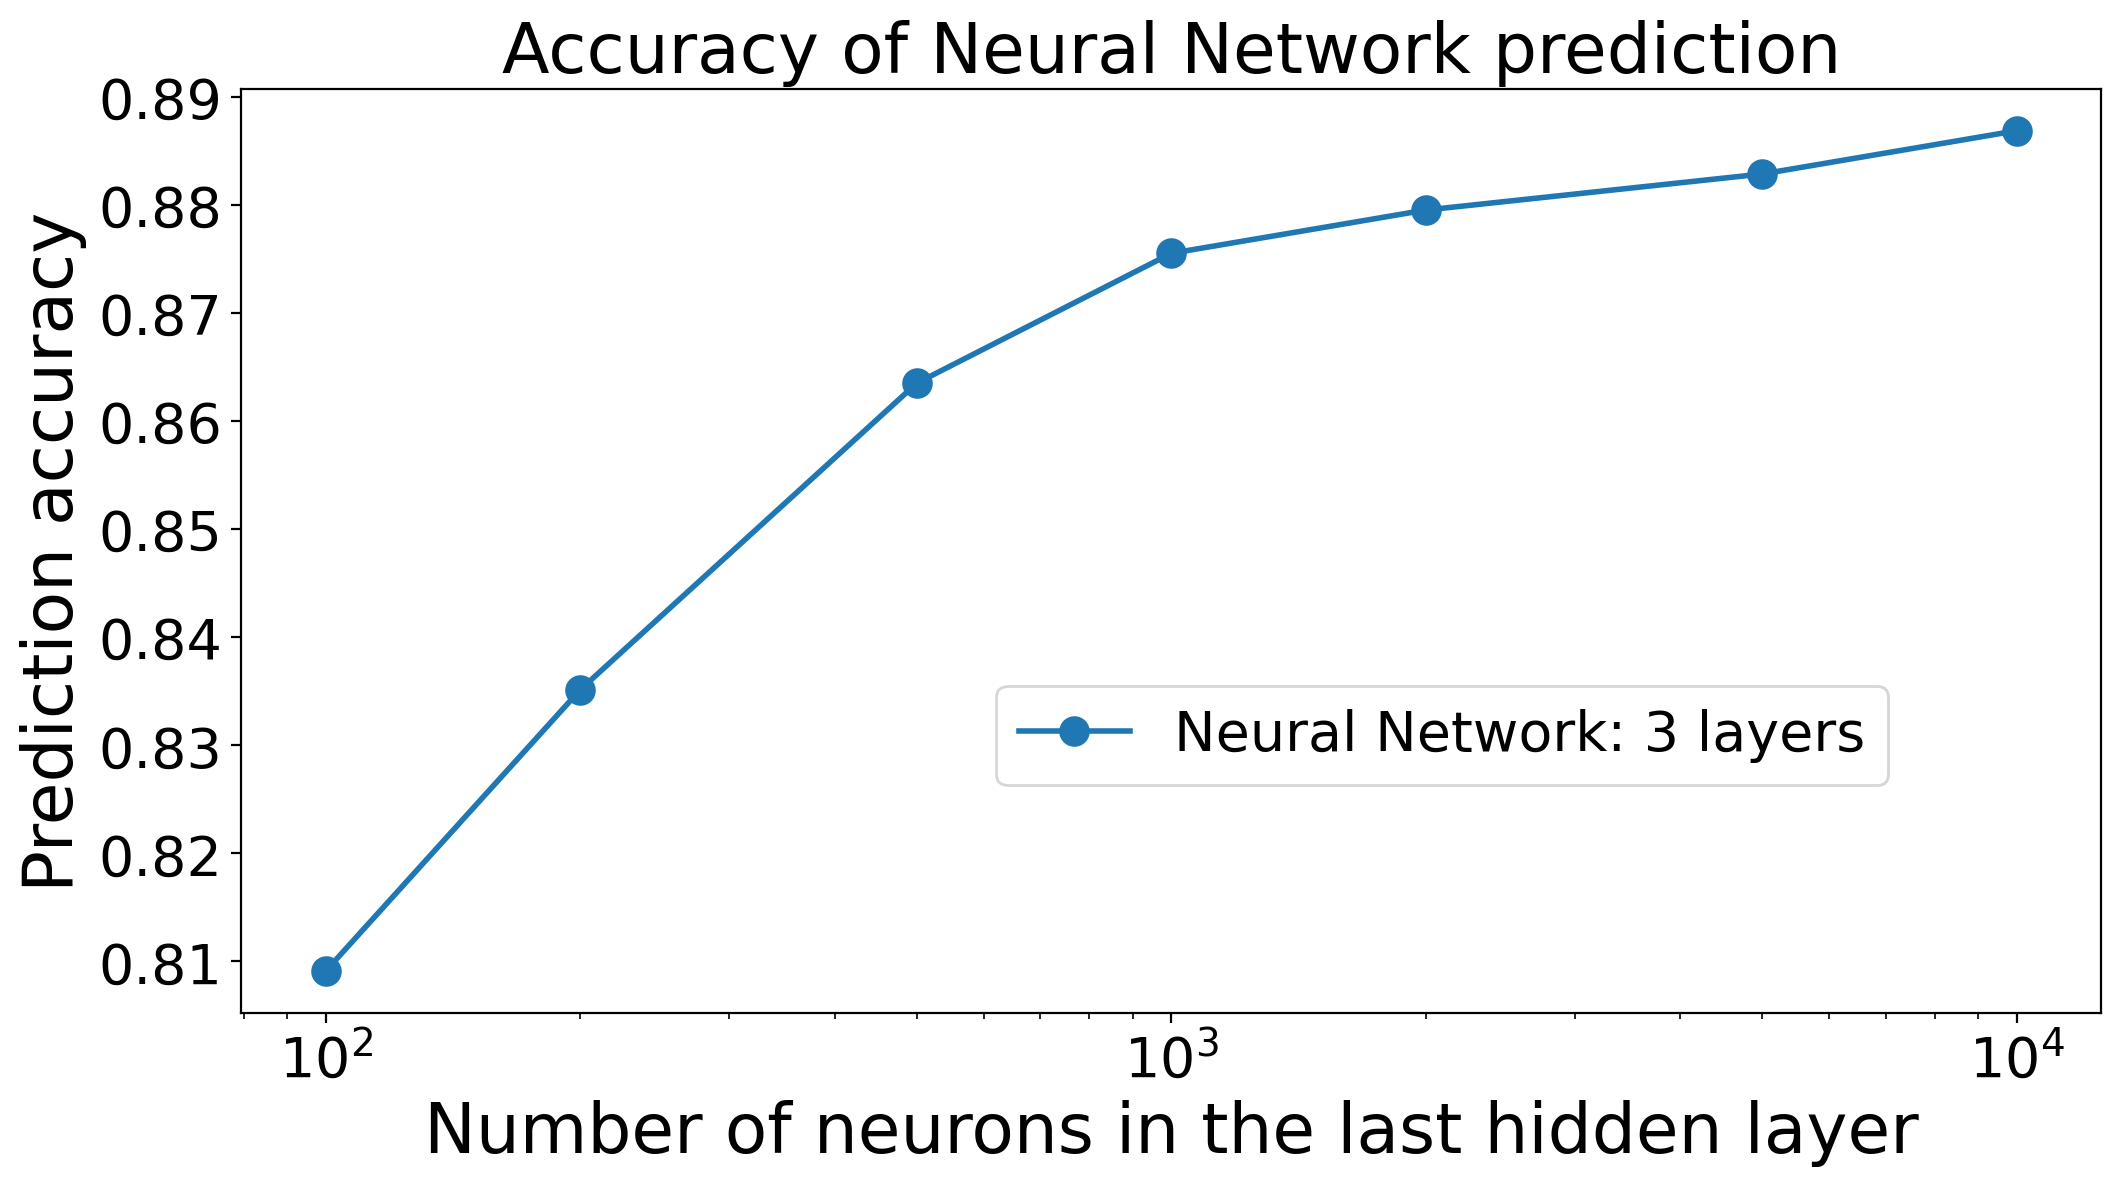

In [128]:
plt.figure(figsize = (12, 6))
plt.semilogx(neurons,a_lay3,'o-',markersize=10,linewidth=2,label='Neural Network: 3 layers')
plt.title('Accuracy of Neural Network prediction', fontsize = 25)
#plt.xticks(ks)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);
plt.xlabel("Number of neurons in the last hidden layer", fontsize = 25)
plt.ylabel("Prediction accuracy", fontsize = 25)
plt.legend(bbox_to_anchor=(0.9, 0.3),loc='center right',fontsize = 20)
#plt.savefig("Accuracy_NN_lay3.png")

In [129]:
neurons = [10,20,50,100,200]
a_lay4_2k = []
for ne in neurons:
    print("number of neurons = "+str(ne))
    nn = MLPClassifier(solver='adam', alpha=1e-5, max_iter=1000, hidden_layer_sizes=(2000,ne), random_state=1)
    a = model_assess(nn, "Neural Network")
    a_lay4_2k.append(a)

number of neurons = 10
number of neurons = 20
number of neurons = 50
number of neurons = 100
number of neurons = 200


In [130]:
a_lay4_2k

[0.8535201868535202,
 0.8558558558558559,
 0.8702035368702036,
 0.8798798798798799,
 0.8668668668668669]

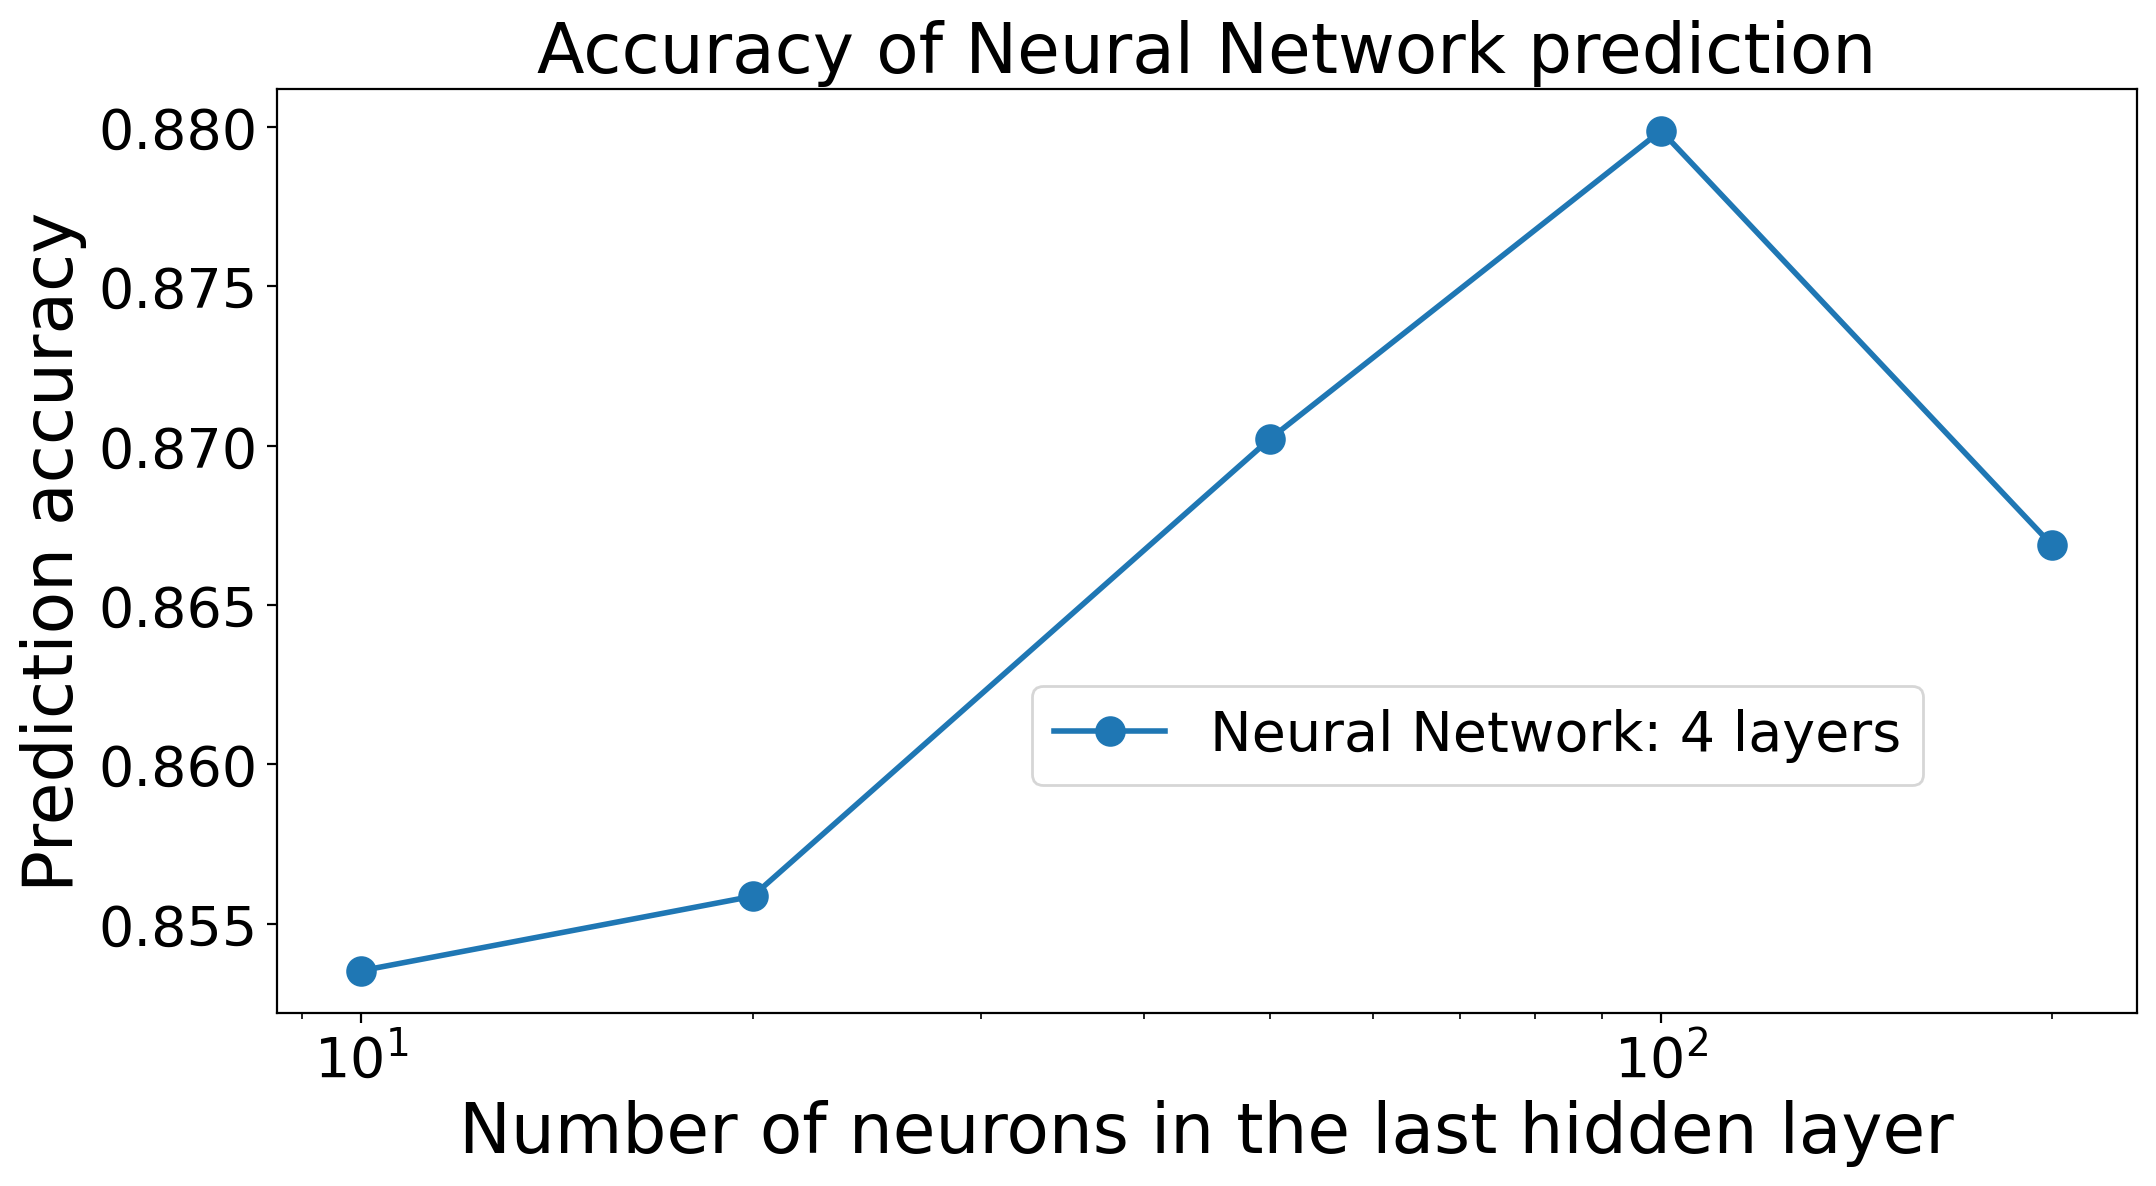

In [131]:
plt.figure(figsize = (12, 6))
plt.semilogx(neurons,a_lay4_2k,'o-',markersize=10,linewidth=2,label='Neural Network: 4 layers')
plt.title('Accuracy of Neural Network prediction', fontsize = 25)
#plt.xticks(ks)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);
plt.xlabel("Number of neurons in the last hidden layer", fontsize = 25)
plt.ylabel("Prediction accuracy", fontsize = 25)
plt.legend(bbox_to_anchor=(0.9, 0.3),loc='center right',fontsize = 20)
#plt.savefig("Accuracy_NN_lay4_2k.png")

In [137]:
neurons = [5,10,20,50,100,200,500]
a_lay4_2k = []
for ne in neurons:
    print("number of neurons = "+str(ne))
    nn = MLPClassifier(solver='adam', alpha=1e-4, max_iter=2000, hidden_layer_sizes=(2000,ne), random_state=1)
    a = model_assess(nn, "Neural Network")
    print('Accuracy = '+str(a))
    a_lay4_2k.append(a)

number of neurons = 5
Accuracy = 0.8228228228228228
number of neurons = 10
Accuracy = 0.8491825158491825
number of neurons = 20
Accuracy = 0.8575241908575242
number of neurons = 50
Accuracy = 0.8628628628628628
number of neurons = 100
Accuracy = 0.8712045378712046
number of neurons = 200
Accuracy = 0.8718718718718719
number of neurons = 500
Accuracy = 0.8698698698698699


In [145]:
a_lay4_2k

[0.8228228228228228,
 0.8491825158491825,
 0.8575241908575242,
 0.8628628628628628,
 0.8712045378712046,
 0.8718718718718719,
 0.8698698698698699]

In [162]:
a_lay4_2k

[0.8228228228228228,
 0.8491825158491825,
 0.8575241908575242,
 0.8628628628628628,
 0.8712045378712046,
 0.8718718718718719,
 0.8698698698698699]

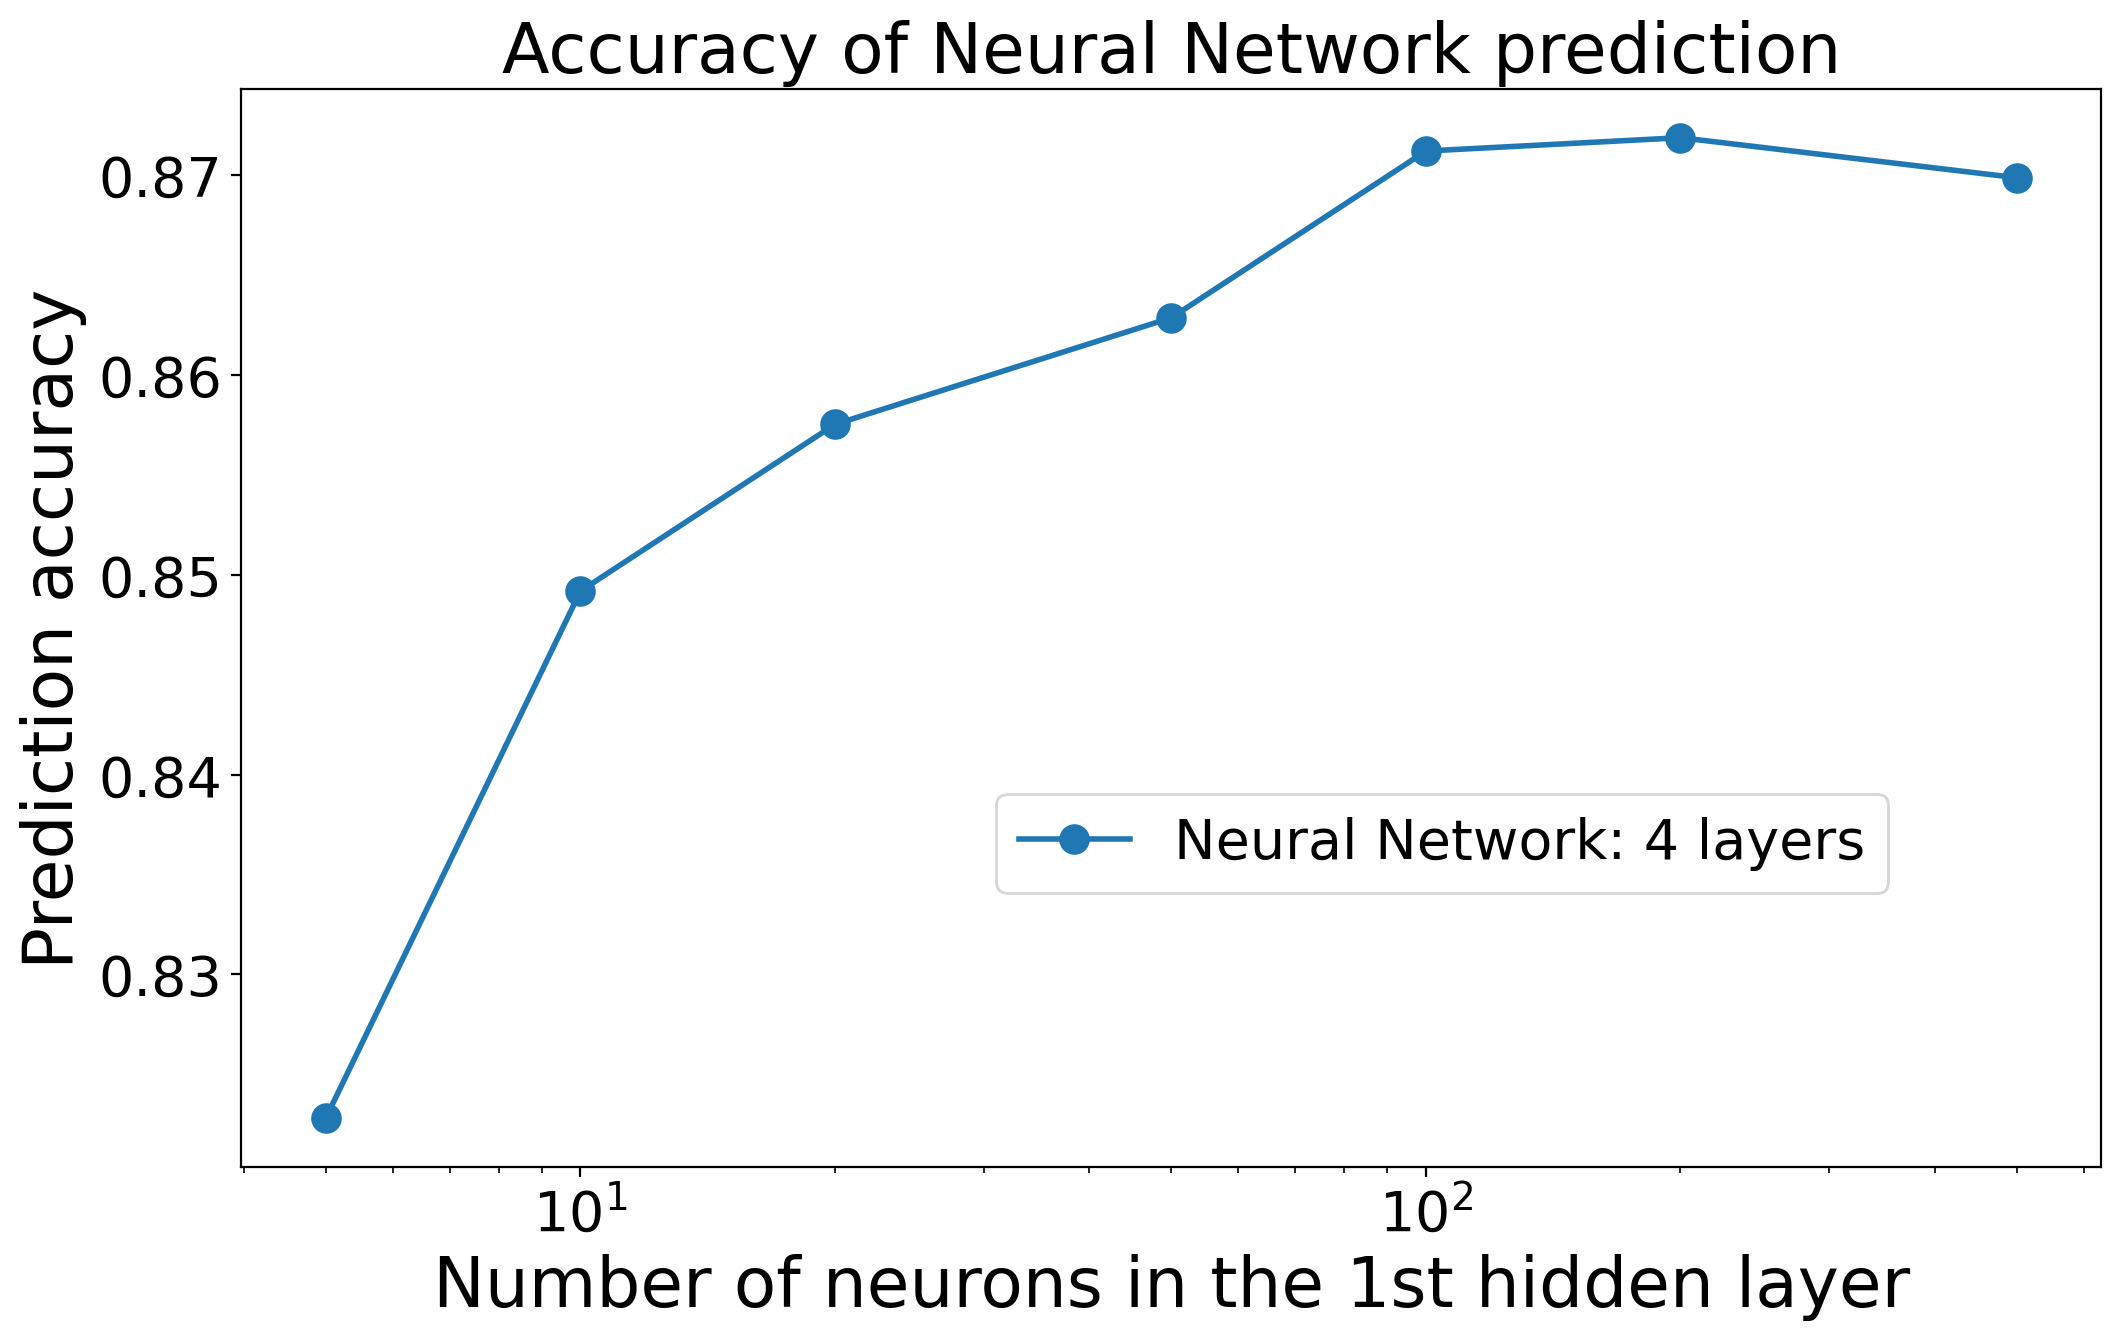

In [297]:
neurons = [5,10,20,50,100,200,500]
plt.figure(figsize = (12, 7))
plt.semilogx(neurons,a_lay4_2k,'o-',markersize=10,linewidth=2,label='Neural Network: 4 layers')
plt.title('Accuracy of Neural Network prediction', fontsize = 25)
#plt.xticks(ks)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);
plt.xlabel("Number of neurons in the 1st hidden layer", fontsize = 25)
plt.ylabel("Prediction accuracy", fontsize = 25)
plt.legend(bbox_to_anchor=(0.9, 0.3),loc='center right',fontsize = 20)
#plt.savefig("Accuracy_NN_lay4_2k_2.png")

In [304]:
neurons = [100,200,500,1000,2000,5000,10000,20000]
a_lay3 = []
b_lay3 = []
for ne in neurons:
    nn = MLPClassifier(solver='adam', alpha=1e-5, max_iter=2000, hidden_layer_sizes=(ne,), random_state=1)
    a,b = model_assess_all(nn, "Neural Network")
    print(a,b)
    a_lay3.append(a)
    b_lay3.append(b)

0.8091424758091424 0.8861718861718861
0.8351685018351686 0.9486629486629486
0.8635301968635302 0.9894179894179894
0.8755422088755422 0.9947089947089947
0.8795462128795463 0.9971399971399971
0.8828828828828829 0.9985699985699986
0.8868868868868869 0.9987129987129987
0.8725392058725392 0.993993993993994


In [140]:
a_lay3

[0.8091424758091424,
 0.8351685018351686,
 0.8635301968635302,
 0.8755422088755422,
 0.8795462128795463,
 0.8828828828828829,
 0.8868868868868869,
 0.8725392058725392]

In [301]:
nn = MLPClassifier(solver='adam', alpha=1e-5, max_iter=2000, hidden_layer_sizes=(20000,), random_state=1)
a = model_assess_train(nn, "Neural Network")
a

0.993993993993994

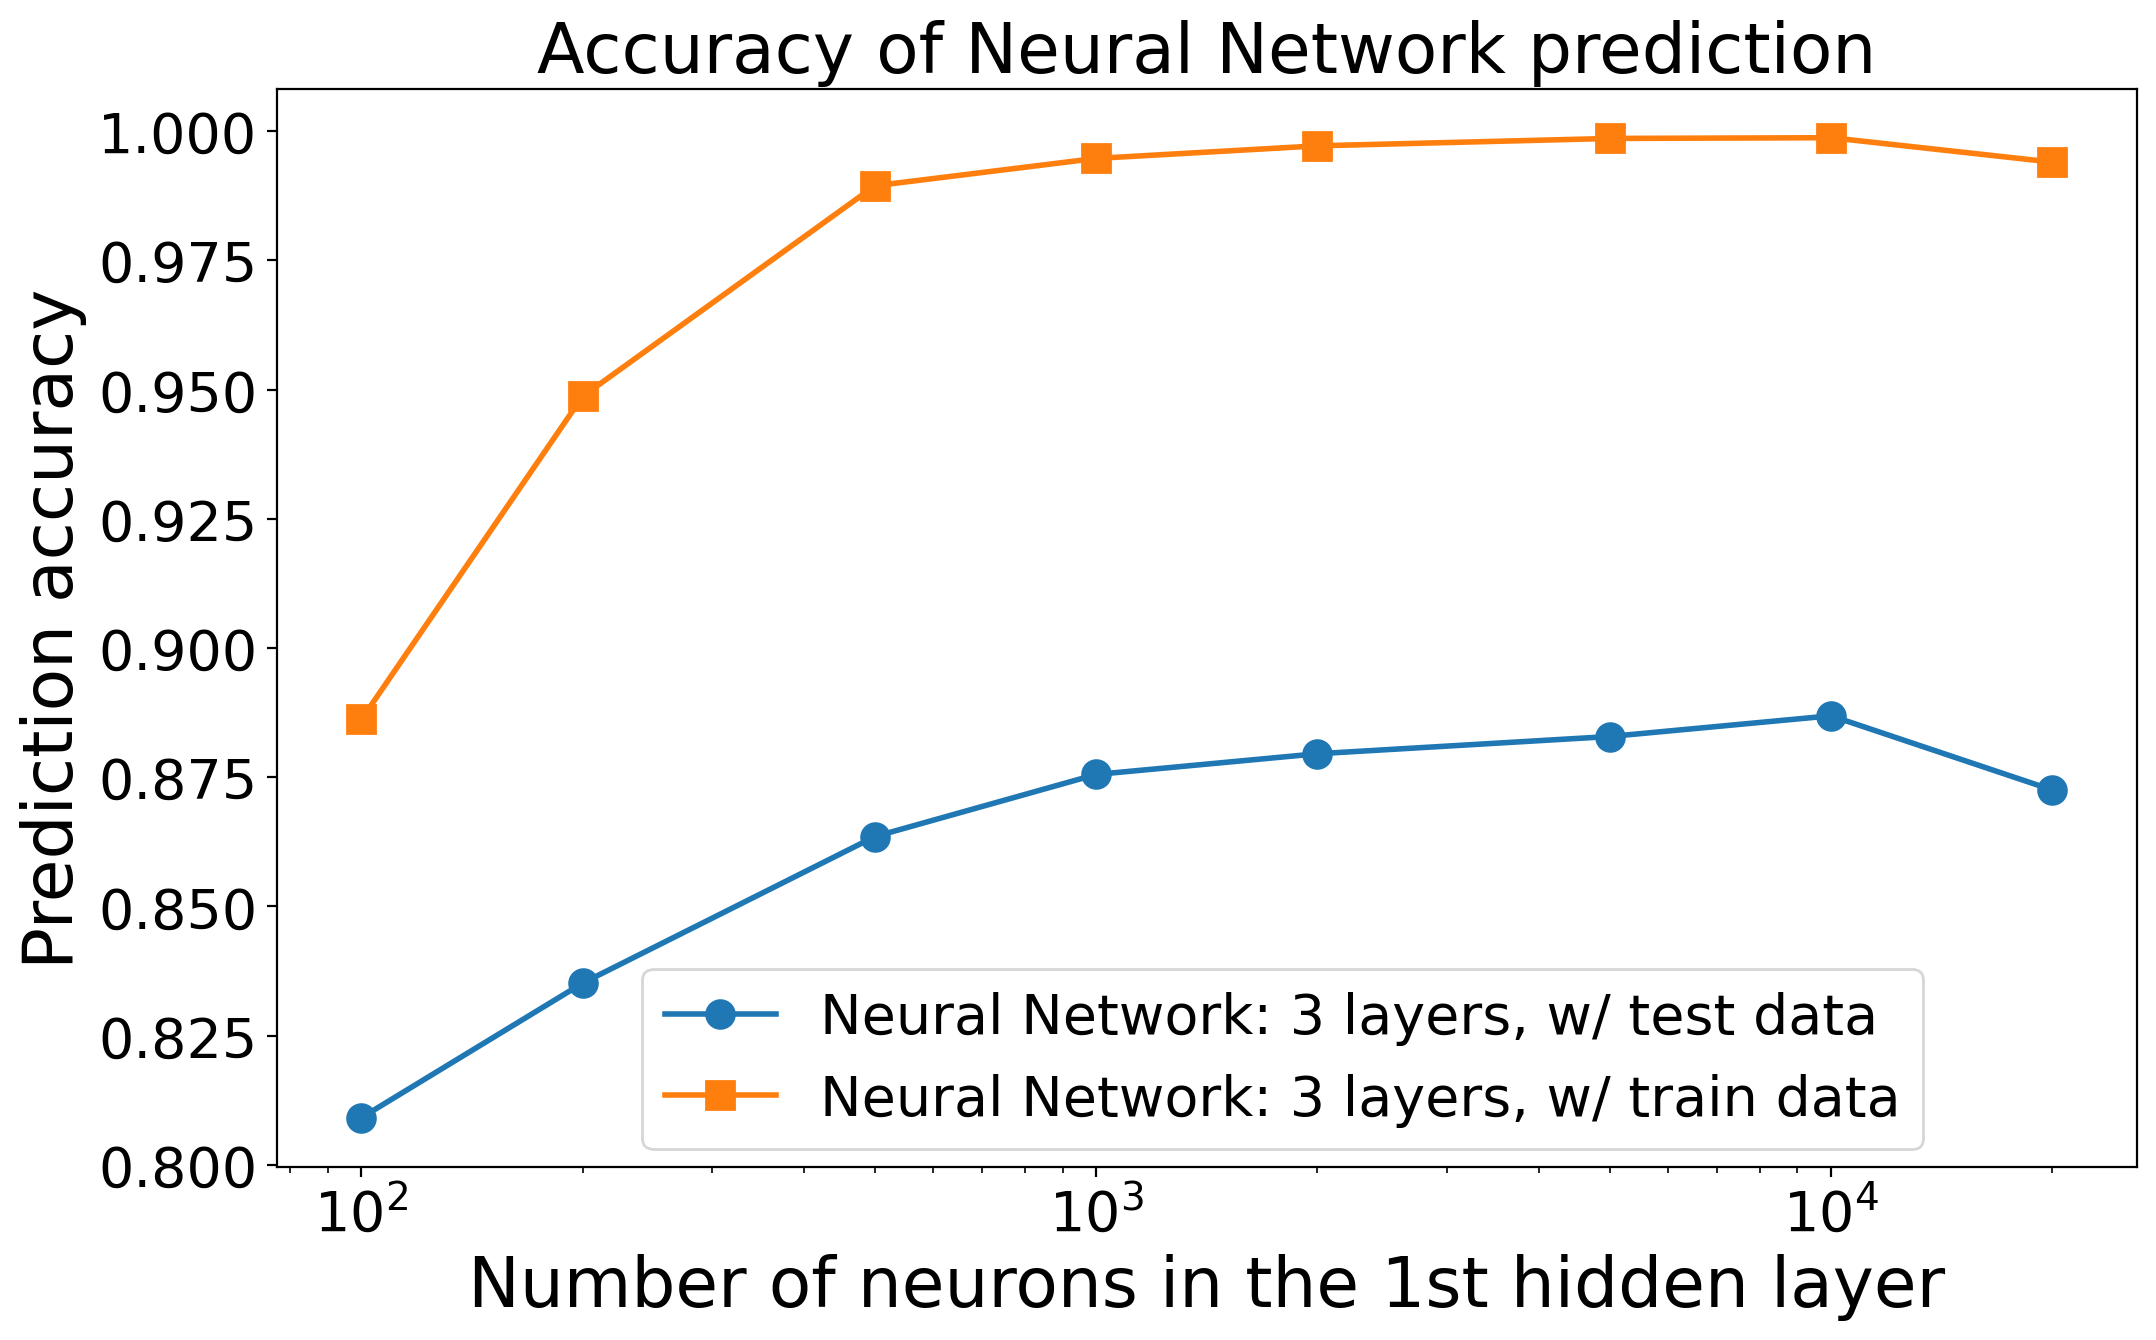

In [308]:
neurons = [100,200,500,1000,2000,5000,10000,20000]
plt.figure(figsize = (12, 7))
plt.semilogx(neurons,a_lay3,'o-',markersize=10,linewidth=2,label='Neural Network: 3 layers, w/ test data')
plt.semilogx(neurons,b_lay3,'s-',markersize=10,linewidth=2,label='Neural Network: 3 layers, w/ train data')
plt.title('Accuracy of Neural Network prediction', fontsize = 25)
#plt.xticks(ks)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);
plt.xlabel("Number of neurons in the 1st hidden layer", fontsize = 25)
plt.ylabel("Prediction accuracy", fontsize = 25)
plt.legend(bbox_to_anchor=(0.9, 0.1),loc='center right',fontsize = 20)
plt.savefig("Accuracy_NN_lay3_2.png")

In [139]:
neurons = [5,10,20,50,100,200,500]
a_lay4_5k = []
for ne in neurons:
    print("number of neurons = "+str(ne))
    nn = MLPClassifier(solver='adam', alpha=1e-5, max_iter=2000, hidden_layer_sizes=(5000,ne), random_state=1)
    a = model_assess(nn, "Neural Network")
    print('Accuracy = '+str(a))
    a_lay4_5k.append(a)

number of neurons = 5
Accuracy = 0.8284951618284951
number of neurons = 10
Accuracy = 0.8405071738405072
number of neurons = 20
Accuracy = 0.8792125458792125
number of neurons = 50
Accuracy = 0.8678678678678678
number of neurons = 100
Accuracy = 0.8735402068735402
number of neurons = 200
Accuracy = 0.8792125458792125
number of neurons = 500
Accuracy = 0.8755422088755422


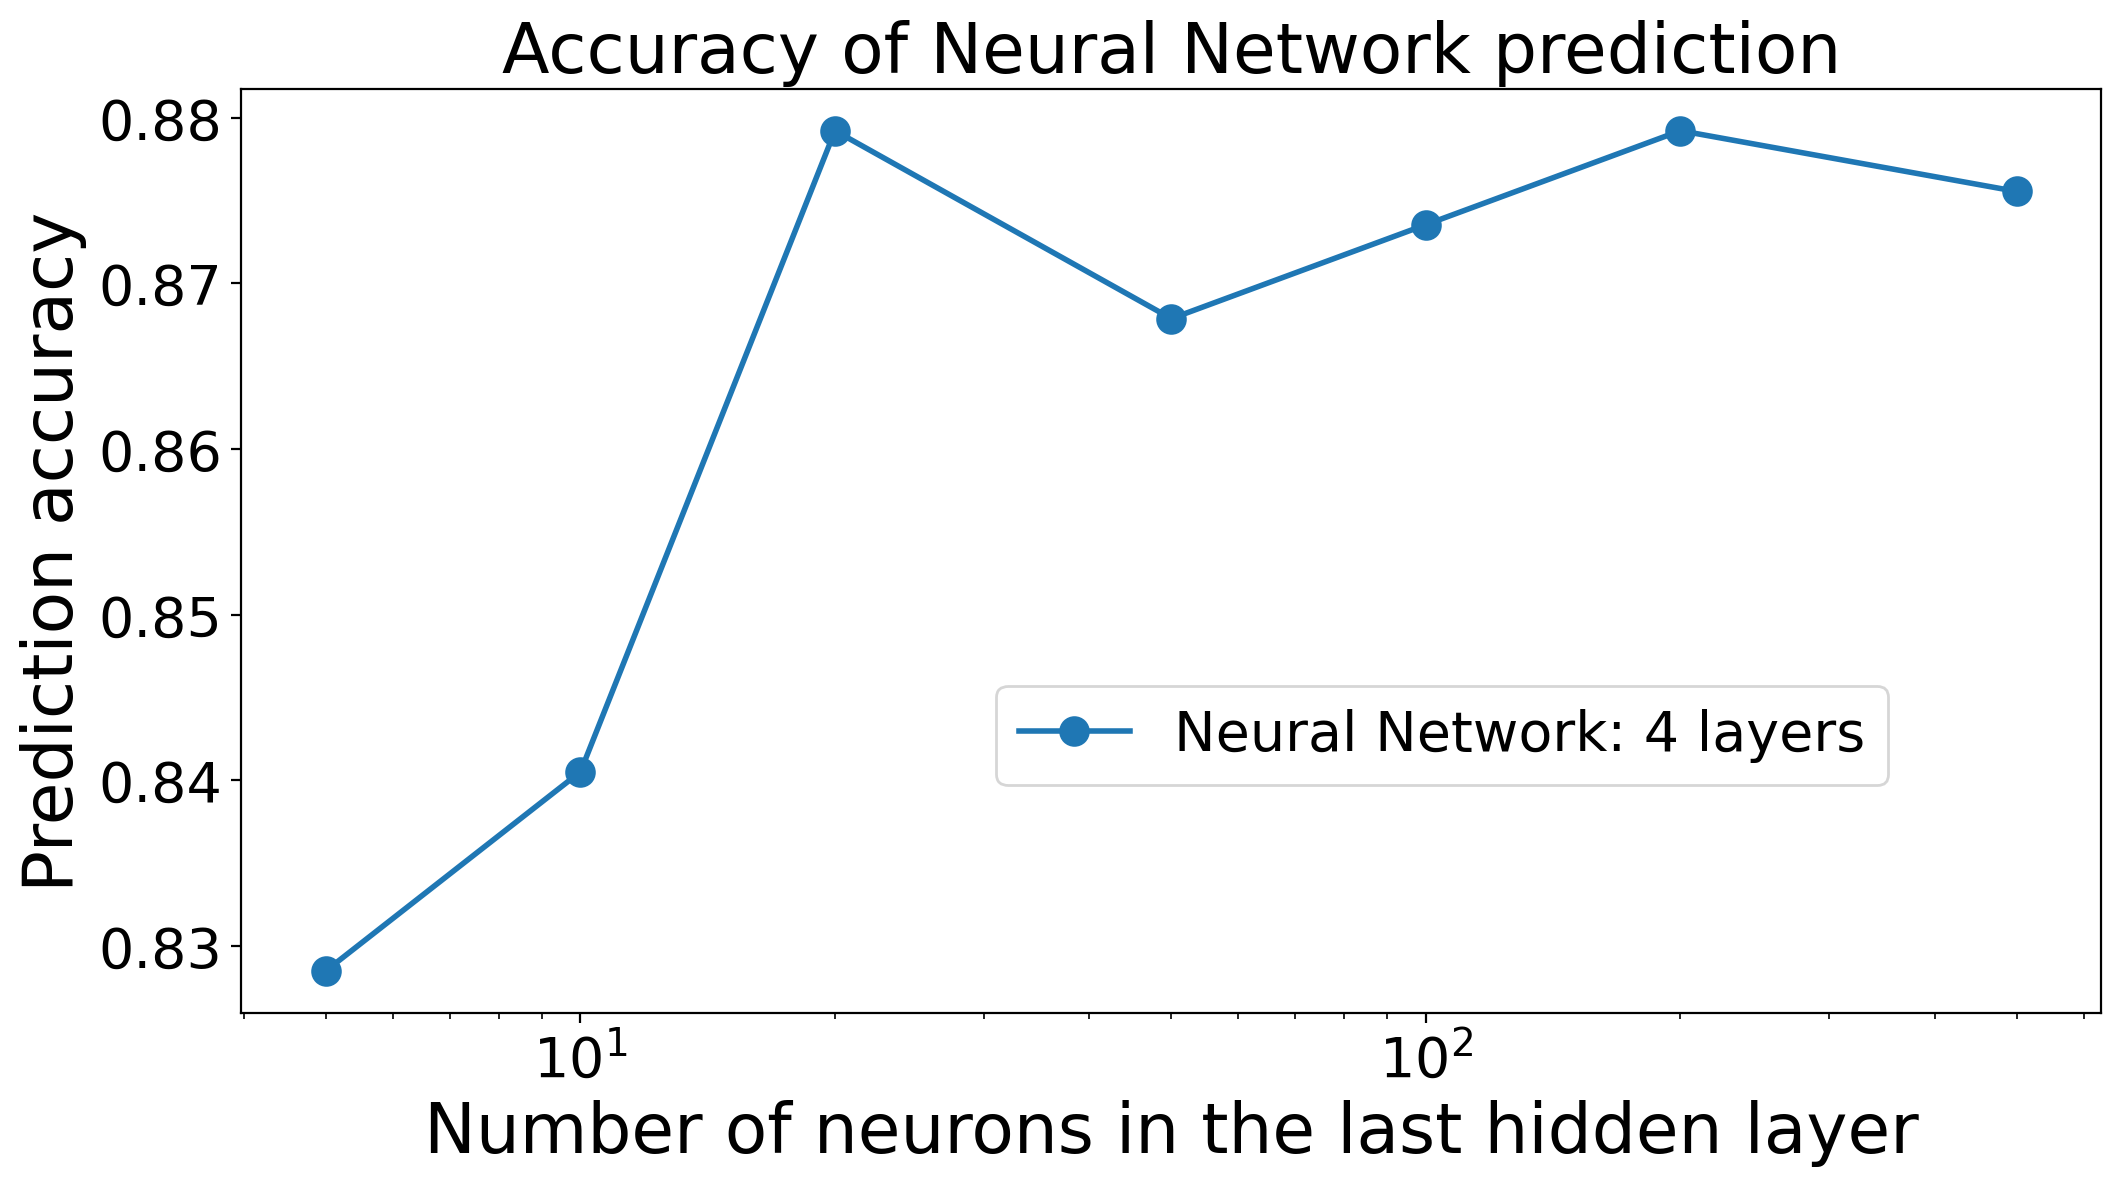

In [149]:
neurons = [5,10,20,50,100,200,500]
plt.figure(figsize = (12, 6))
plt.semilogx(neurons,a_lay4_5k,'o-',markersize=10,linewidth=2,label='Neural Network: 4 layers')
plt.title('Accuracy of Neural Network prediction', fontsize = 25)
#plt.xticks(ks)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);
plt.xlabel("Number of neurons in the last hidden layer", fontsize = 25)
plt.ylabel("Prediction accuracy", fontsize = 25)
plt.legend(bbox_to_anchor=(0.9, 0.3),loc='center right',fontsize = 20)
#plt.savefig("Accuracy_NN_lay4_2k_2.png")

In [150]:
neurons = [5,10,20,50,100,200]
a_lay5_2k_100 = []
for ne in neurons:
    print("number of neurons = "+str(ne))
    nn = MLPClassifier(solver='adam', alpha=1e-5, max_iter=2000, hidden_layer_sizes=(2000,100,ne), random_state=1)
    a = model_assess(nn, "Neural Network")
    print('Accuracy = '+str(a))
    a_lay5_2k_100.append(a)

number of neurons = 5
Accuracy = 0.8188188188188188
number of neurons = 10
Accuracy = 0.8651985318651986
number of neurons = 20
Accuracy = 0.8728728728728729
number of neurons = 50
Accuracy = 0.8625291958625292
number of neurons = 100
Accuracy = 0.8708708708708709
number of neurons = 200
Accuracy = 0.8808808808808809


In [151]:
neurons = [5,10,20,50,100,200]
a_lay5_1k_100 = []
for ne in neurons:
    print("number of neurons = "+str(ne))
    nn = MLPClassifier(solver='adam', alpha=1e-5, max_iter=2000, hidden_layer_sizes=(1000,100,ne), random_state=1)
    a = model_assess(nn, "Neural Network")
    print('Accuracy = '+str(a))
    a_lay5_1k_100.append(a)

number of neurons = 5
Accuracy = 0.8378378378378378
number of neurons = 10
Accuracy = 0.8682015348682015
number of neurons = 20
Accuracy = 0.8581915248581915
number of neurons = 50
Accuracy = 0.8812145478812146
number of neurons = 100
Accuracy = 0.8611945278611945
number of neurons = 200
Accuracy = 0.8638638638638638


In [152]:
neurons = [5,10,20,50,100,200,500]
a_lay4_1k = []
for ne in neurons:
    print("number of neurons = "+str(ne))
    nn = MLPClassifier(solver='adam', alpha=1e-4, max_iter=2000, hidden_layer_sizes=(1000,ne), random_state=1)
    a = model_assess(nn, "Neural Network")
    print('Accuracy = '+str(a))
    a_lay4_1k.append(a)

number of neurons = 5
Accuracy = 0.8008008008008008
number of neurons = 10
Accuracy = 0.8485151818485152
number of neurons = 20
Accuracy = 0.8682015348682015
number of neurons = 50
Accuracy = 0.8675342008675342
number of neurons = 100
Accuracy = 0.8762095428762096
number of neurons = 200
Accuracy = 0.8732065398732065
number of neurons = 500
Accuracy = 0.8531865198531865


In [153]:
neurons = [5,10,20,50,100,200,500]
a_lay4_500 = []
for ne in neurons:
    print("number of neurons = "+str(ne))
    nn = MLPClassifier(solver='adam', alpha=1e-4, max_iter=2000, hidden_layer_sizes=(500,ne), random_state=1)
    a = model_assess(nn, "Neural Network")
    print('Accuracy = '+str(a))
    a_lay4_500.append(a)

number of neurons = 5
Accuracy = 0.8281614948281615
number of neurons = 10
Accuracy = 0.8555221888555222
number of neurons = 20
Accuracy = 0.8558558558558559
number of neurons = 50
Accuracy = 0.8595261928595261
number of neurons = 100
Accuracy = 0.8585251918585252
number of neurons = 200
Accuracy = 0.8715382048715382
number of neurons = 500
Accuracy = 0.8812145478812146


In [154]:
neurons = [1000,1500,200]
a_lay4_500 = []
for ne in neurons:
    print("number of neurons = "+str(ne))
    nn = MLPClassifier(solver='adam', alpha=1e-4, max_iter=2000, hidden_layer_sizes=(500,ne), random_state=1)
    a = model_assess(nn, "Neural Network")
    print('Accuracy = '+str(a))
    a_lay4_500.append(a)

number of neurons = 1000
Accuracy = 0.8902235568902236
number of neurons = 1500
Accuracy = 0.8988988988988988
number of neurons = 200
Accuracy = 0.8715382048715382


In [155]:
neurons = [2000,3000]
a_lay4_500 = []
for ne in neurons:
    print("number of neurons = "+str(ne))
    nn = MLPClassifier(solver='adam', alpha=1e-4, max_iter=2000, hidden_layer_sizes=(500,ne), random_state=1)
    a = model_assess(nn, "Neural Network")
    print('Accuracy = '+str(a))
    a_lay4_500.append(a)

number of neurons = 2000
Accuracy = 0.9015682349015682
number of neurons = 3000
Accuracy = 0.8925592258925592


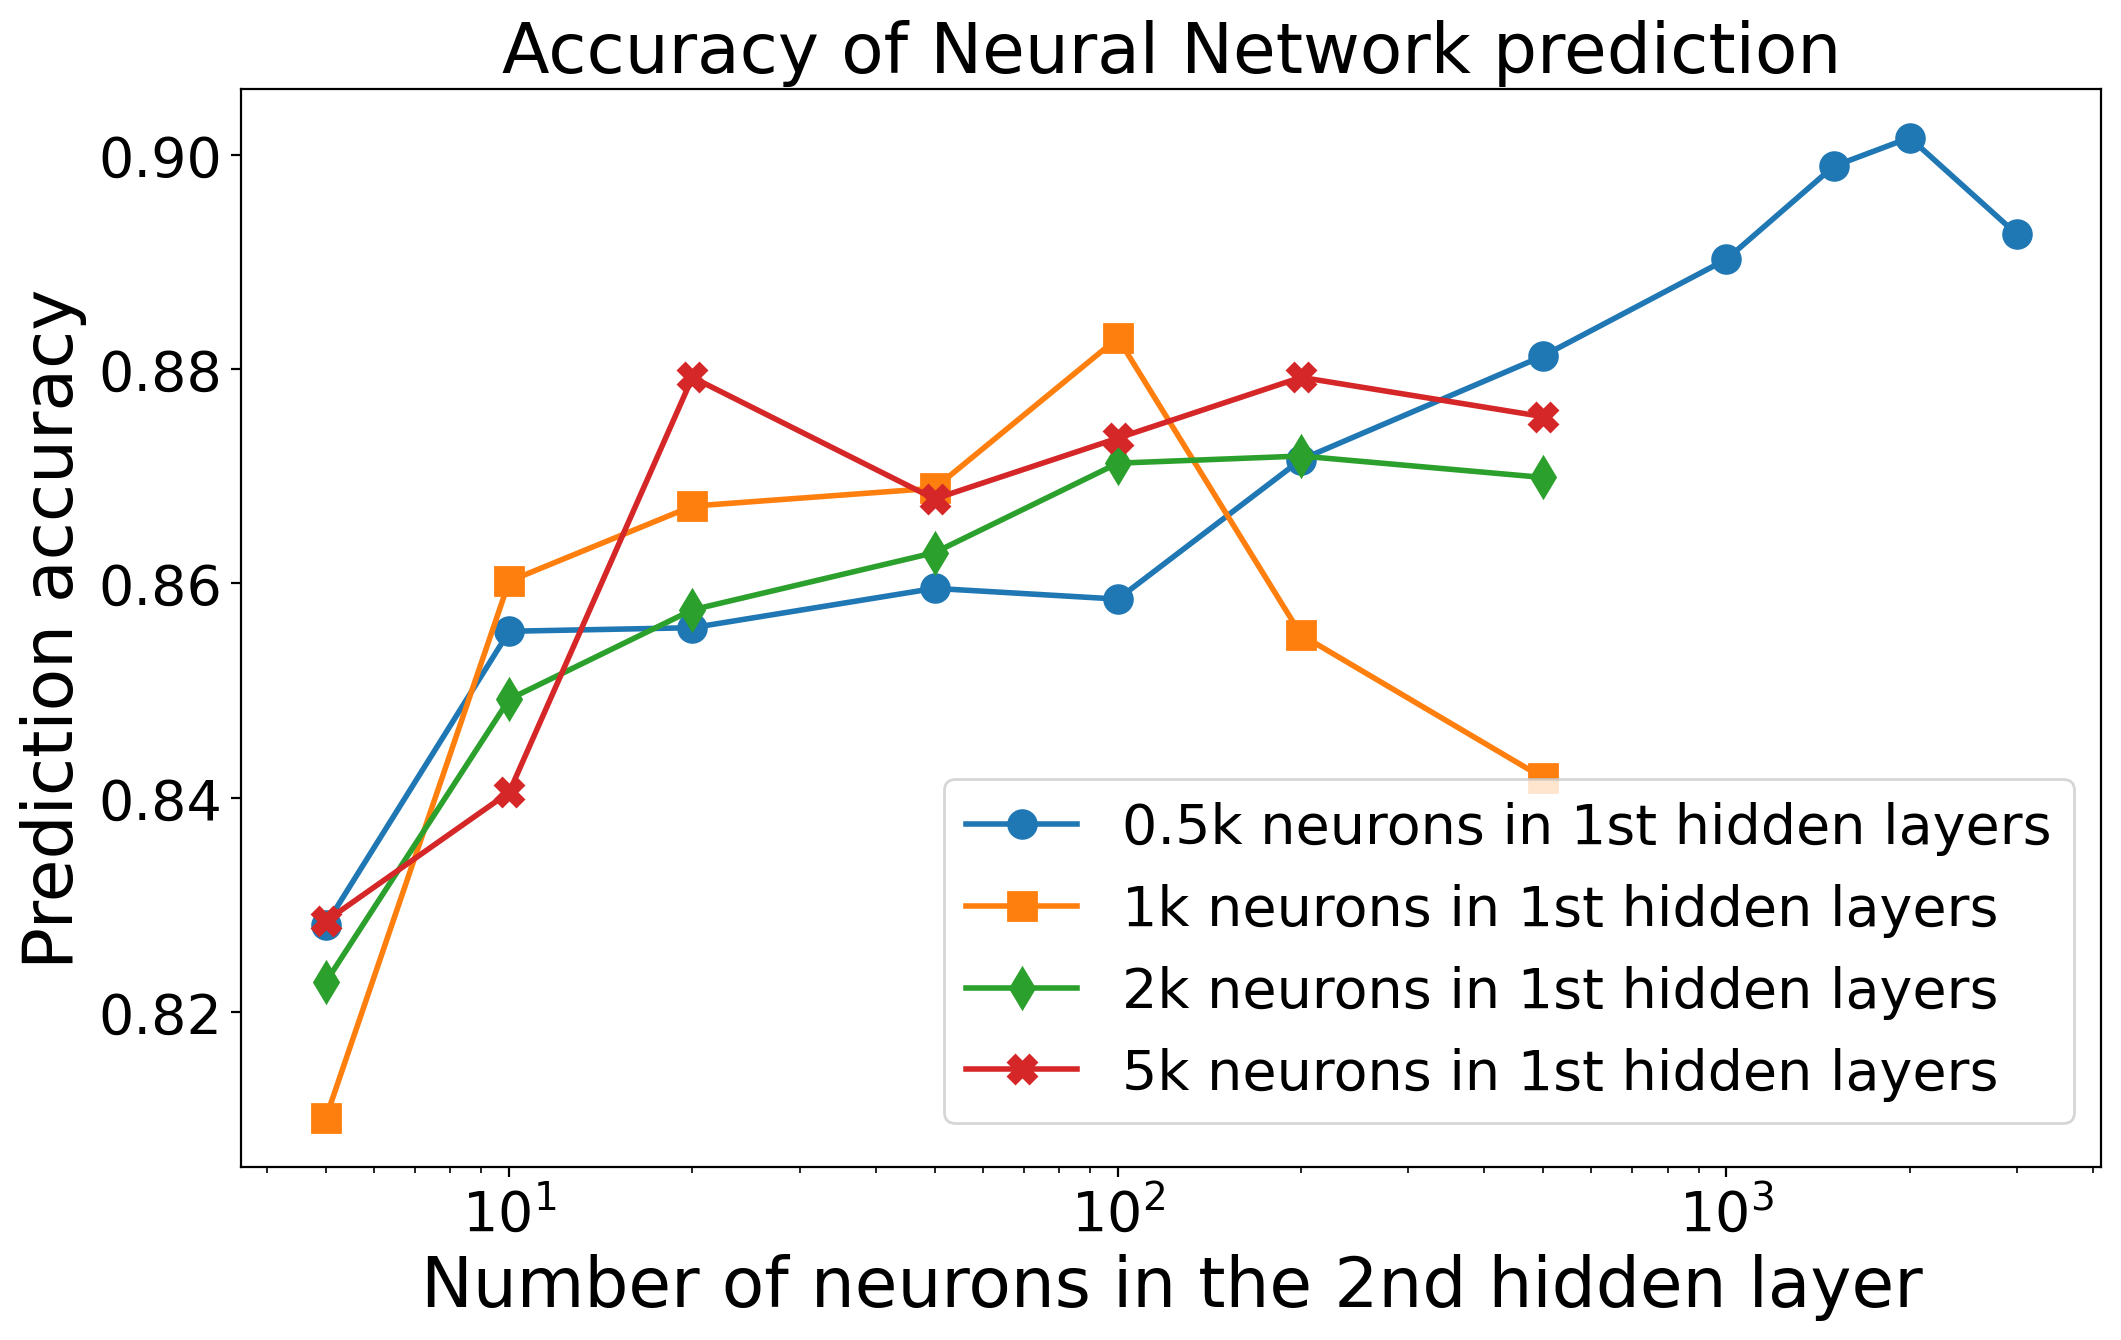

In [182]:
a_lay4_500 = [0.8281614948281615, 0.8555221888555222, 0.8558558558558559, 0.8595261928595261, 0.8585251918585252, 0.8715382048715382, \
              0.8812145478812146, 0.8902235568902236, 0.8988988988988988, 0.9015682349015682, 0.8925592258925592]
ne_lay4_500 = [5, 10, 20, 50, 100, 200, 500, 1000, 1500, 2000, 3000]

a_lay4_2k = [0.8228228228228228,
 0.8491825158491825,
 0.8575241908575242,
 0.8628628628628628,
 0.8712045378712046,
 0.8718718718718719,
 0.8698698698698699]
ne_lay4_2k = [5,10,20,50,100,200,500]

a_lay4_1k = [0.8101434768101434,
 0.8601935268601936,
 0.8672005338672005,
 0.8688688688688688,
 0.8828828828828829,
 0.8551885218551886,
 0.8418418418418419]

ne_lay4_1k = [5,10,20,50,100,200,500]

a_lay4_5k = [0.8284951618284951,
 0.8405071738405072,
 0.8792125458792125,
 0.8678678678678678,
 0.8735402068735402,
 0.8792125458792125,
 0.8755422088755422]

ne_lay4_5k = [5,10,20,50,100,200,500]

plt.figure(figsize = (12, 7))
plt.semilogx(ne_lay4_500,a_lay4_500,'o-',markersize=10,linewidth=2,label='0.5k neurons in 1st hidden layers')
plt.semilogx(ne_lay4_1k,a_lay4_1k,'s-',markersize=10,linewidth=2,label='1k neurons in 1st hidden layers')
plt.semilogx(ne_lay4_2k,a_lay4_2k,'d-',markersize=10,linewidth=2,label='2k neurons in 1st hidden layers')
plt.semilogx(ne_lay4_5k,a_lay4_5k,'X-',markersize=10,linewidth=2,label='5k neurons in 1st hidden layers')
plt.title('Accuracy of Neural Network prediction', fontsize = 25)
#plt.xticks(ks)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);
plt.xlabel("Number of neurons in the 2nd hidden layer", fontsize = 25)
plt.ylabel("Prediction accuracy", fontsize = 25)
plt.legend(bbox_to_anchor=(1, 0.2),loc='center right',fontsize = 20)
#plt.savefig("Accuracy_NN_lay4.png")


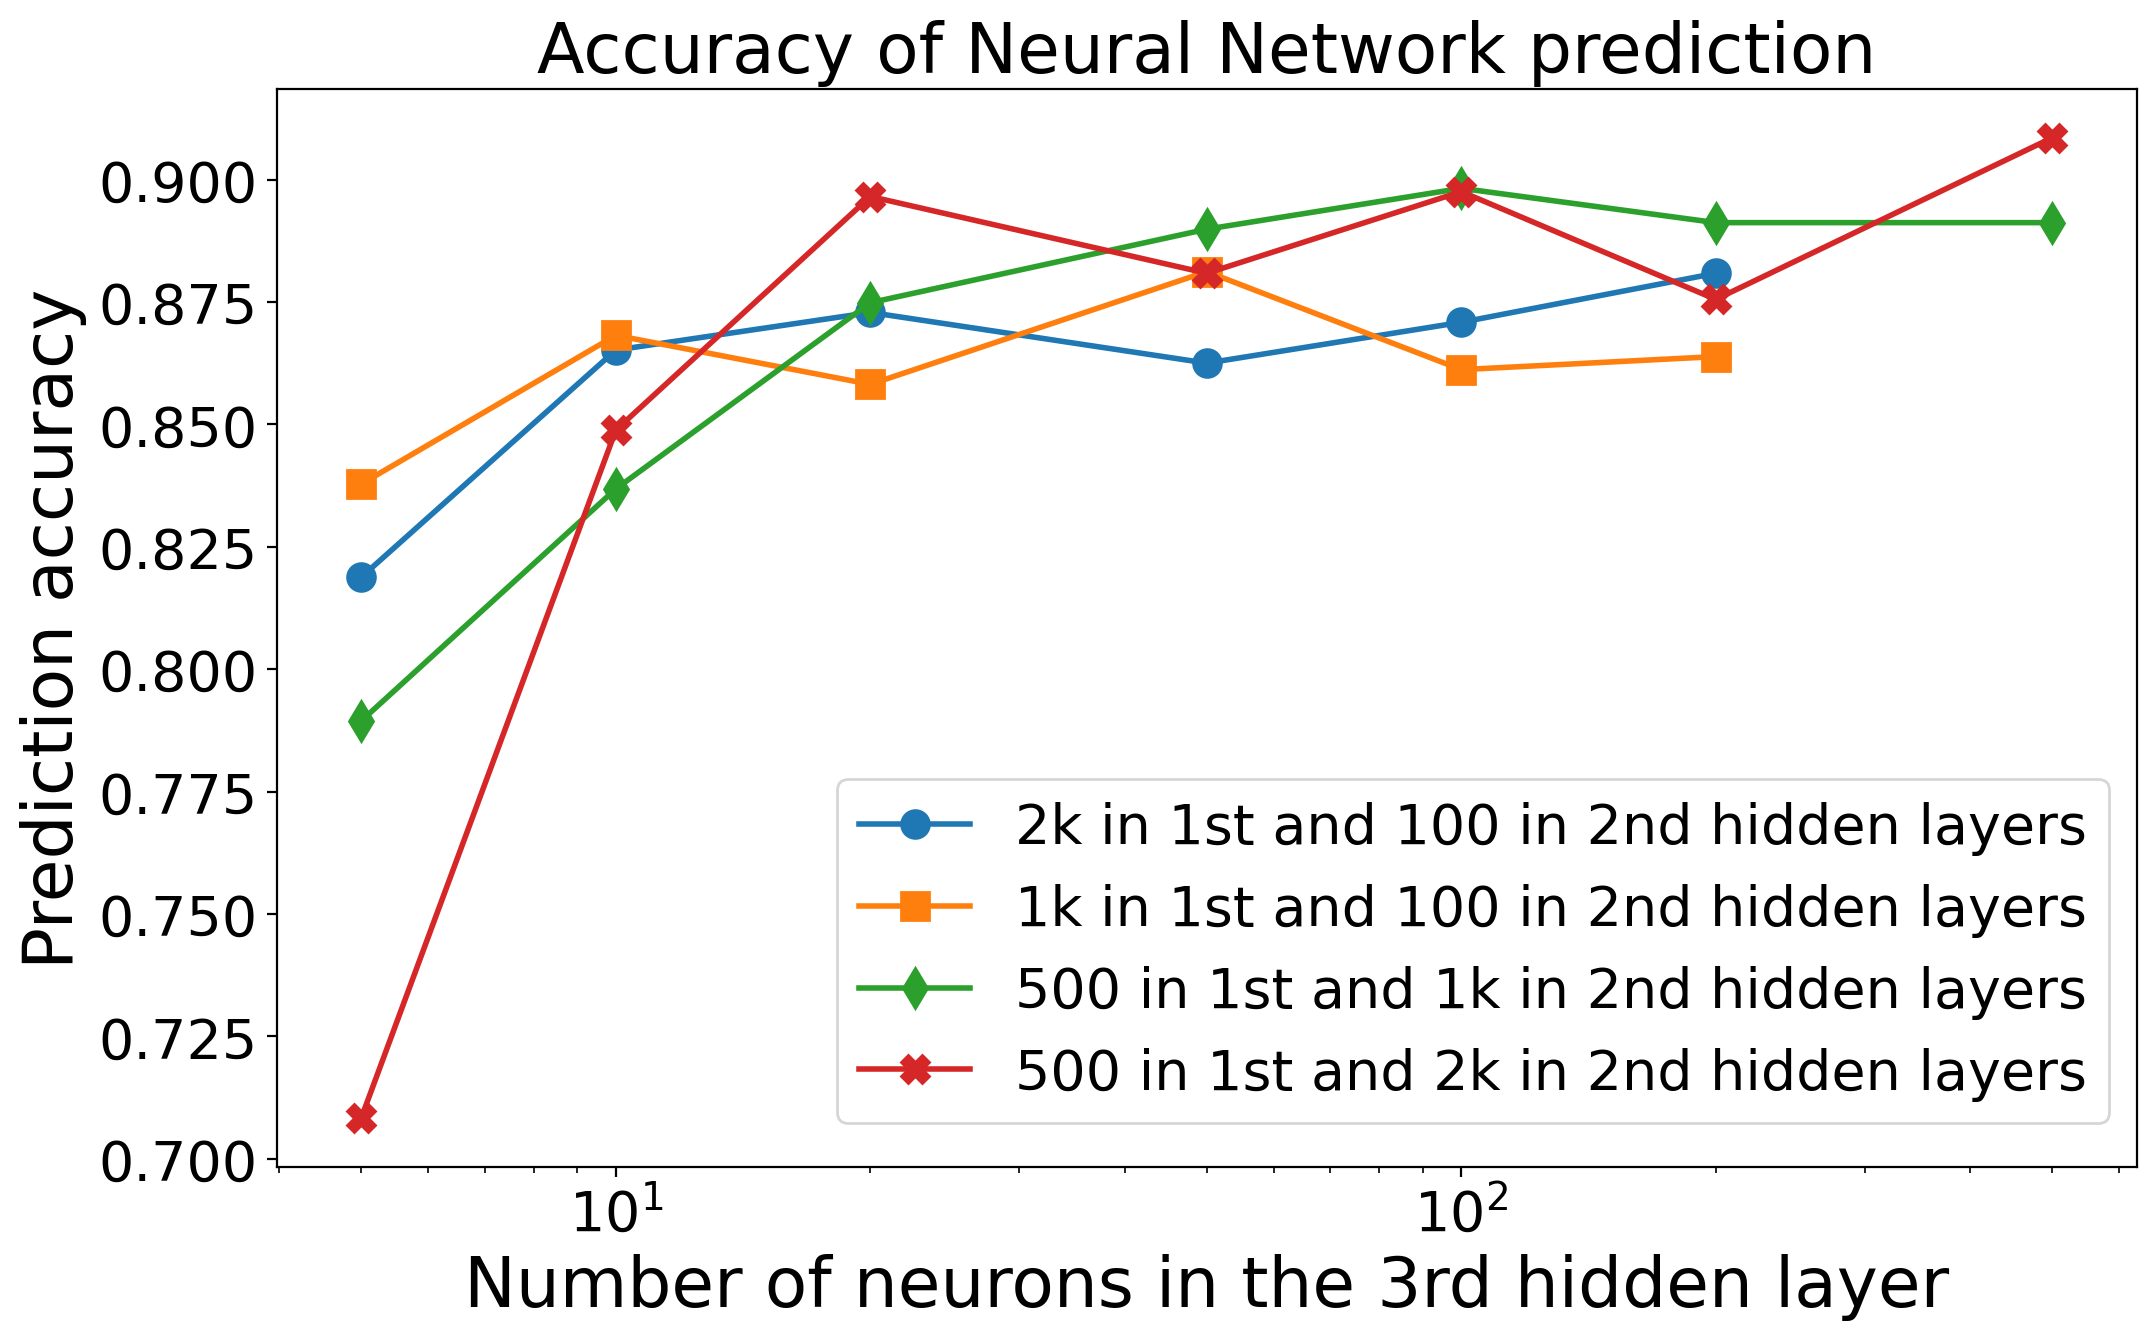

In [318]:
ne_lay5_2k_100 = [5,10,20,50,100,200]
a_lay5_2k_100 = [0.8188188188188188,
 0.8651985318651986,
 0.8728728728728729,
 0.8625291958625292,
 0.8708708708708709,
 0.8808808808808809]

ne_lay5_1k_100 = [5,10,20,50,100,200]
a_lay5_1k_100 = [0.8378378378378378,
 0.8682015348682015,
 0.8581915248581915,
 0.8812145478812146,
 0.8611945278611945,
 0.8638638638638638]

a_lay5_500_1k = [0.7894561227894561,
 0.8368368368368369,
 0.8748748748748749,
 0.8898898898898899,
 0.8982315648982315,
 0.8912245578912246,
 0.8912245578912246]
ne_lay5_500_1k = [5,10,20,50,100,200,500]

a_lay5_500_2k = [0.7083750417083751,
 0.8488488488488488,
 0.8965632298965632,
 0.8808808808808809,
 0.8975642308975642,
 0.8755422088755422,
 0.9085752419085752]

ne_lay5_500_2k = [5,10,20,50,100,200,500]

plt.figure(figsize = (12, 7))
plt.semilogx(ne_lay5_2k_100,a_lay5_2k_100,'o-',markersize=10,linewidth=2,label='2k in 1st and 100 in 2nd hidden layers')
plt.semilogx(ne_lay5_1k_100,a_lay5_1k_100,'s-',markersize=10,linewidth=2,label='1k in 1st and 100 in 2nd hidden layers')
plt.semilogx(ne_lay5_500_1k,a_lay5_500_1k,'d-',markersize=10,linewidth=2,label='500 in 1st and 1k in 2nd hidden layers')
plt.semilogx(ne_lay5_500_2k,a_lay5_500_2k,'X-',markersize=10,linewidth=2,label='500 in 1st and 2k in 2nd hidden layers')
plt.title('Accuracy of Neural Network prediction', fontsize = 25)
#plt.xticks(ks)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);
plt.xlabel("Number of neurons in the 3rd hidden layer", fontsize = 25)
plt.ylabel("Prediction accuracy", fontsize = 25)
plt.legend(bbox_to_anchor=(1, 0.2),loc='center right',fontsize = 20)
#plt.savefig("Accuracy_NN_lay5.png")

In [196]:
a_lay5_500_2k

[0.7083750417083751,
 0.8488488488488488,
 0.8965632298965632,
 0.8808808808808809,
 0.8975642308975642,
 0.8755422088755422,
 0.9085752419085752]

In [156]:
neurons = [5,10,20,50,100,200,500]
a_lay4_1k_2 = []
for ne in neurons:
    print("number of neurons = "+str(ne))
    nn = MLPClassifier(solver='adam', alpha=1e-5, max_iter=2000, hidden_layer_sizes=(1000,ne), random_state=1)
    a = model_assess(nn, "Neural Network")
    print('Accuracy = '+str(a))
    a_lay4_1k_2.append(a)

number of neurons = 5
Accuracy = 0.8101434768101434
number of neurons = 10
Accuracy = 0.8601935268601936
number of neurons = 20
Accuracy = 0.8672005338672005
number of neurons = 50
Accuracy = 0.8688688688688688
number of neurons = 100
Accuracy = 0.8828828828828829
number of neurons = 200
Accuracy = 0.8551885218551886
number of neurons = 500
Accuracy = 0.8418418418418419


In [193]:
neurons = [5,10,20,50,100,200,500]
a_lay5_500_1k = []
for ne in neurons:
    print("number of neurons = "+str(ne))
    nn = MLPClassifier(solver='adam', alpha=1e-5, max_iter=2000, hidden_layer_sizes=(500,1000,ne), random_state=1)
    a = model_assess(nn, "Neural Network")
    print('Accuracy = '+str(a))
    a_lay5_500_1k.append(a)

number of neurons = 5
Accuracy = 0.7894561227894561
number of neurons = 10
Accuracy = 0.8368368368368369
number of neurons = 20
Accuracy = 0.8748748748748749
number of neurons = 50
Accuracy = 0.8898898898898899
number of neurons = 100
Accuracy = 0.8982315648982315
number of neurons = 200
Accuracy = 0.8912245578912246
number of neurons = 500
Accuracy = 0.8912245578912246


In [194]:
neurons = [5,10,20,50,100,200,500]
a_lay5_500_2k = []
for ne in neurons:
    print("number of neurons = "+str(ne))
    nn = MLPClassifier(solver='adam', alpha=1e-5, max_iter=2000, hidden_layer_sizes=(500,2000,ne), random_state=1)
    a = model_assess(nn, "Neural Network")
    print('Accuracy = '+str(a))
    a_lay5_500_2k.append(a)

number of neurons = 5
Accuracy = 0.7083750417083751
number of neurons = 10
Accuracy = 0.8488488488488488
number of neurons = 20
Accuracy = 0.8965632298965632
number of neurons = 50
Accuracy = 0.8808808808808809
number of neurons = 100
Accuracy = 0.8975642308975642
number of neurons = 200
Accuracy = 0.8755422088755422
number of neurons = 500
Accuracy = 0.9085752419085752


In [202]:
nn = MLPClassifier(solver='adam', alpha=1e-5, max_iter=2000, hidden_layer_sizes=(500,1000), random_state=1)

In [208]:
import eli5
from eli5.sklearn import PermutationImportance
nn.fit(X_train, y_train)
perm = PermutationImportance(estimator=nn, random_state=1)
perm.fit(X_test, y_test)



PermutationImportance(estimator=MLPClassifier(alpha=1e-05,
                                              hidden_layer_sizes=(500, 1000),
                                              max_iter=2000, random_state=1),
                      random_state=1)

In [218]:
a = eli5.show_weights(estimator=perm, feature_names = X_test.columns.tolist())

In [288]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    nn, X_test, y_test, n_repeats=50, random_state=42
)

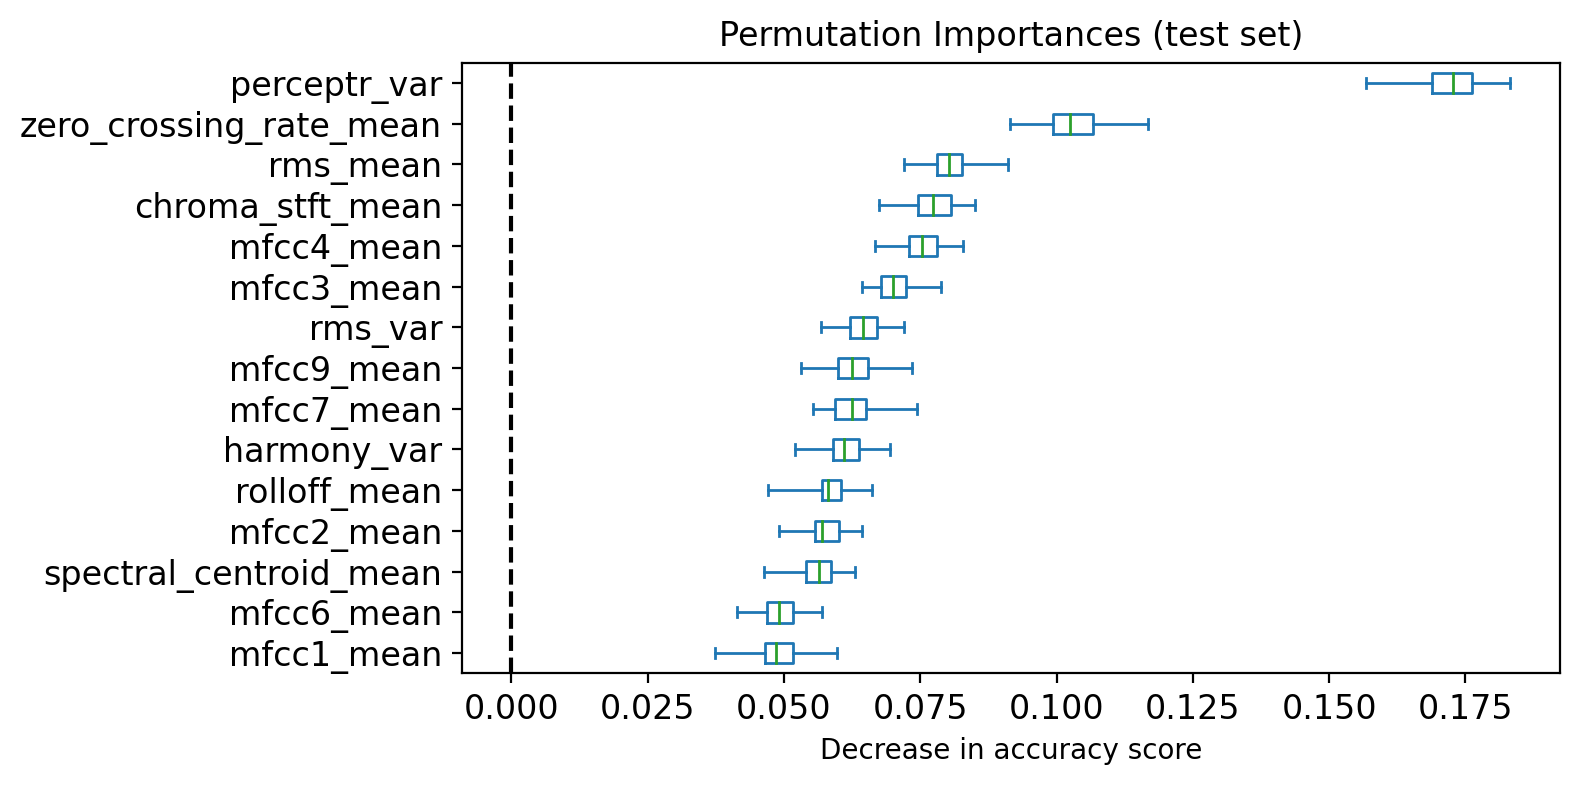

In [289]:
sorted_importances_idx = result.importances_mean.argsort()
sorted_importances_idx = sorted_importances_idx[-15:]
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax= importances.plot.box(vert=False, whis=10,figsize=(8, 4),fontsize=12)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()
plt.savefig("permutation_NN.png")

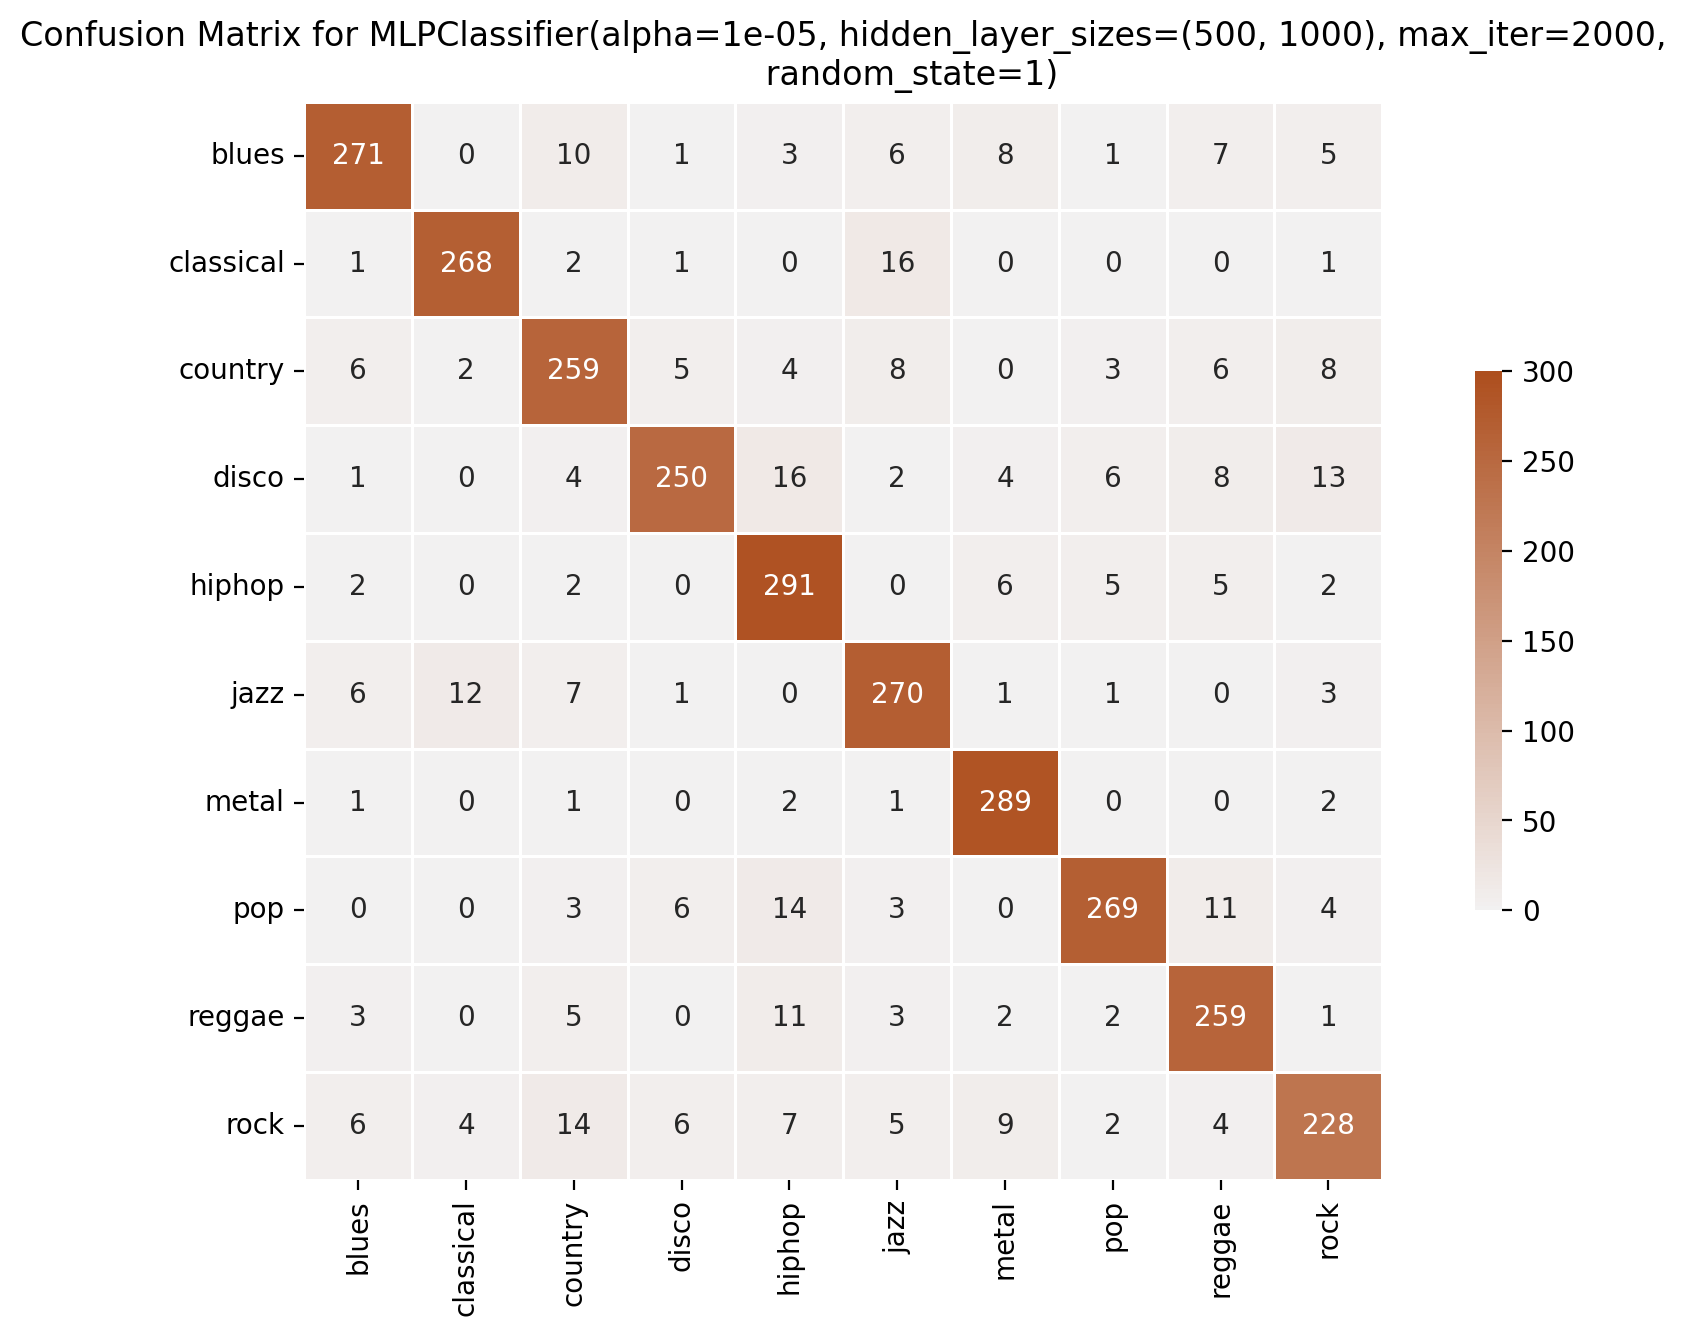

In [206]:
preds = nn.predict(X_test)
#print(confusion_matrix(y_test, preds))
plot_cm(nn,y_test,preds)